In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_curve, roc_auc_score,make_scorer,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('indian_liver_patient.csv')
df.head(18)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0    65  Female              0.7               0.1                   187   
1    62    Male             10.9               5.5                   699   
2    62    Male              7.3               4.1                   490   
3    58    Male              1.0               0.4                   182   
4    72    Male              3.9               2.0                   195   
5    46    Male              1.8               0.7                   208   
6    26  Female              0.9               0.2                   154   
7    29  Female              0.9               0.3                   202   
8    17    Male              0.9               0.3                   202   
9    55    Male              0.7               0.2                   290   
10   57    Male              0.6               0.1                   210   
11   72    Male              2.7               1.3                   260   
12   64    Male              0.9               0.3                   310   
13   74  Female              1.1               0.4                   214   
14   61    Male              0.7               0.2                   145   
15   25    Male              0.6               0.1                   183   
16   38    Male              1.8               0.8                   342   
17   33    Male              1.6               0.5                   165   

    Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                         16                          18             6.8   
1                         64                         100             7.5   
2                         60                          68             7.0   
3                         14                          20             6.8   
4                         27                          59             7.3   
5                         19                          14             7.6   
6                         16                          12             7.0   
7                         14                          11             6.7   
8                         22                          19             7.4   
9                         53                          58             6.8   
10                        51                          59             5.9   
11                        31                          56             7.4   
12                        61                          58             7.0   
13                        22                          30             8.1   
14                        53                          41             5.8   
15                        91                          53             5.5   
16                       168                         441             7.6   
17                        15                          23             7.3   

    Albumin  Albumin_and_Globulin_Ratio  Dataset  
0       3.3                        0.90        1  
1       3.2                        0.74        1  
2       3.3                        0.89        1  
3       3.4                        1.00        1  
4       2.4                        0.40        1  
5       4.4                        1.30        1  
6       3.5                        1.00        1  
7       3.6                        1.10        1  
8       4.1                        1.20        2  
9       3.4                        1.00        1  
10      2.7                        0.80        1  
11      3.0                        0.60        1  
12      3.4                        0.90        2  
13      4.1                        1.00        1  
14      2.7                        0.87        1  
15      2.3                        0.70        2  
16      4.4                        1.30        1  
17      3.5                        0.92        2

In [3]:
df.columns


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [4]:
df.shape

(583, 11)

In [5]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [7]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

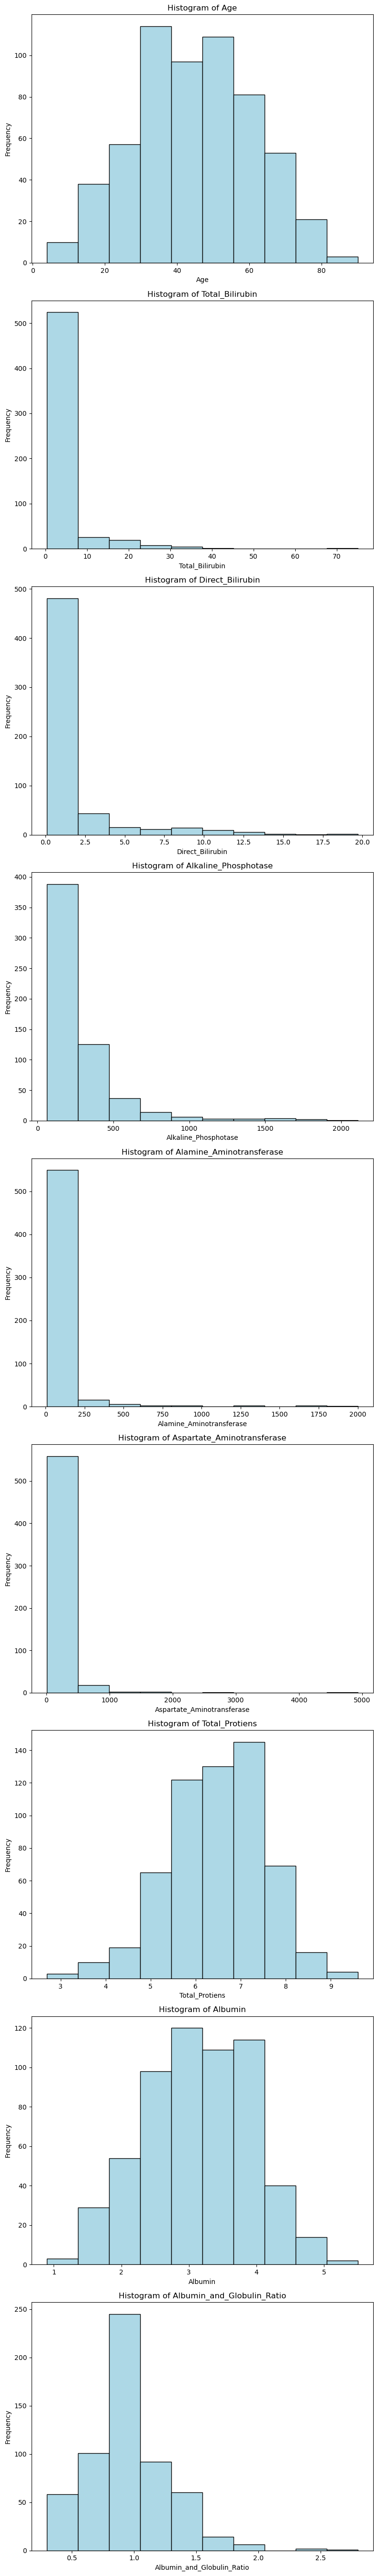

In [8]:
import matplotlib.pyplot as plt
columns_to_plot = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
                   'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                   'Aspartate_Aminotransferase', 'Total_Protiens', 
                   'Albumin', 'Albumin_and_Globulin_Ratio']
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(8, 6 * len(columns_to_plot)))
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column], bins=10, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
578    False
579    False
580    False
581    False
582    False
Length: 583, dtype: bool

In [10]:
df.duplicated().sum()

13

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

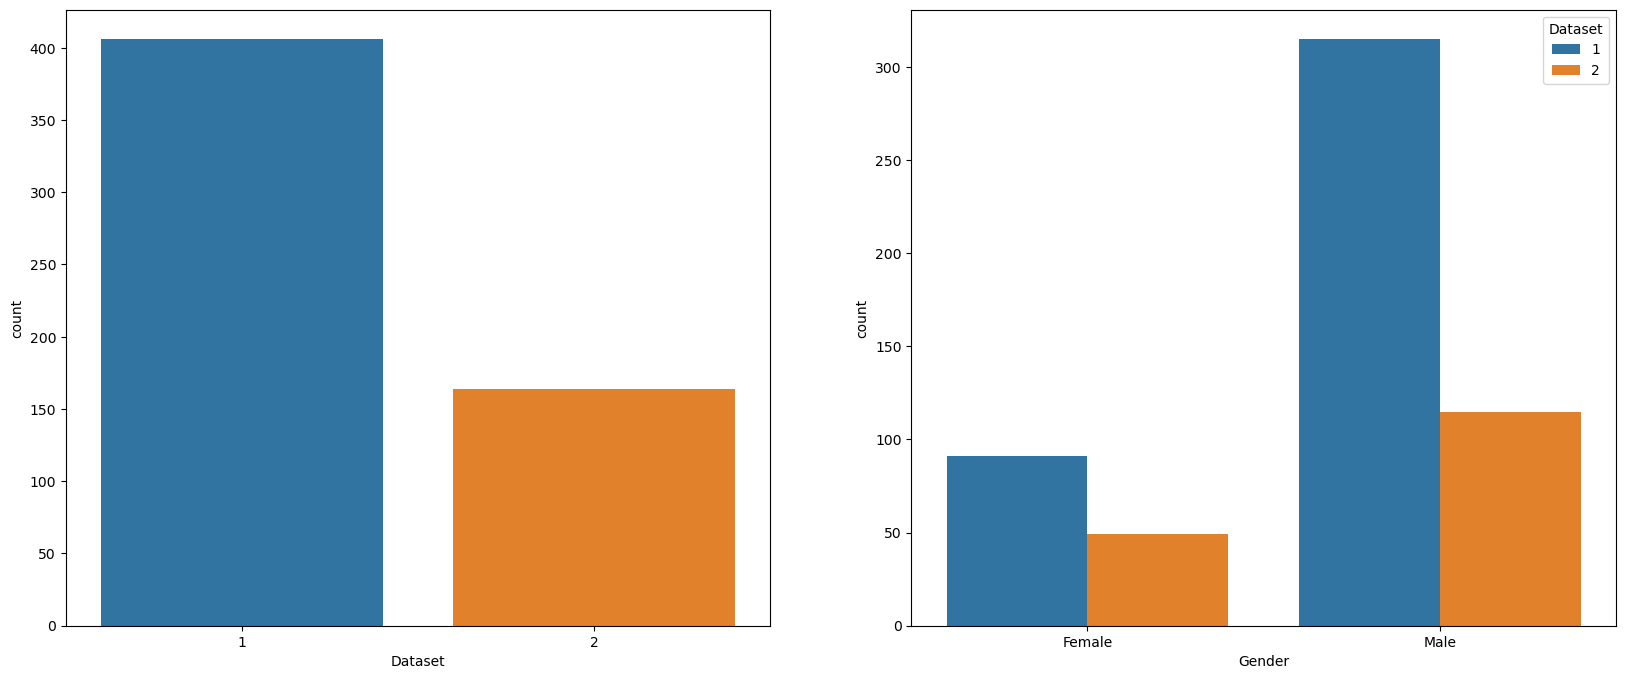

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x='Dataset', data=df, ax=ax1)
sns.countplot(x='Gender', hue='Dataset', data=df, ax=ax2)
plt.show()


In [13]:
df.isnull().sum() 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

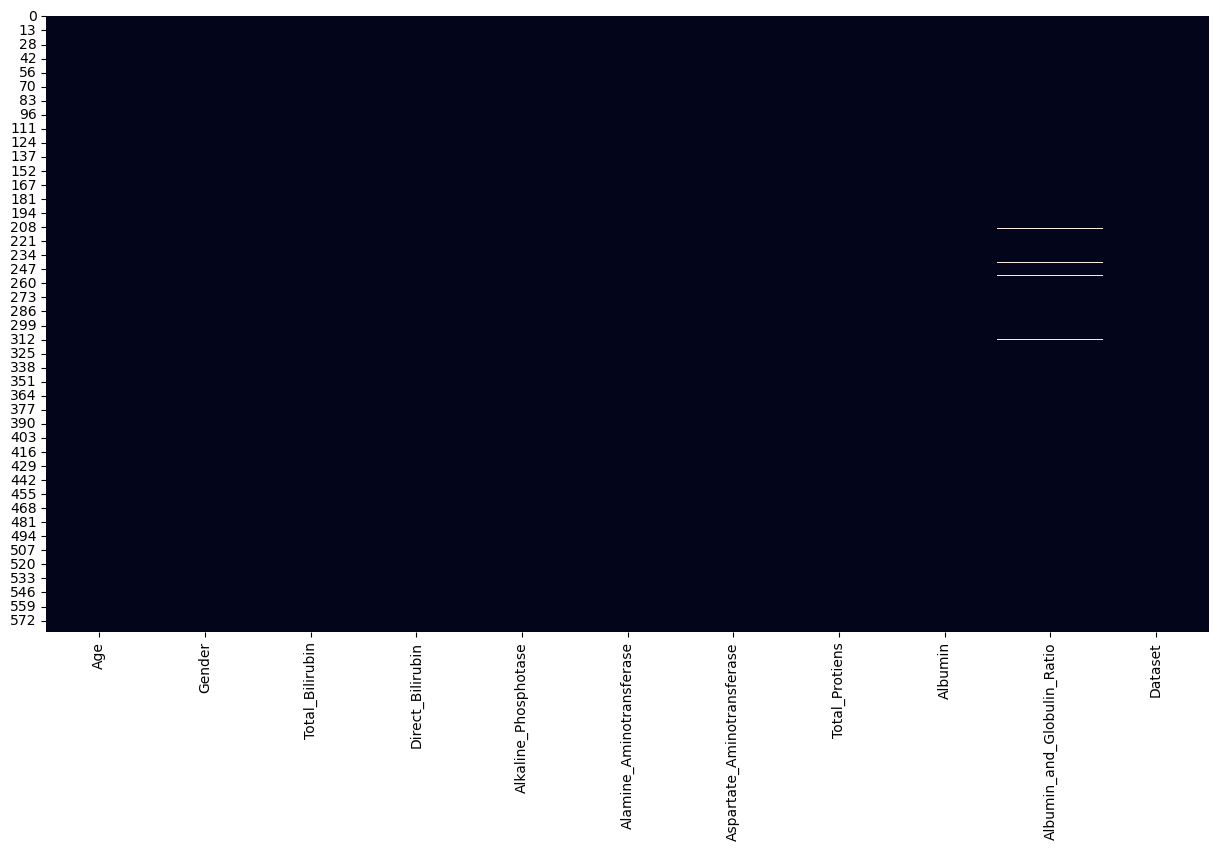

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [15]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].median(),inplace=True)
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

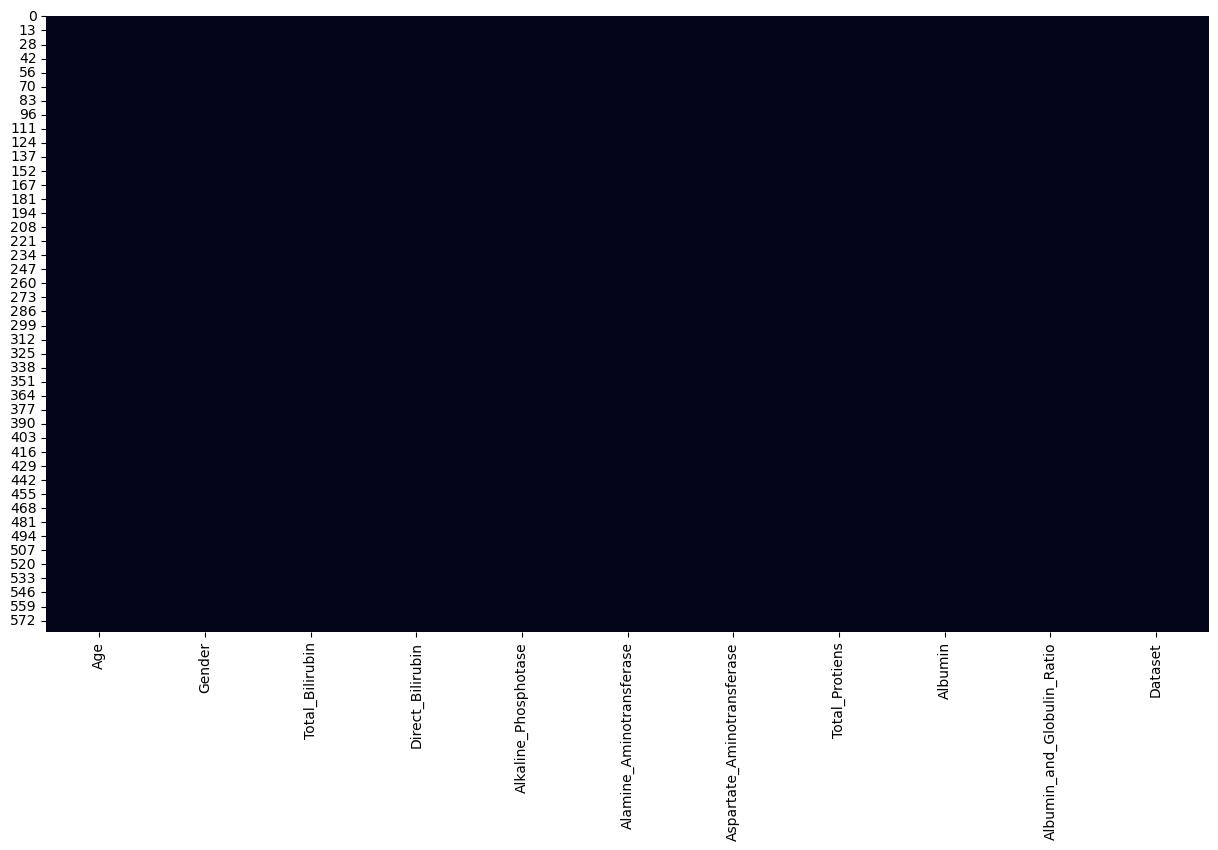

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [17]:
df['Gender']=df['Gender'].apply({'Male':0,'Female':1}.get)

In [18]:
df

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65       1              0.7               0.1                   187   
1     62       0             10.9               5.5                   699   
2     62       0              7.3               4.1                   490   
3     58       0              1.0               0.4                   182   
4     72       0              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60       0              0.5               0.1                   500   
579   40       0              0.6               0.1                    98   
580   52       0              0.8               0.2                   245   
581   31       0              1.3               0.5                   184   
582   38       0              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Dataset  
0        3.3                        0.90        1  
1        3.2                        0.74        1  
2        3.3                        0.89        1  
3        3.4                        1.00        1  
4        2.4                        0.40        1  
..       ...                         ...      ...  
578      1.6                        0.37        2  
579      3.2                        1.10        1  
580      3.2                        1.00        1  
581      3.4                        1.00        1  
582      4.4                        1.50        2  

[570 rows x 11 columns]

                                             |                                             | [  0%]   00:00 ->…


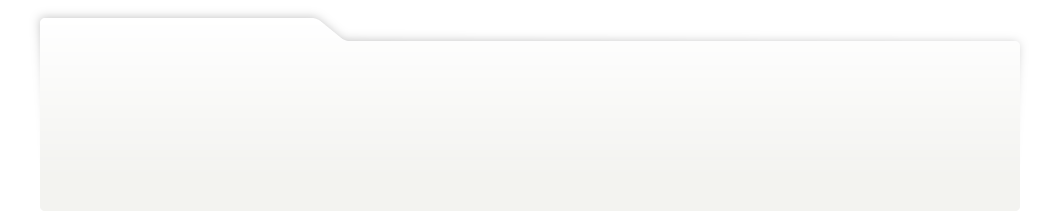
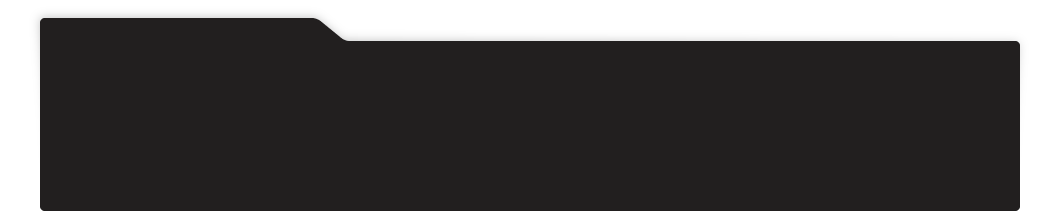
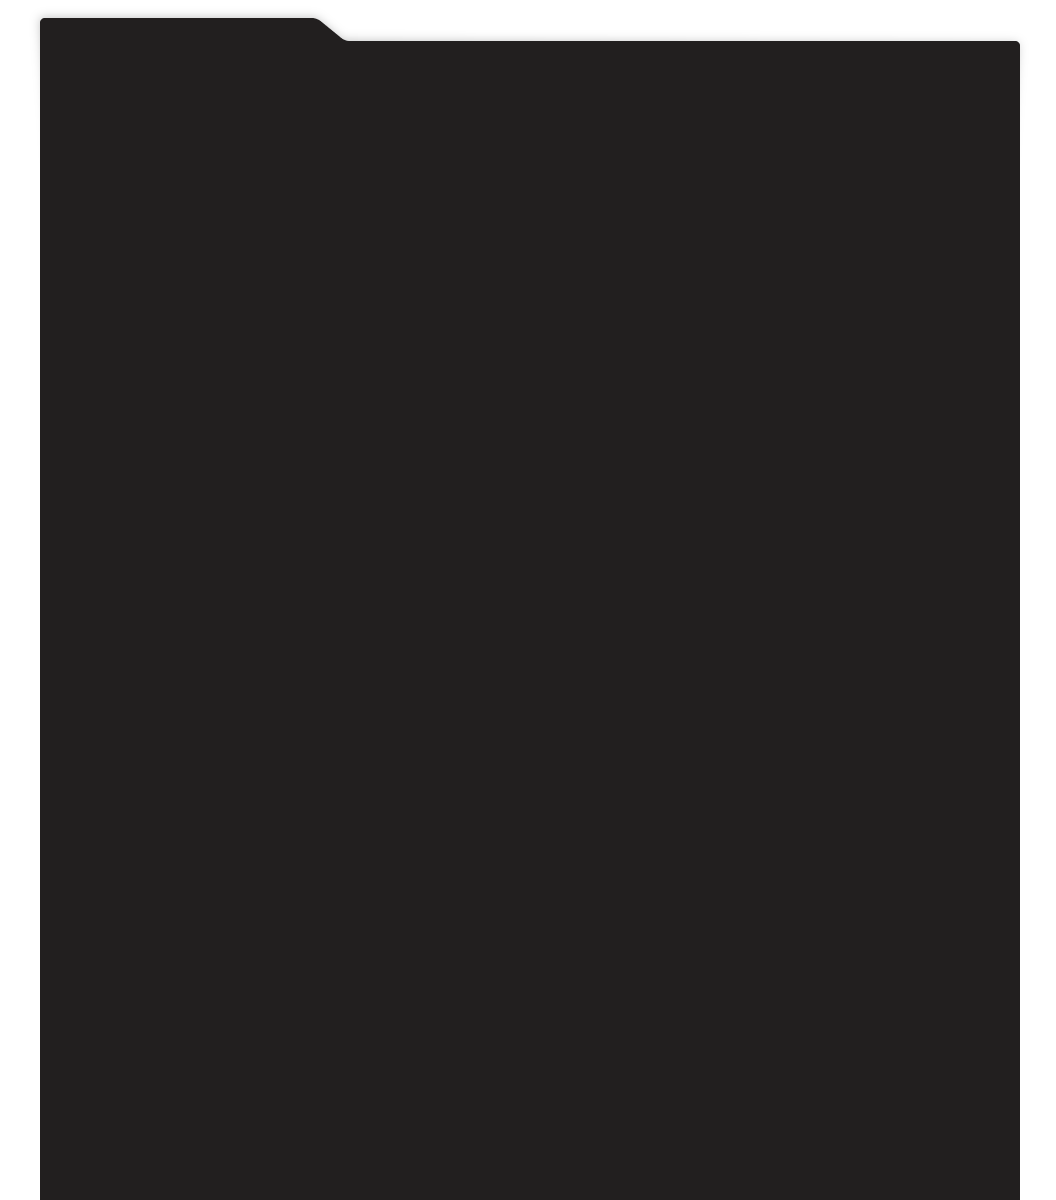
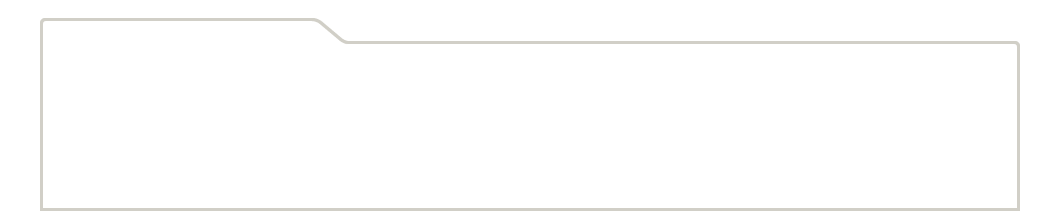
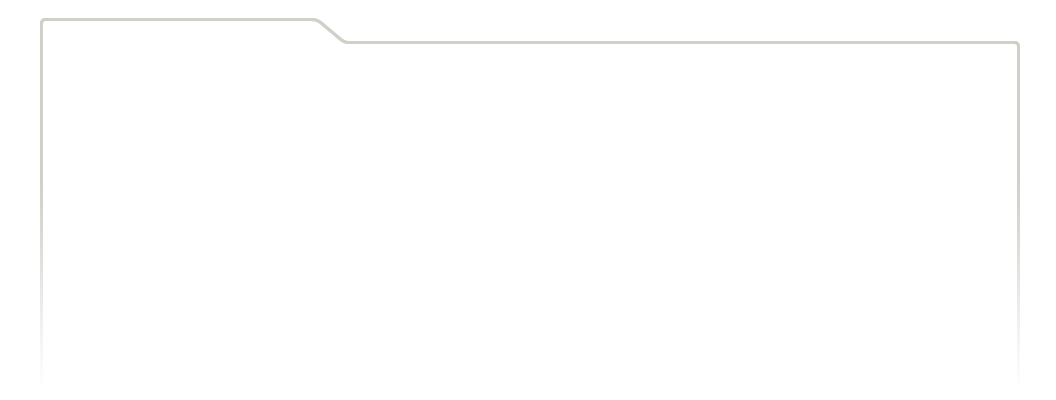
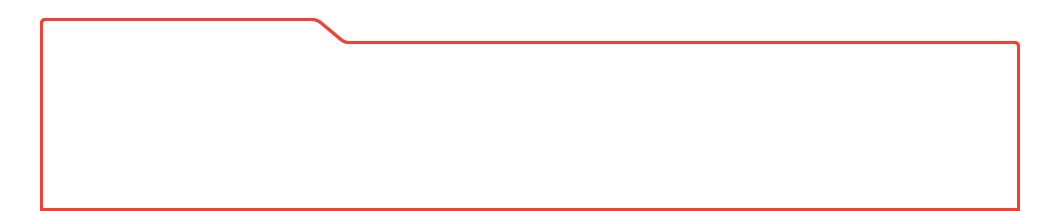
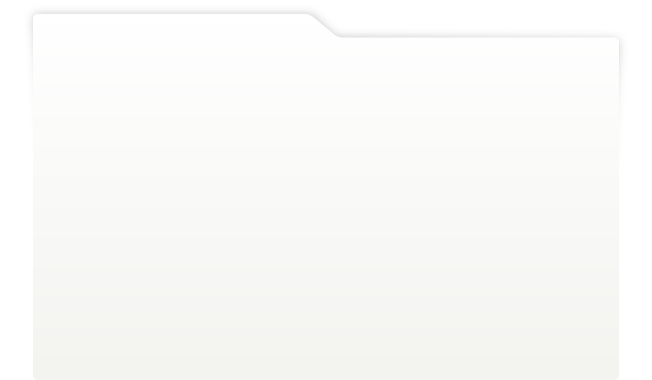
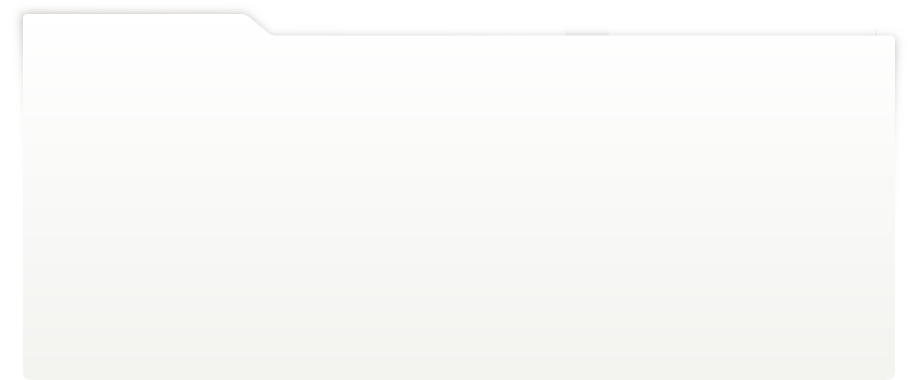
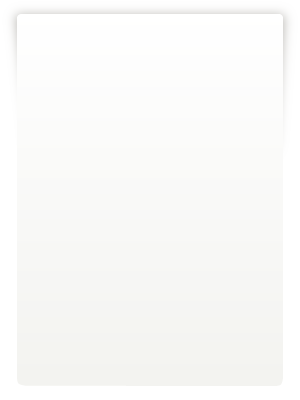
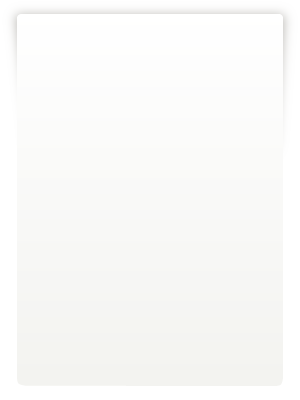
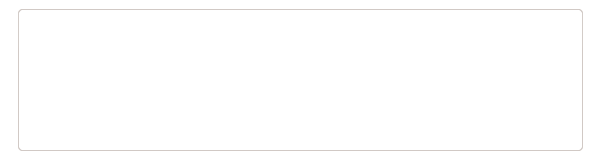
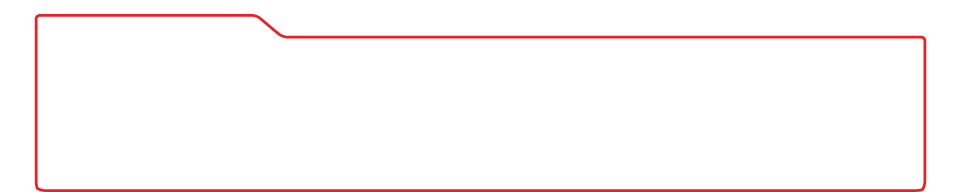
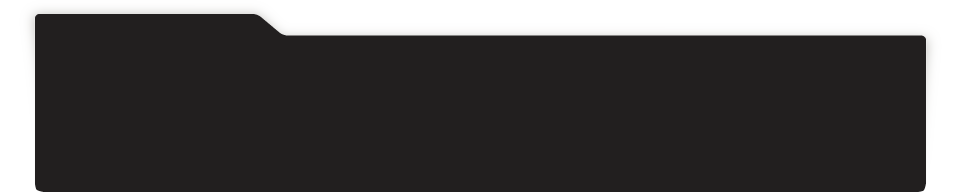
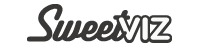
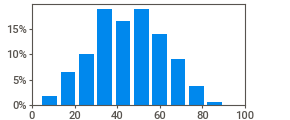
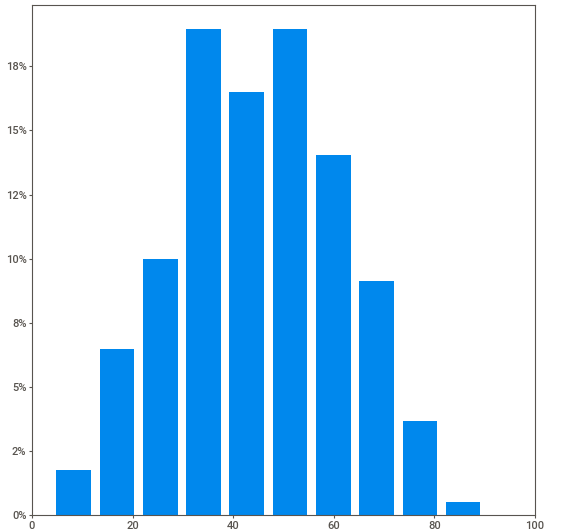
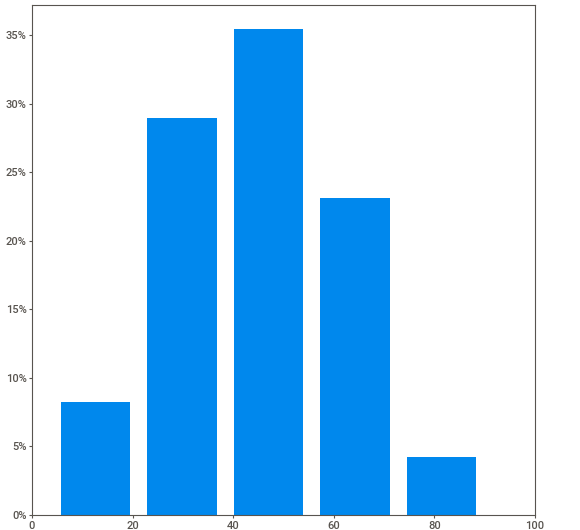
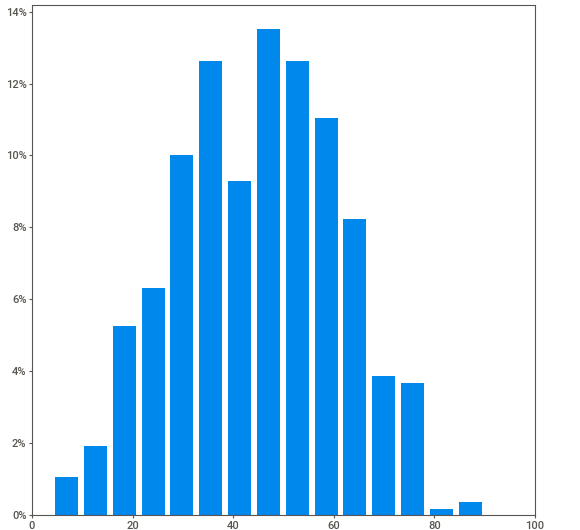
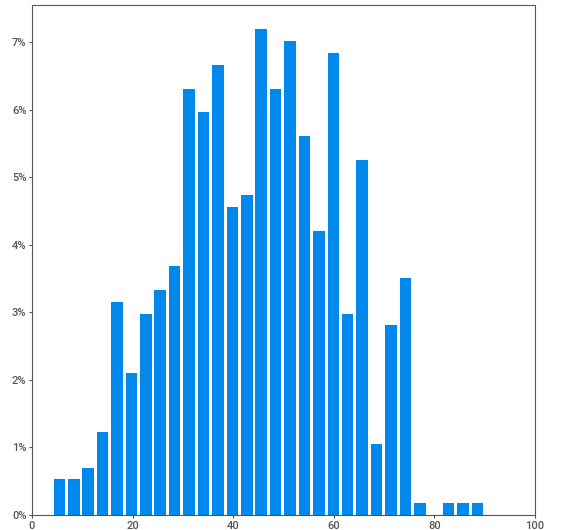
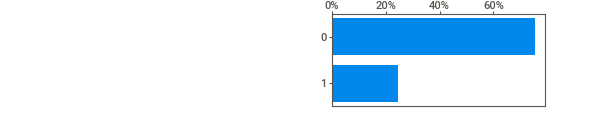
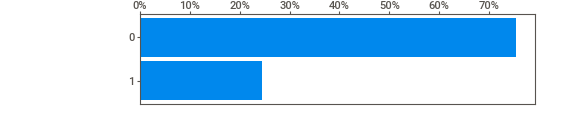
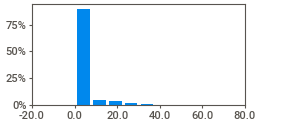
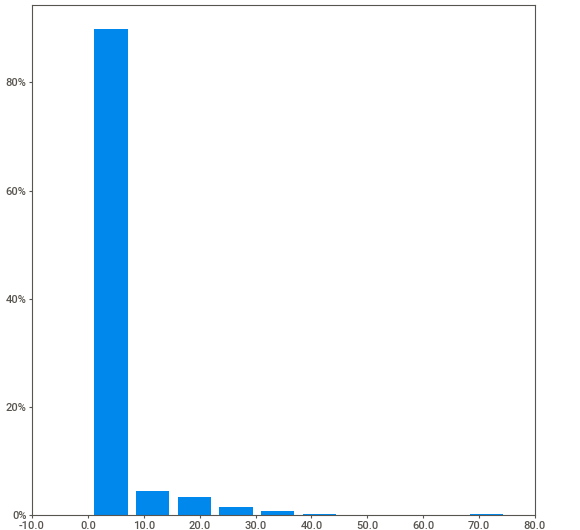
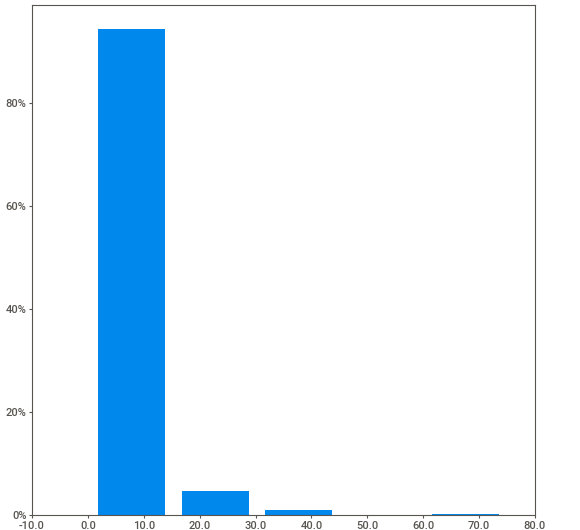
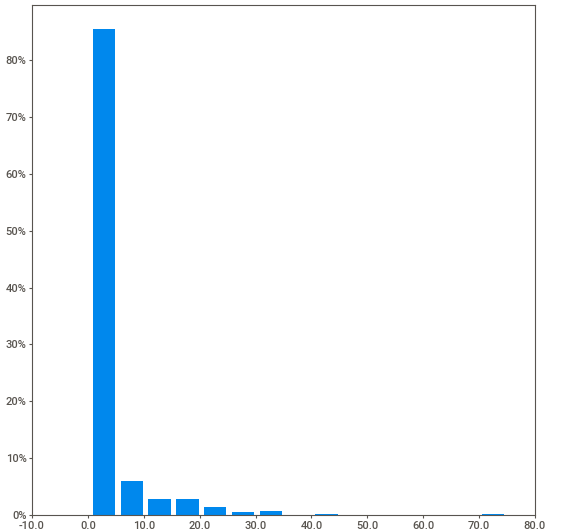
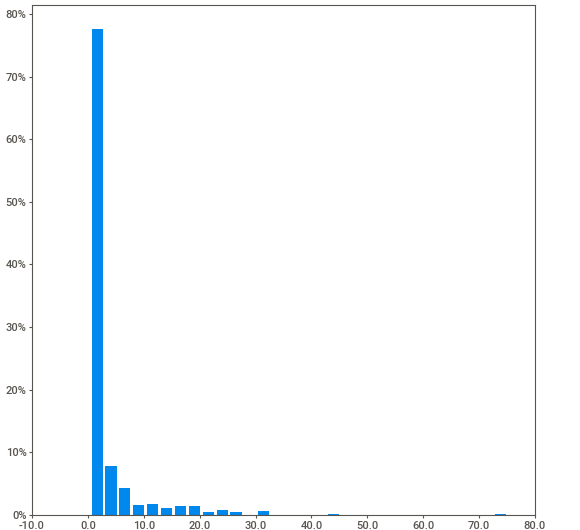
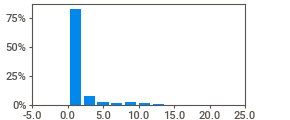
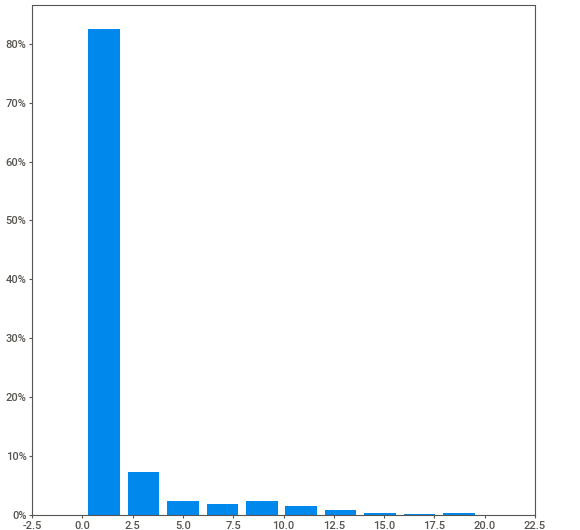
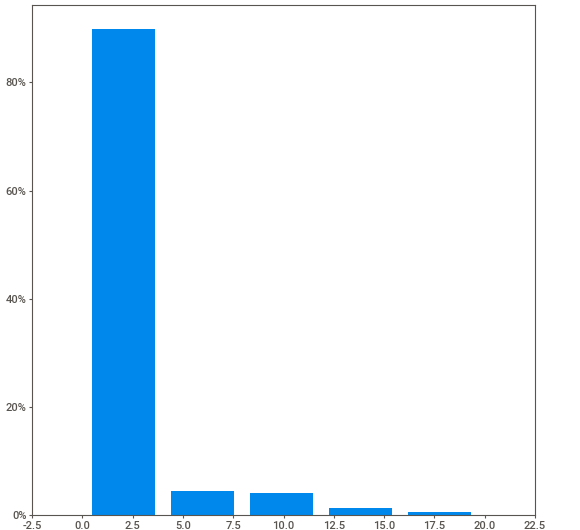
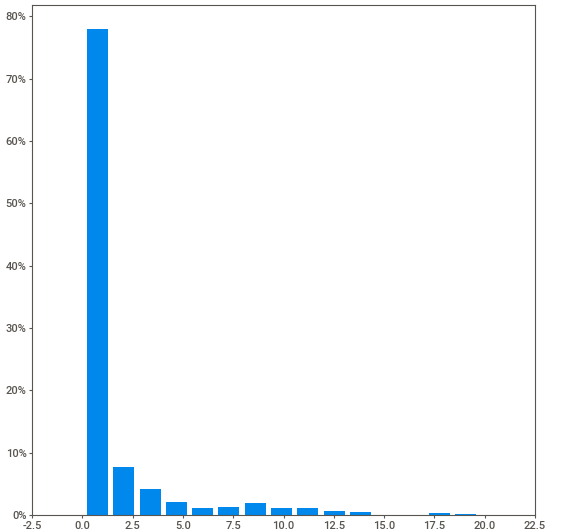
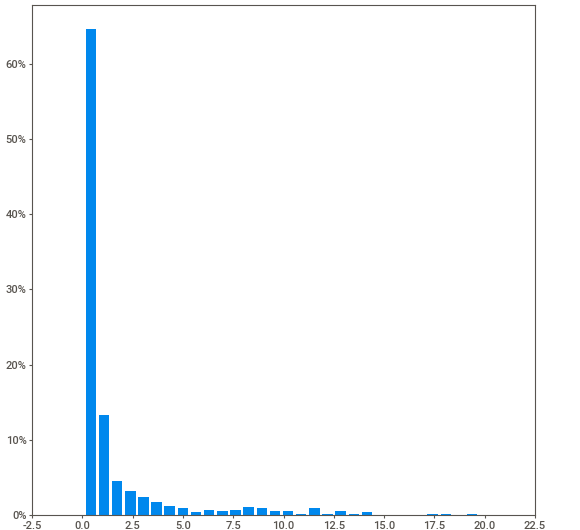
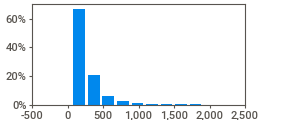
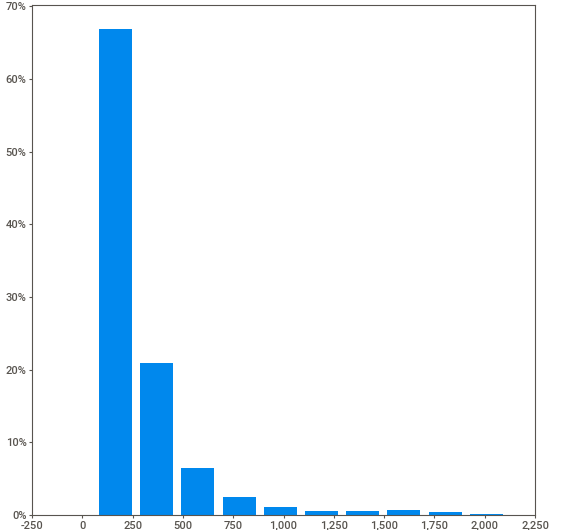
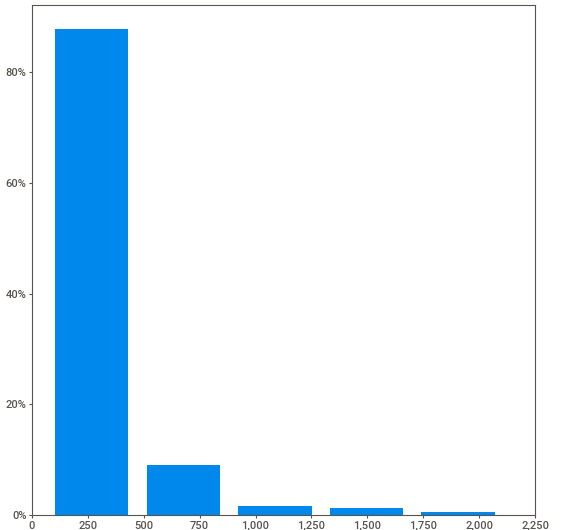
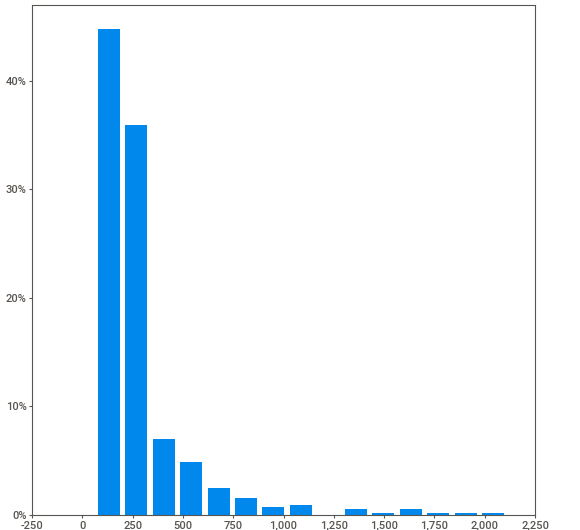
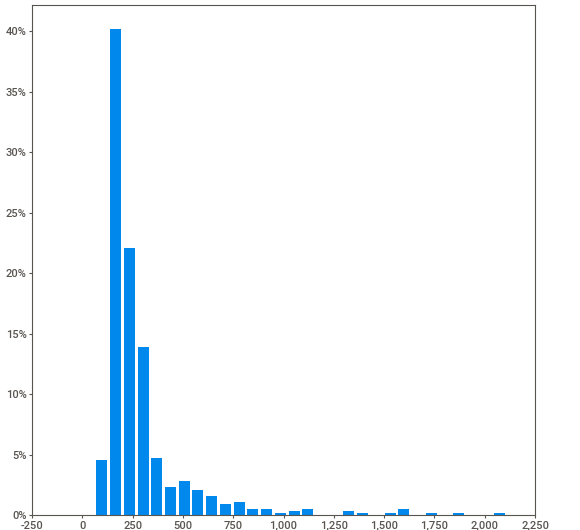
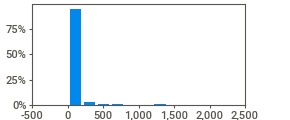
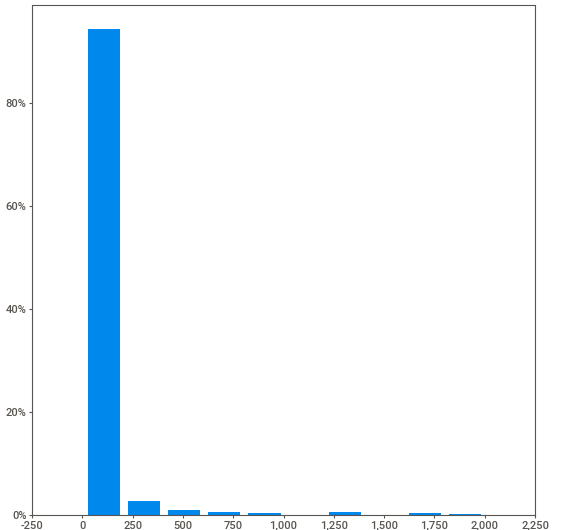
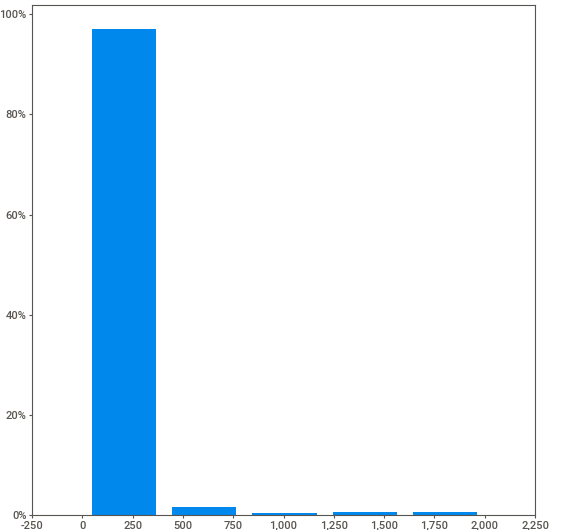
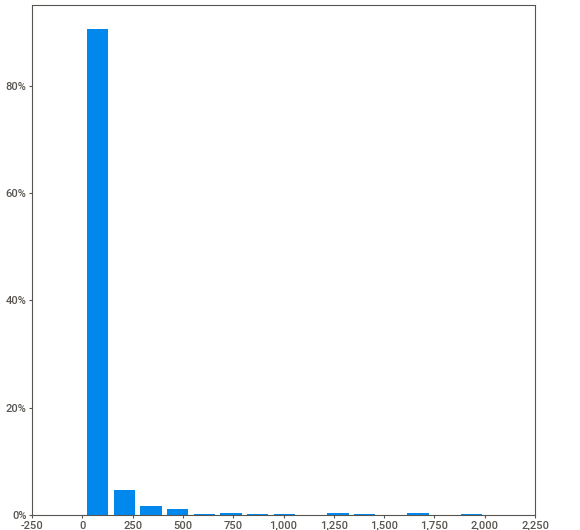
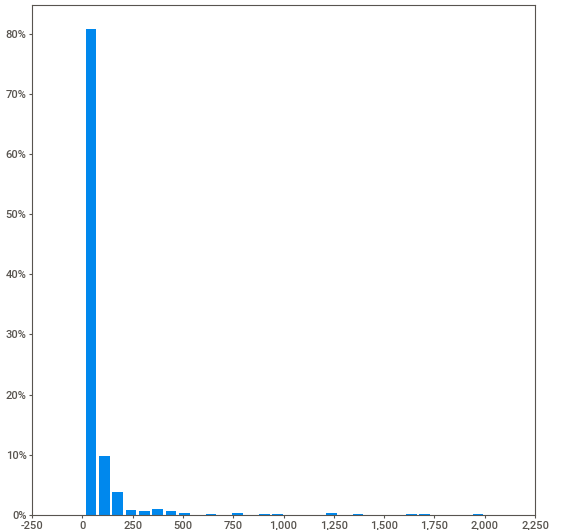
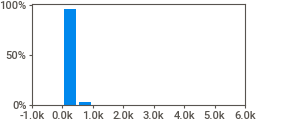
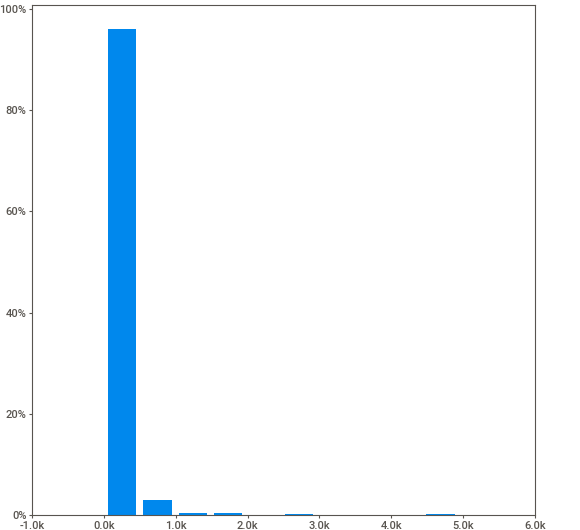
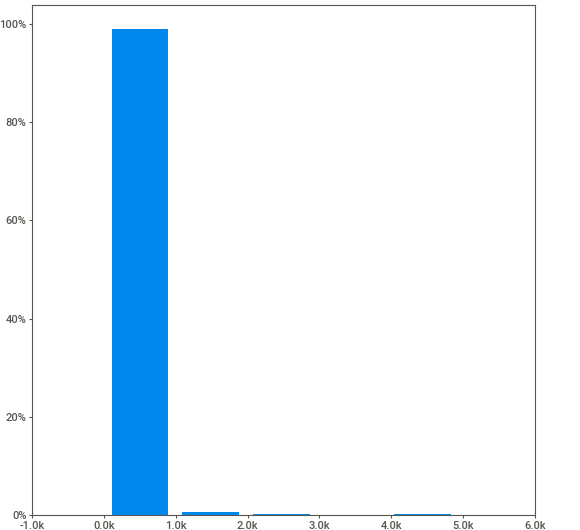
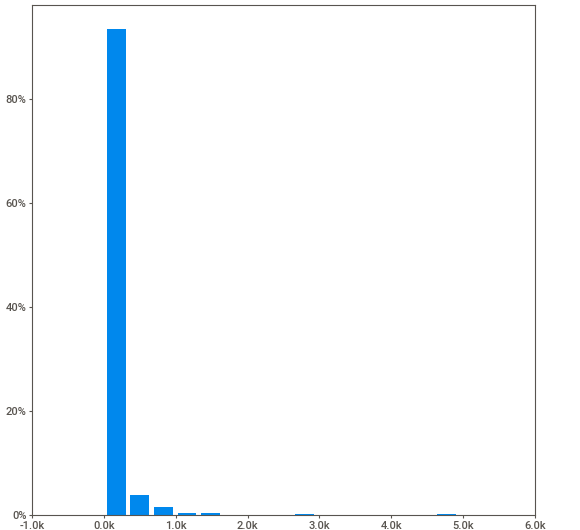
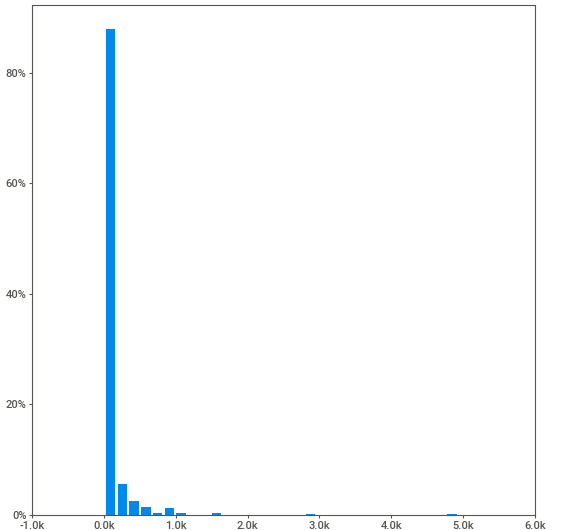
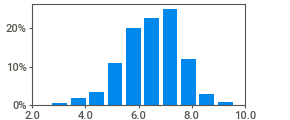
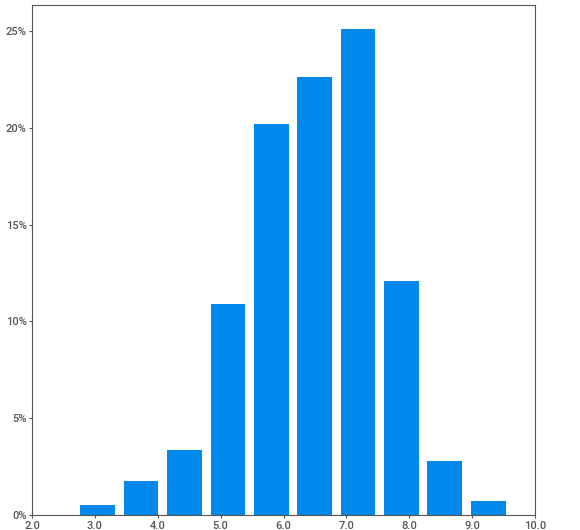
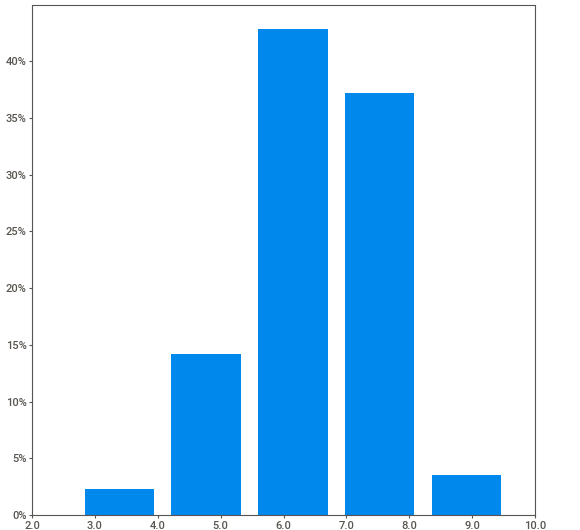
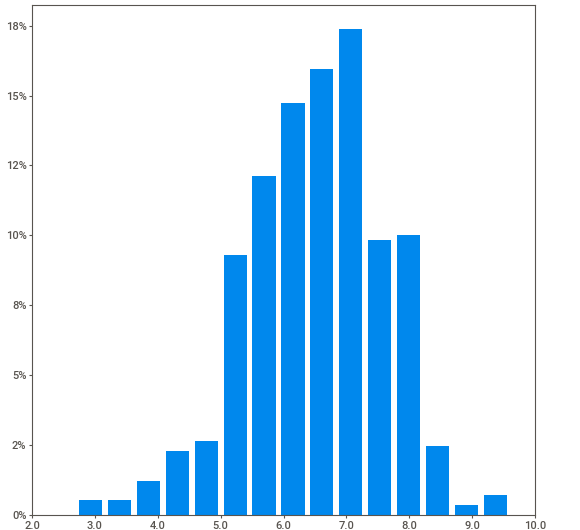
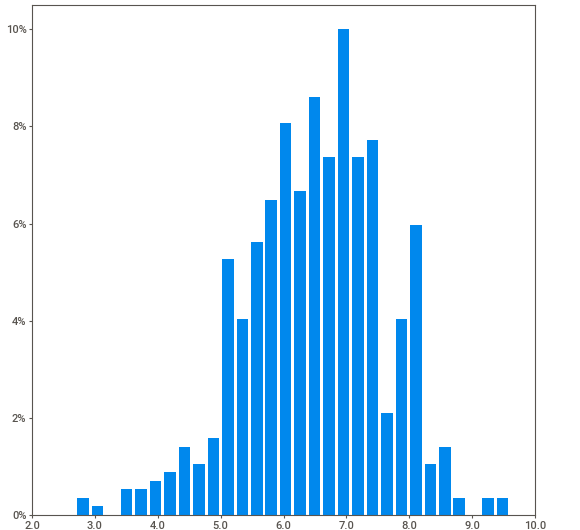
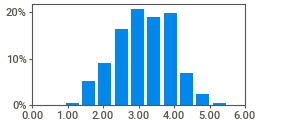
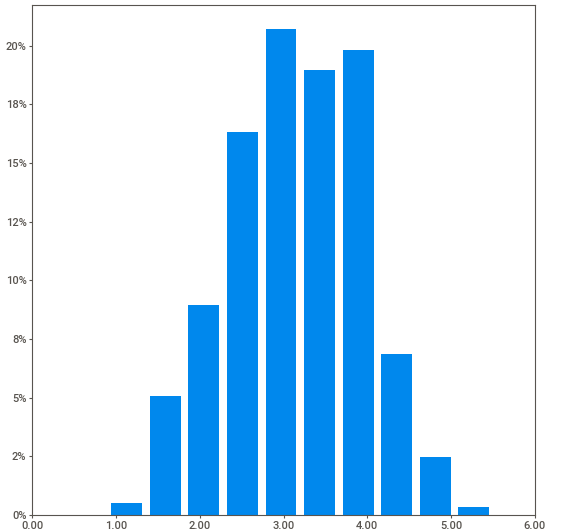
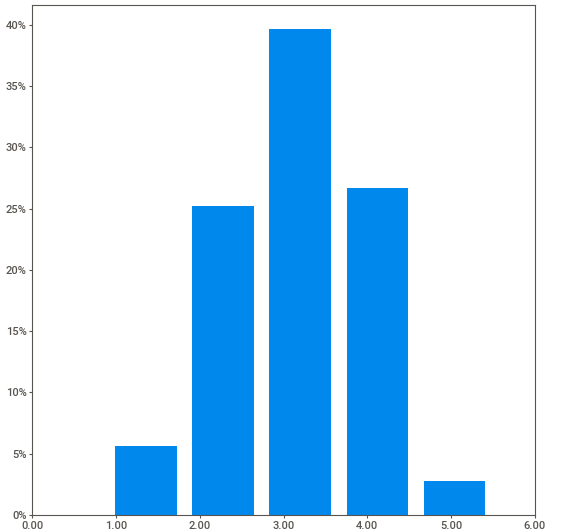
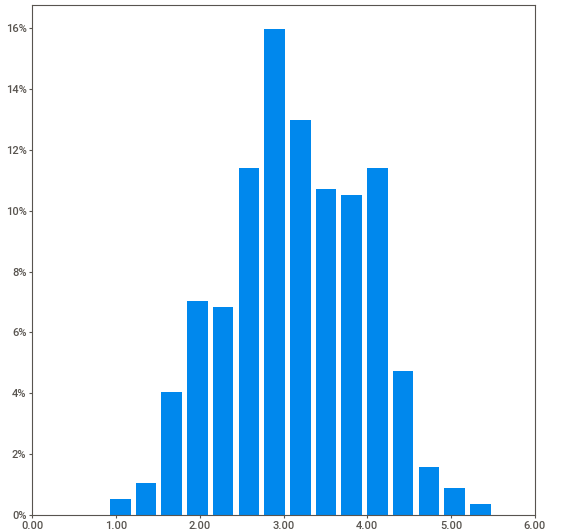
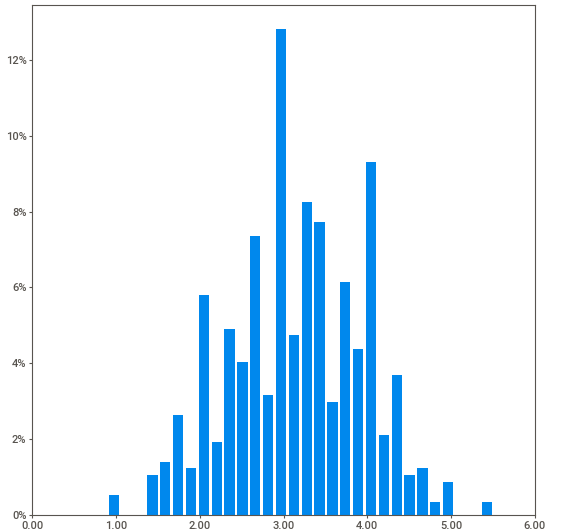
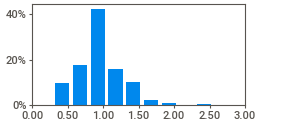
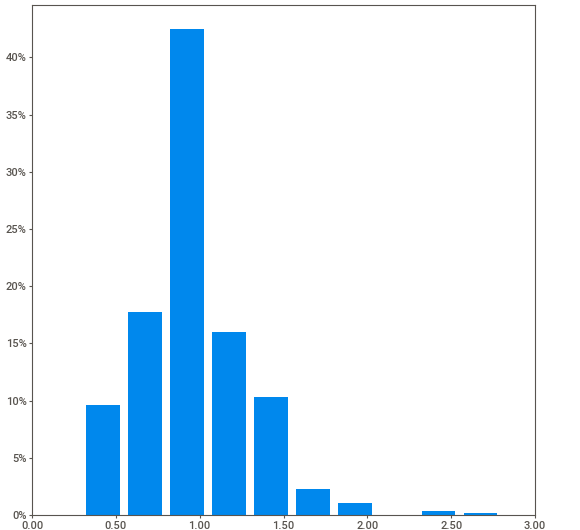
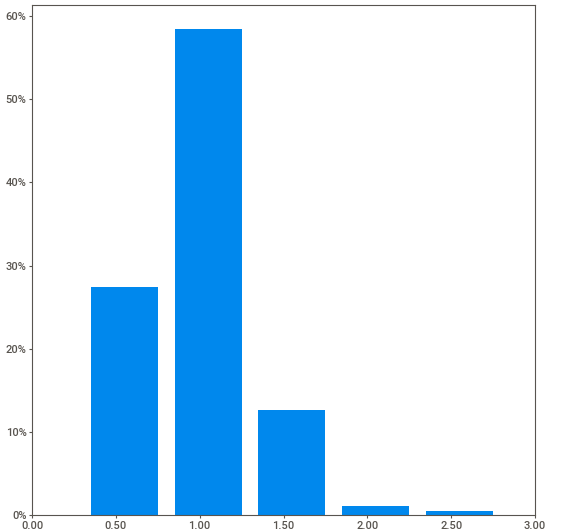
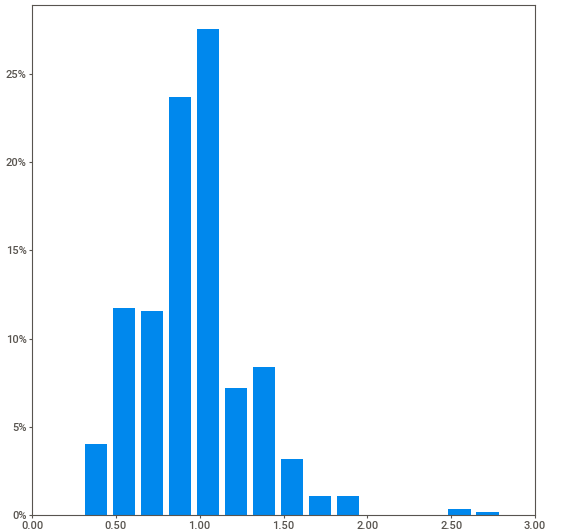
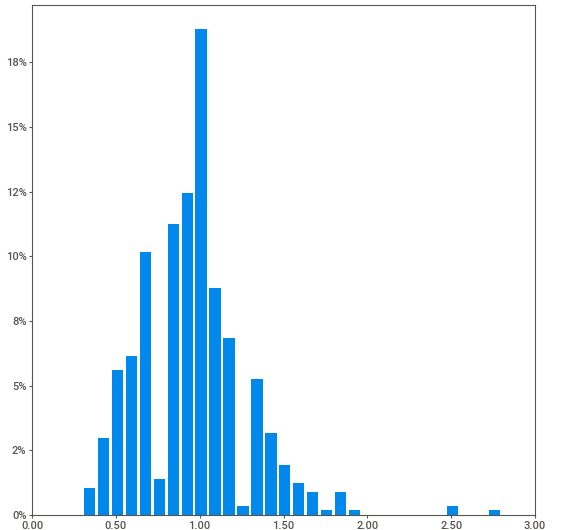
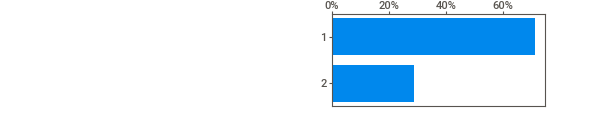
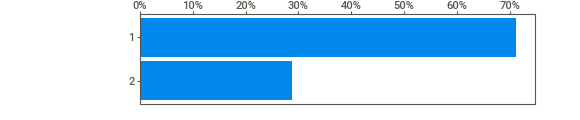
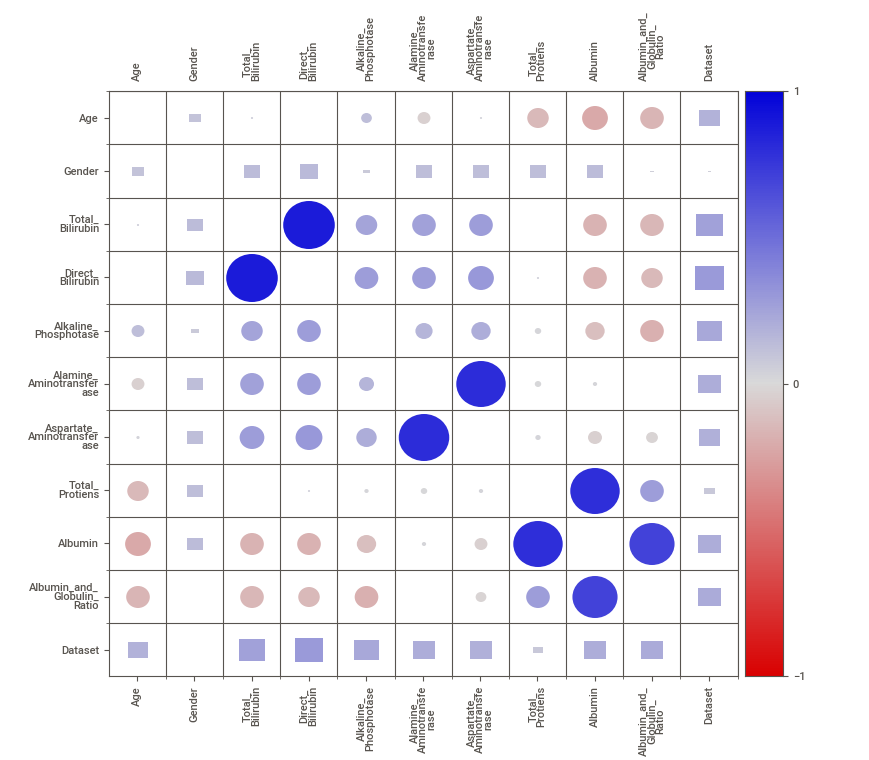
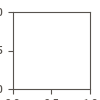

In [19]:
import sweetviz as sv
df_univar_rpt = sv.analyze(df)
df_univar_rpt.show_notebook()

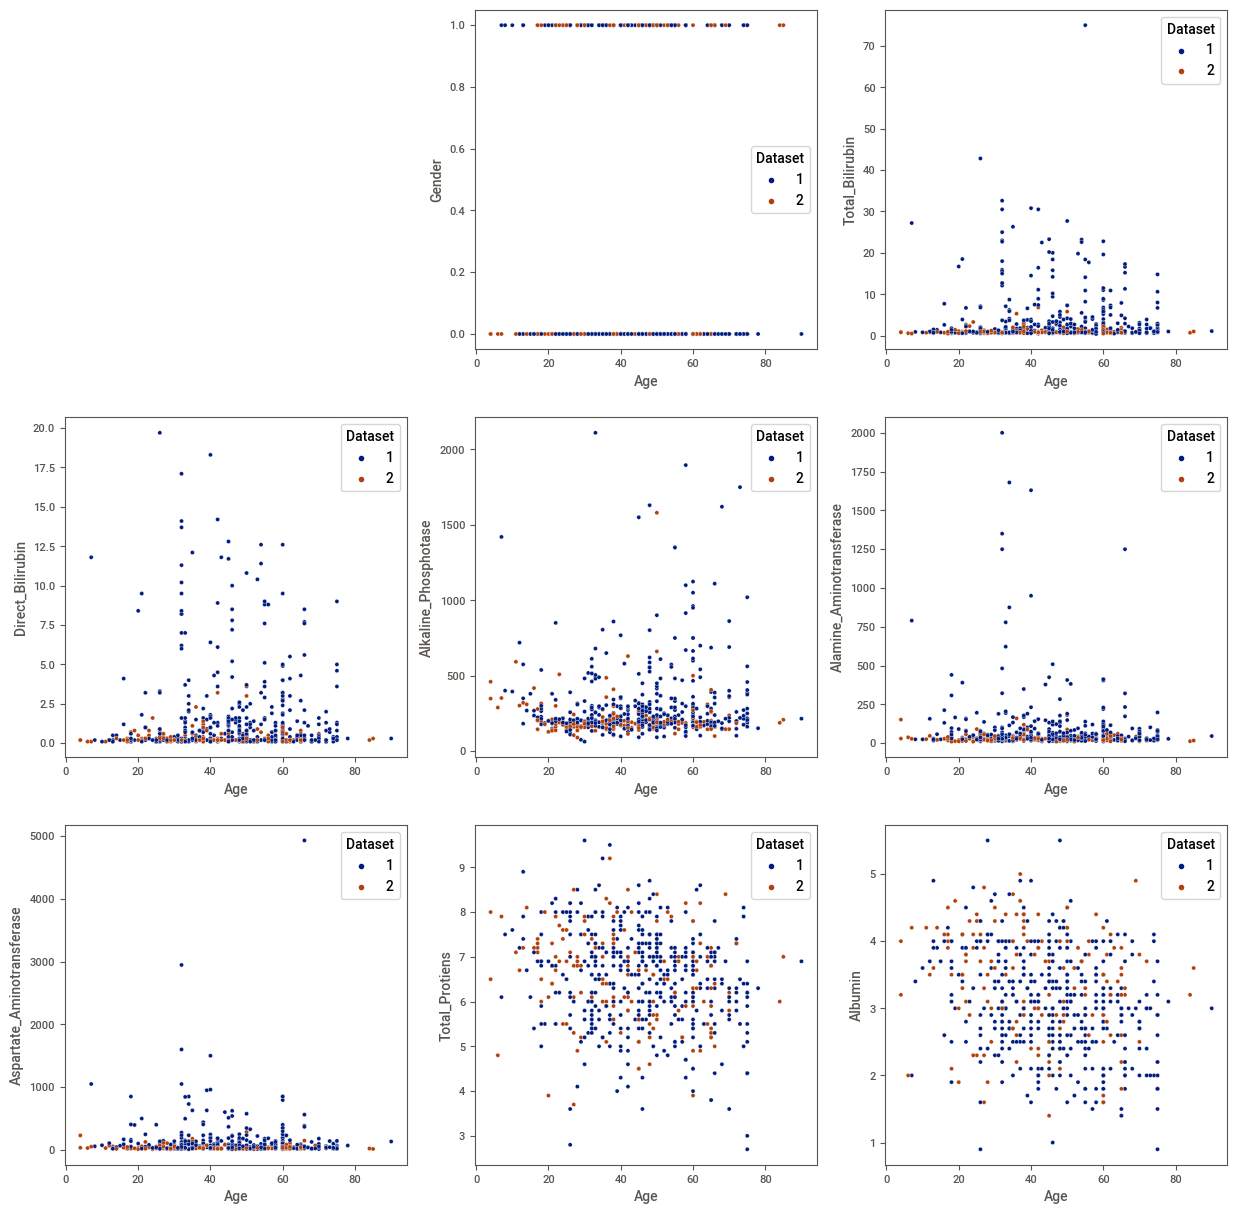

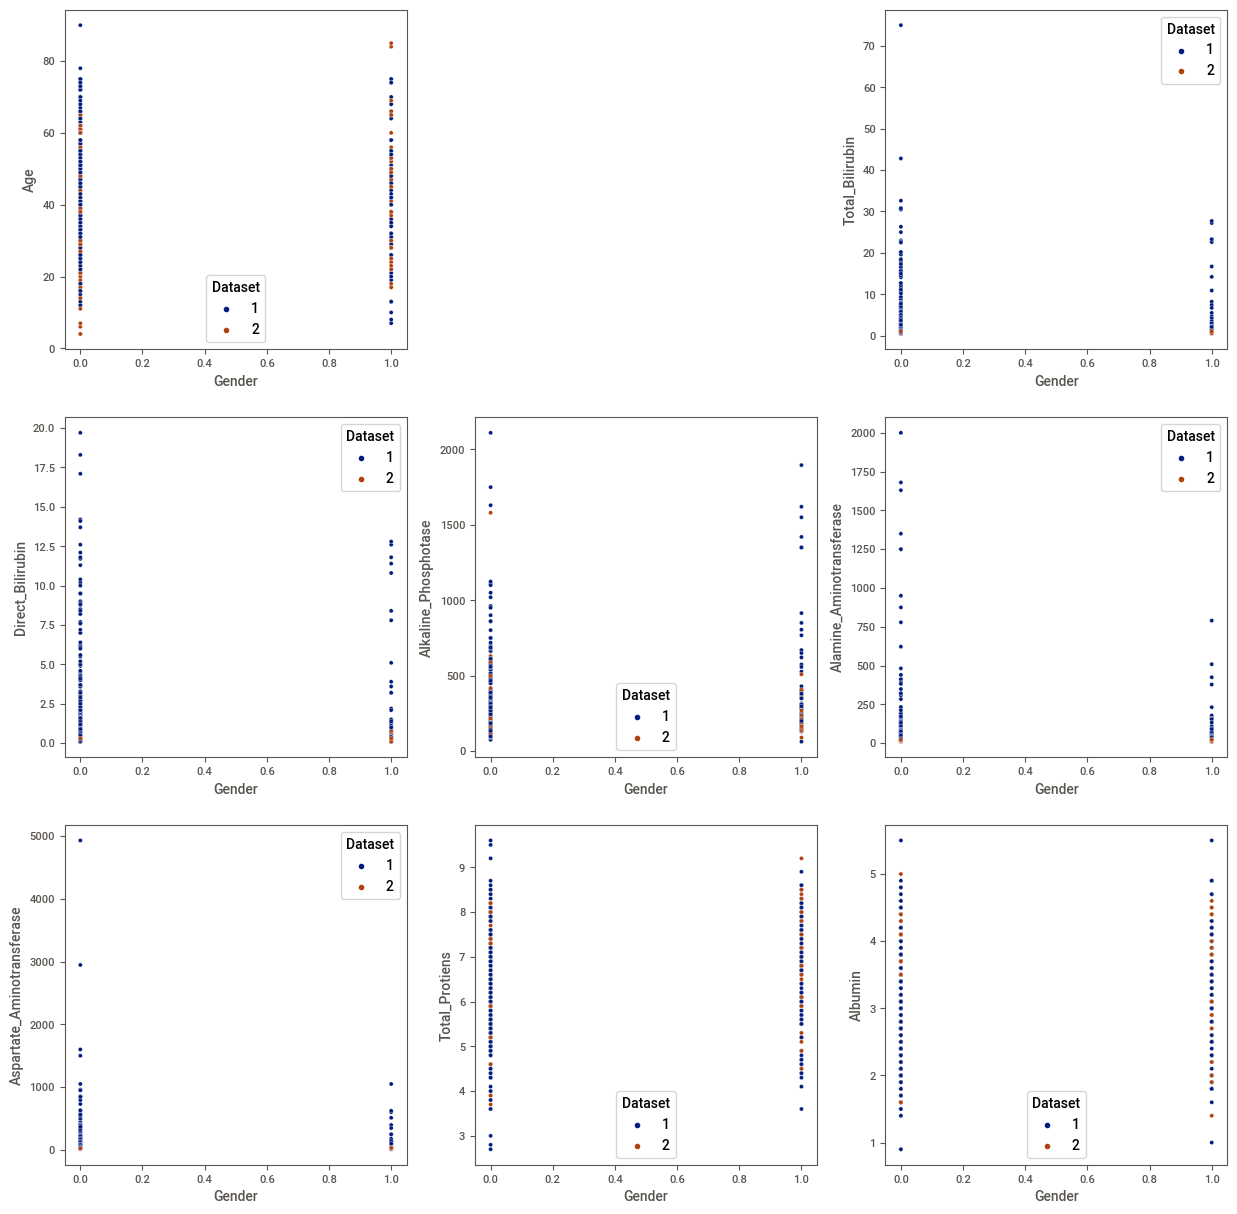

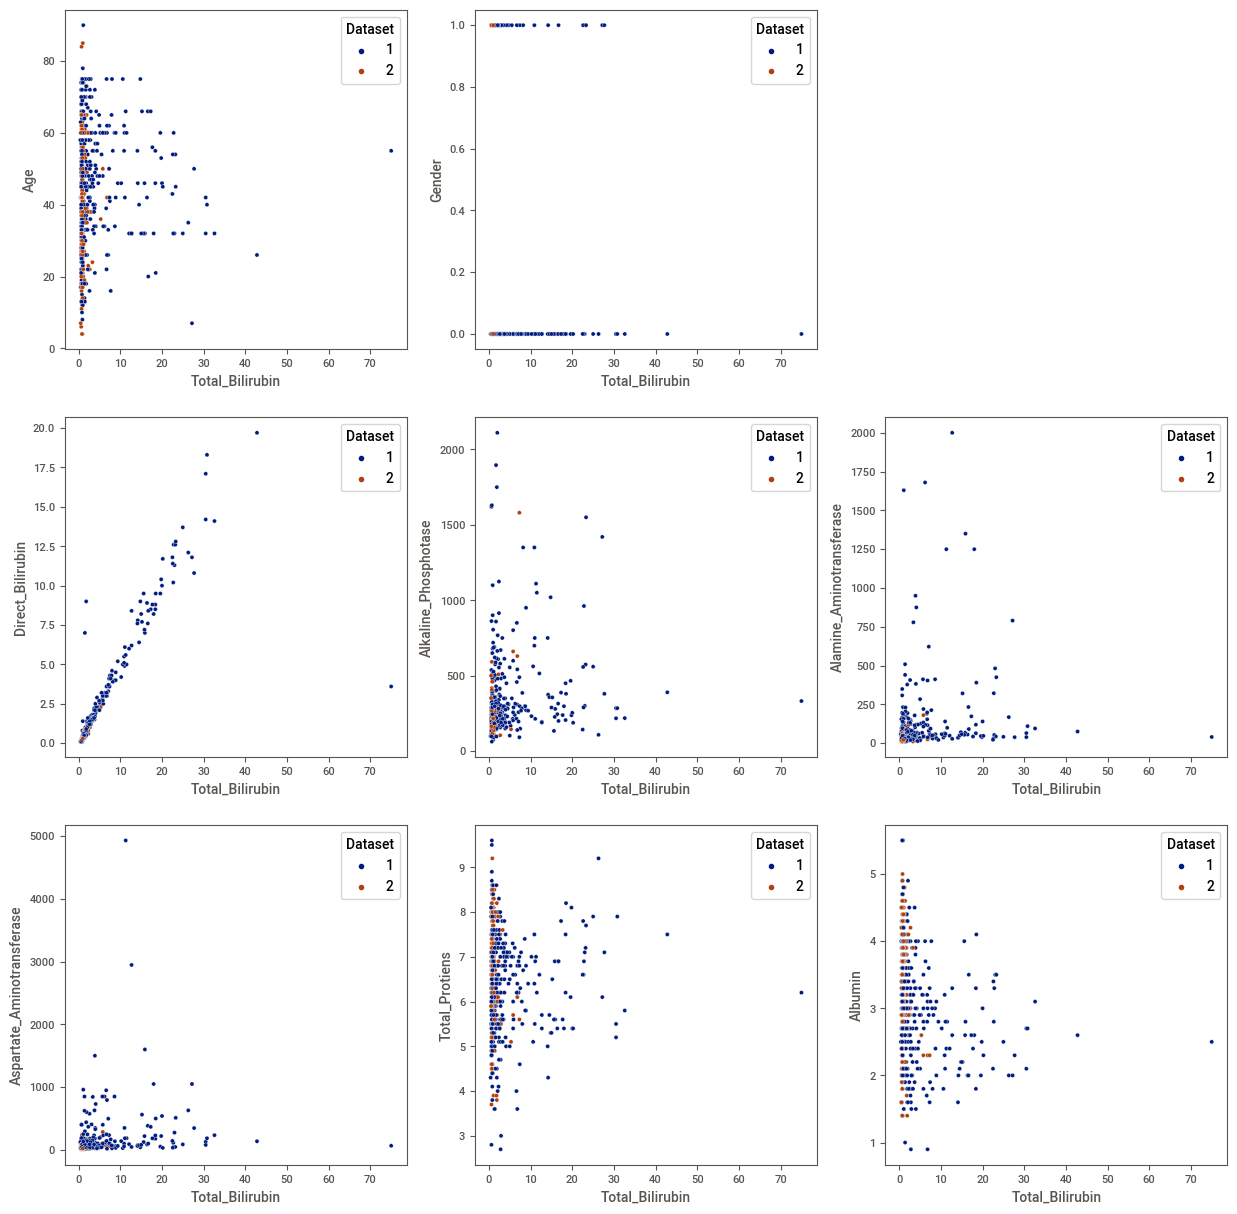

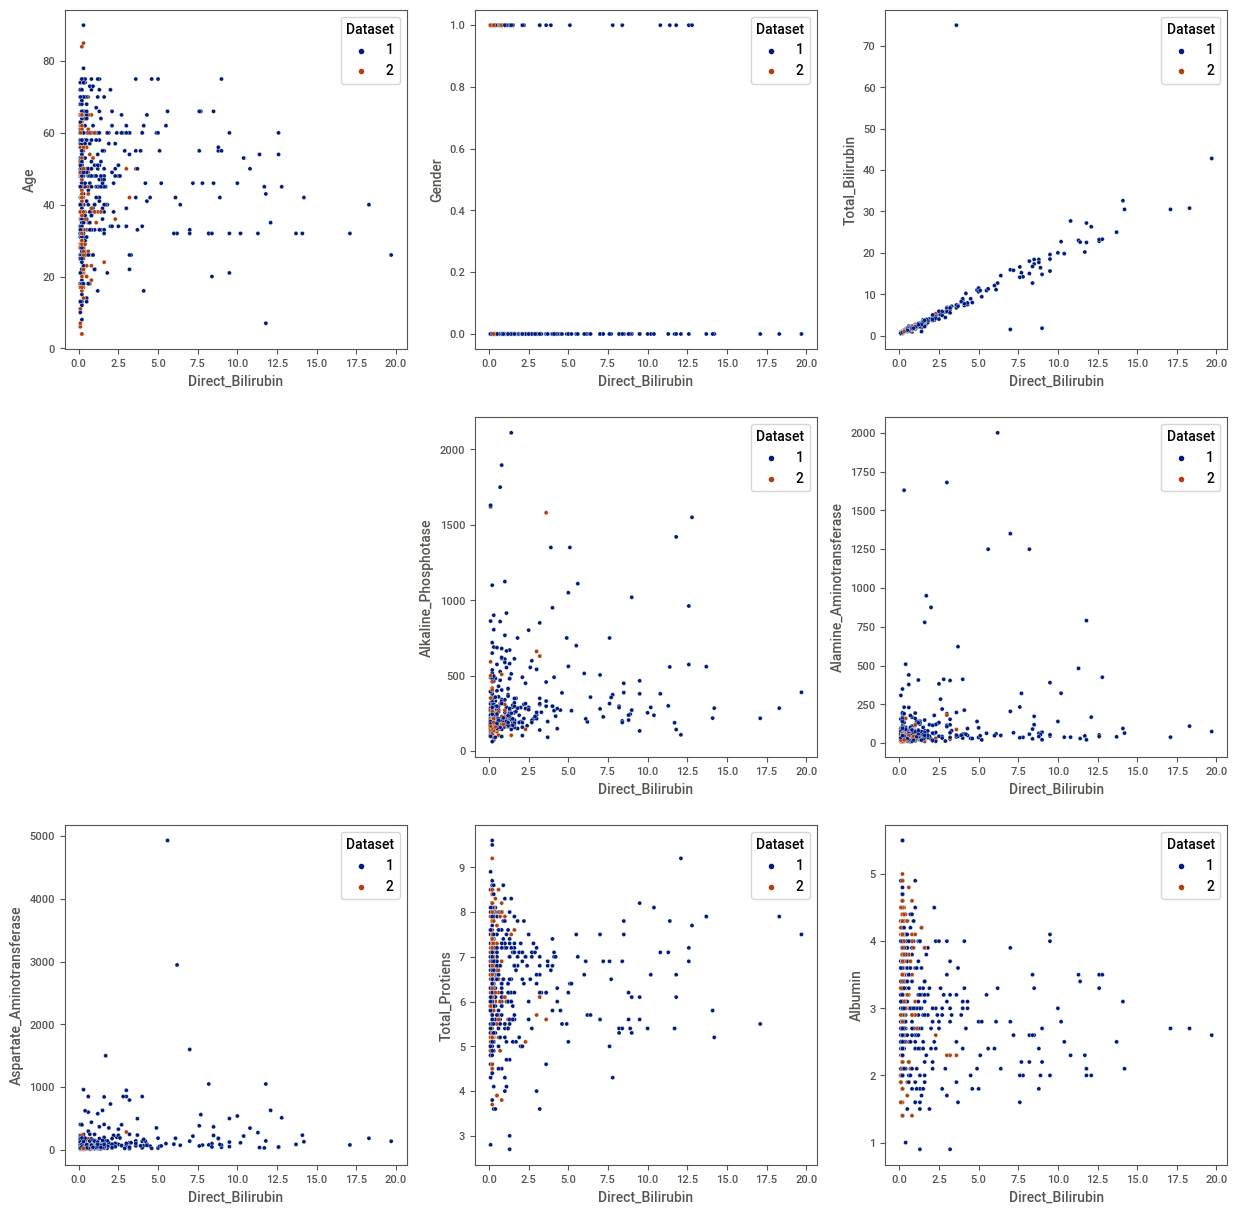

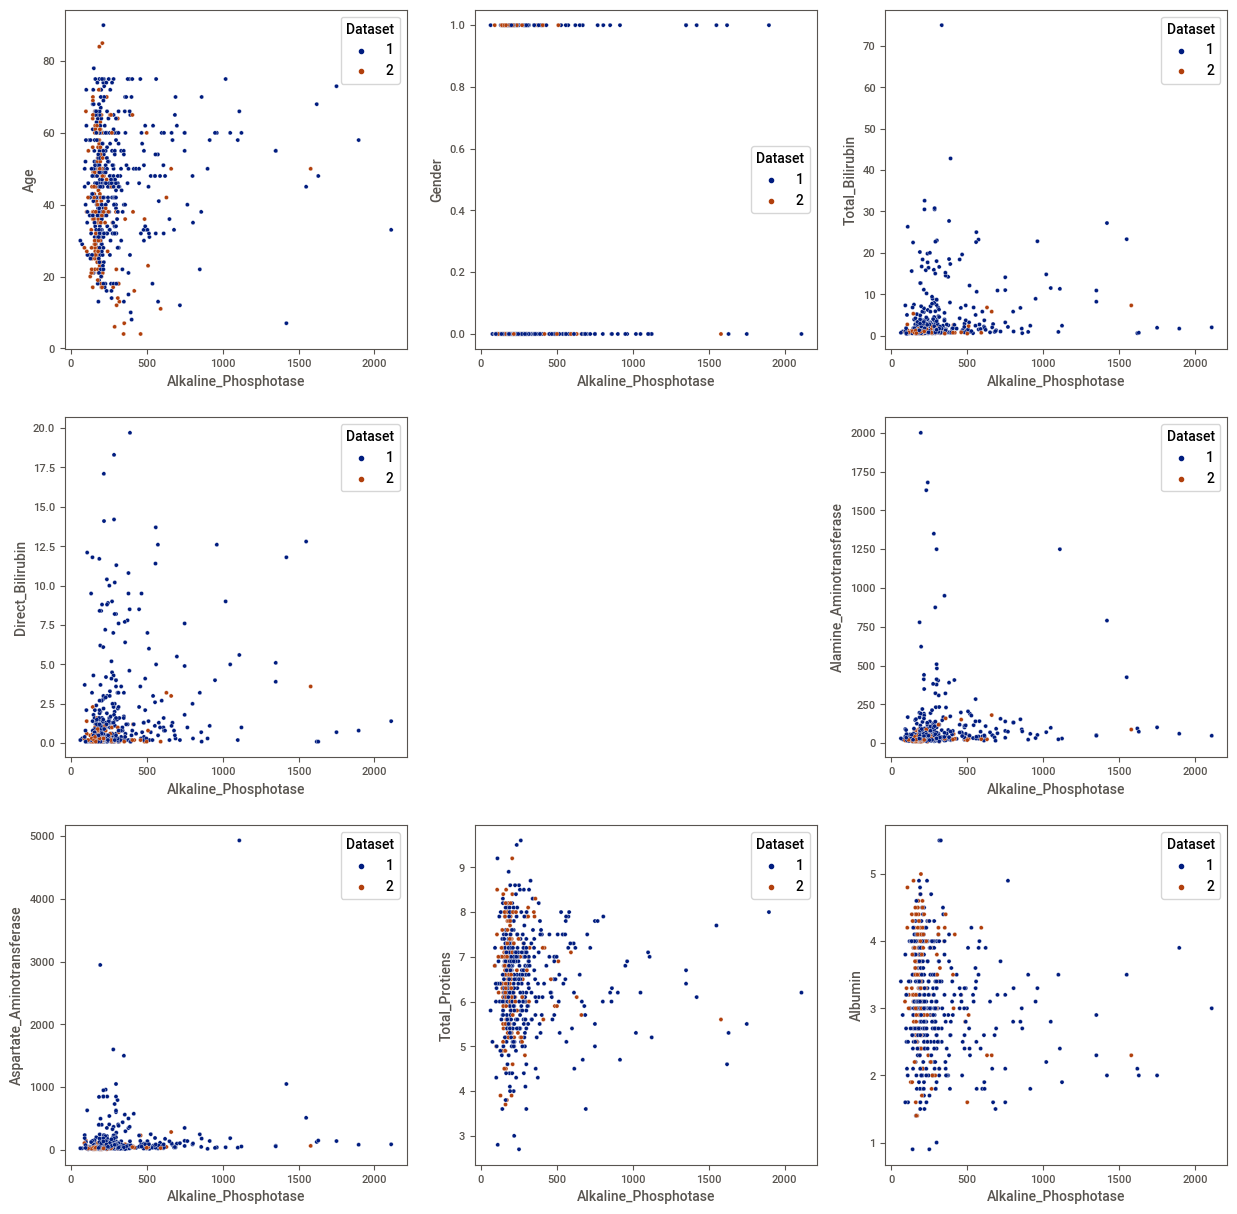

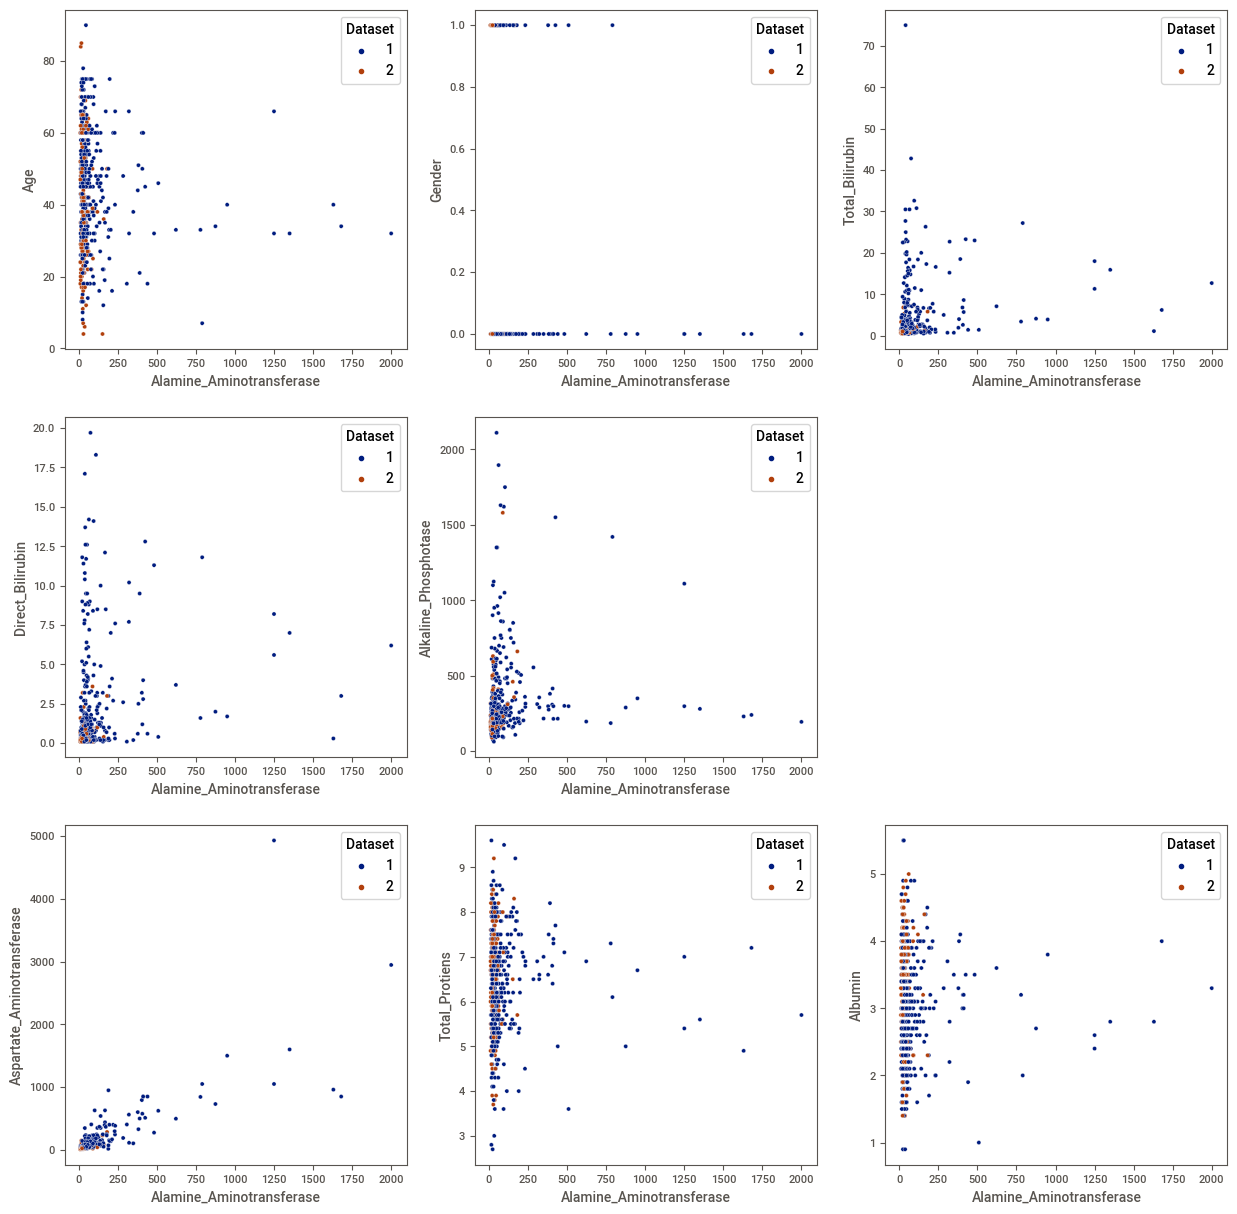

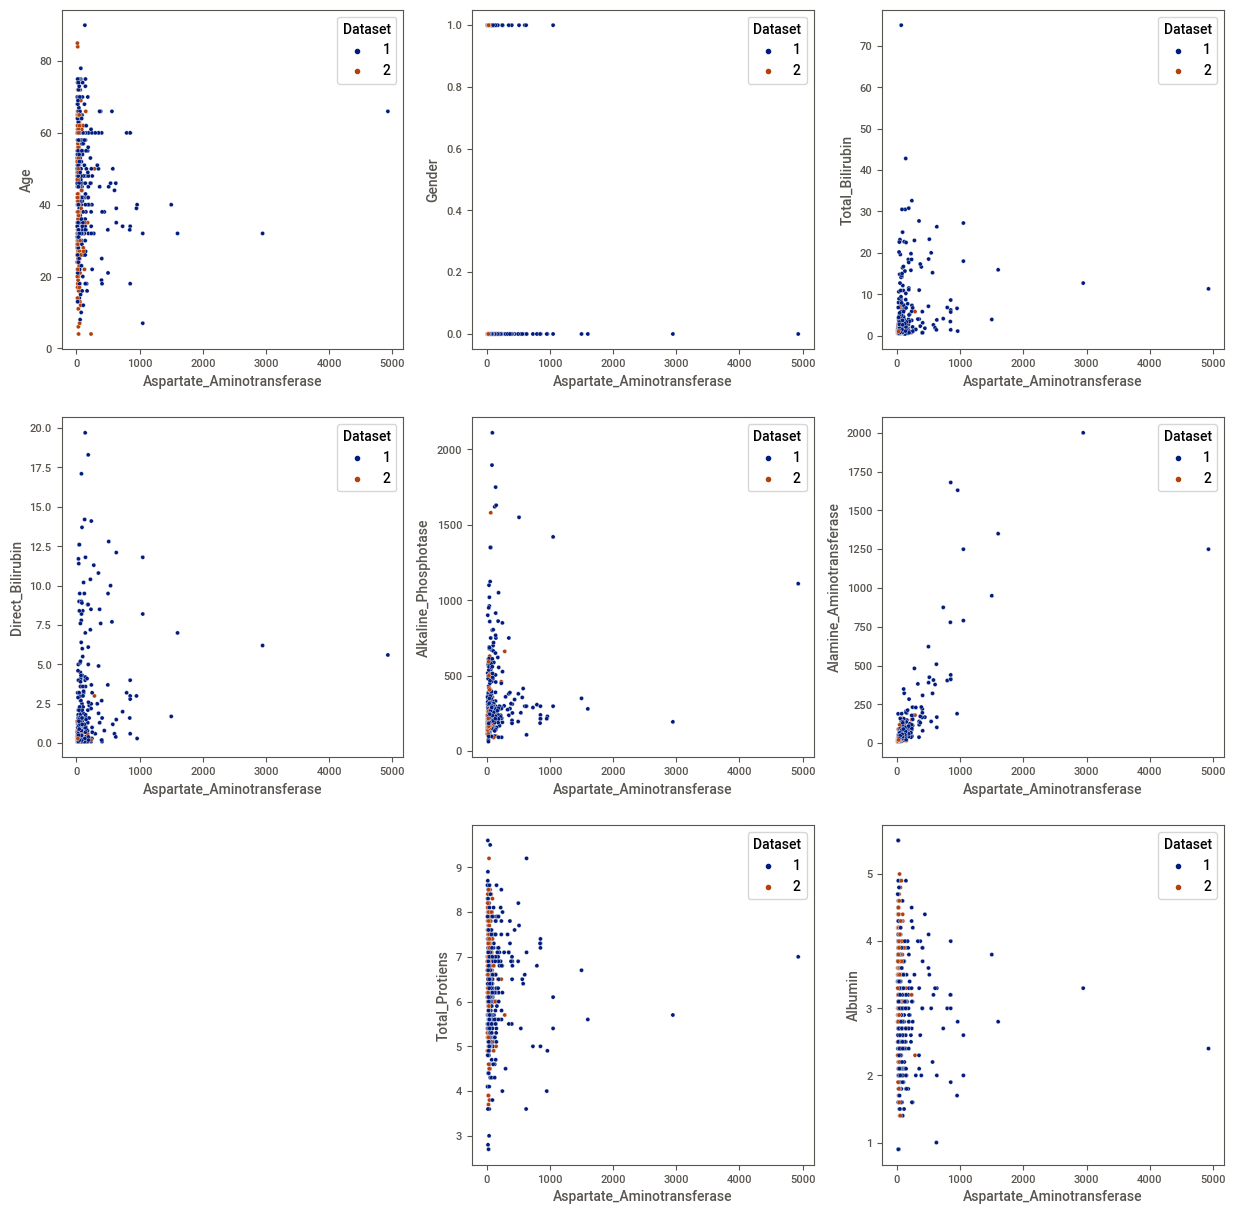

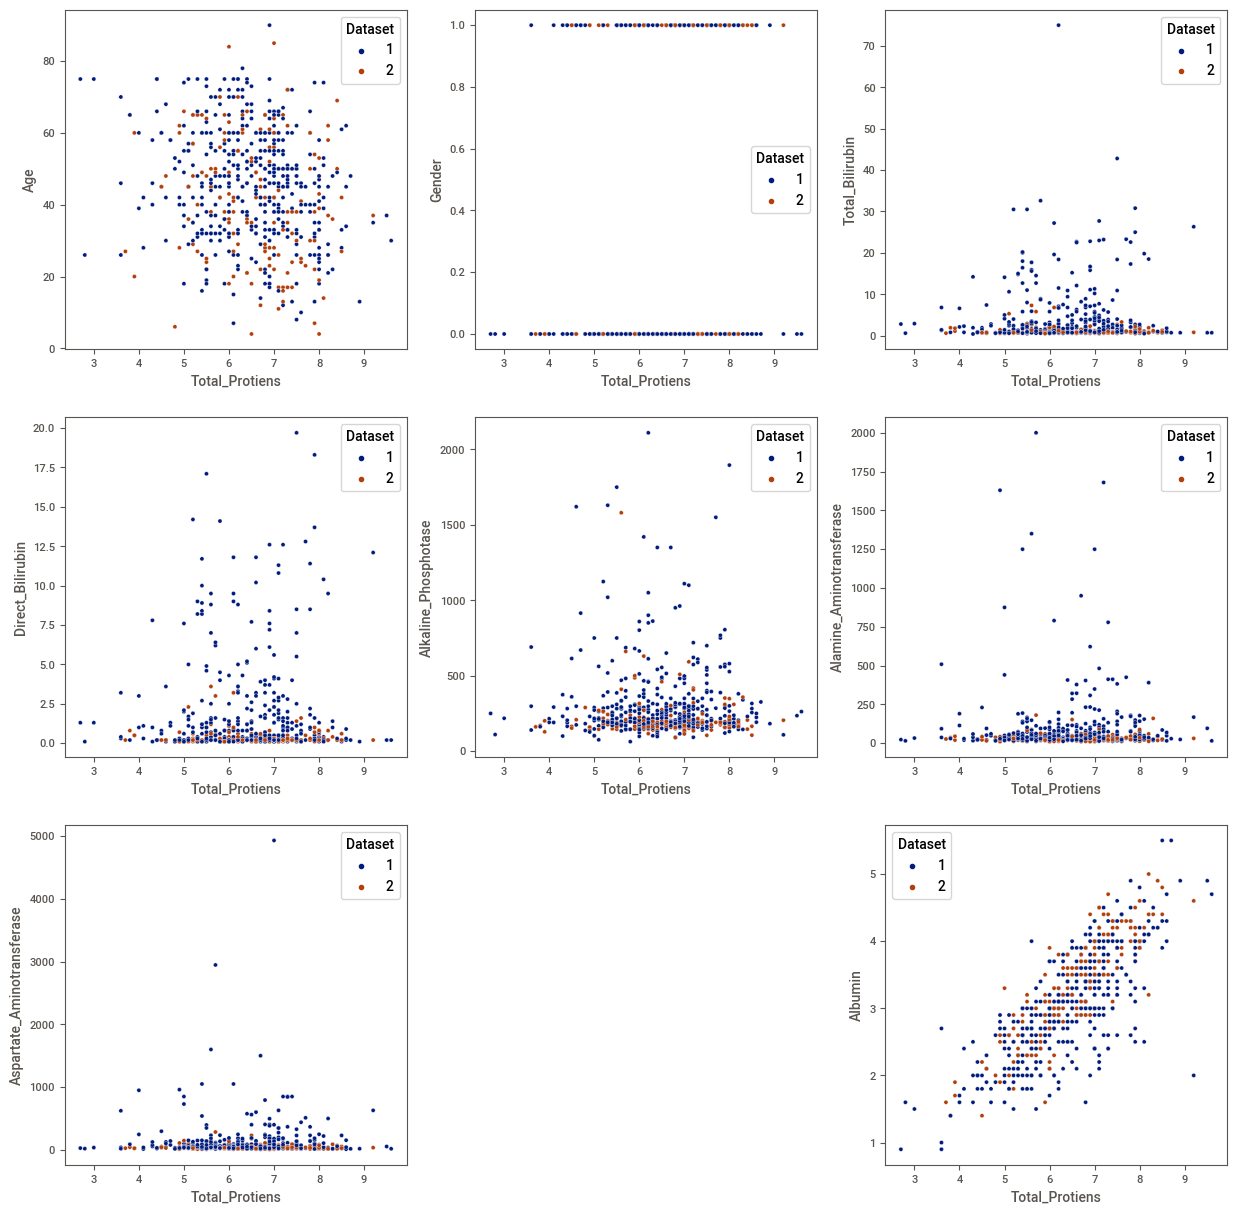

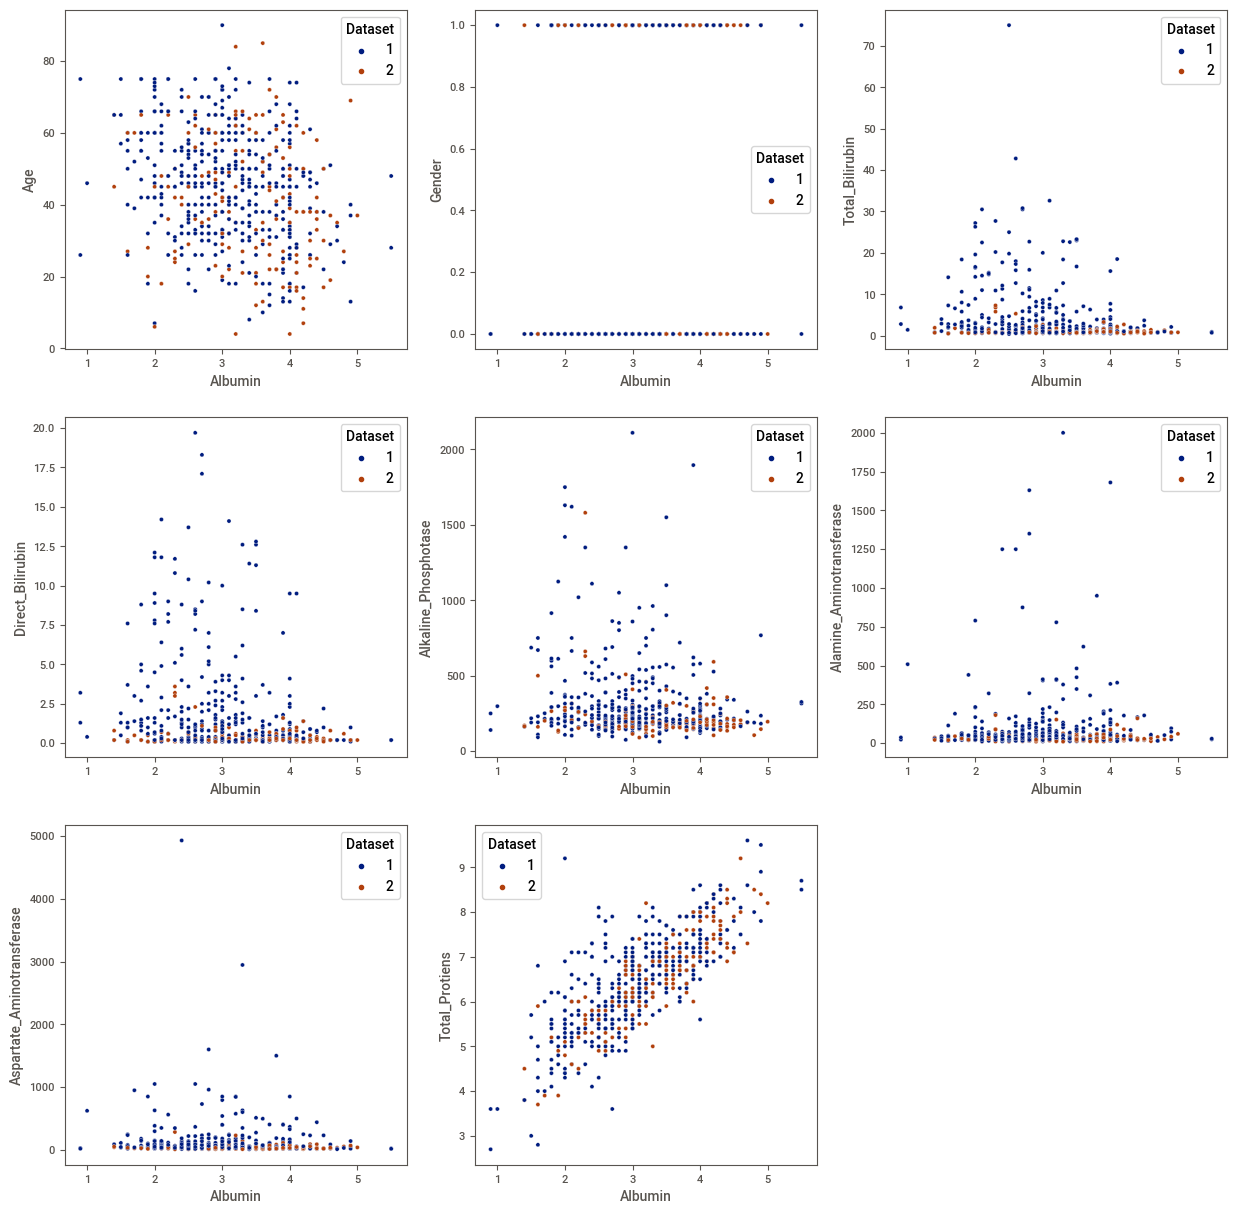

In [20]:
plt_num1 = 1

for column1 in df:
    if plt_num1 <= 9:
        plt_num2 = 1
        plt.figure(figsize=(15,15))
        for column2 in df:
            if plt_num2 <= 9:
                if column2 != column1:
                    plt.subplot(3,3,plt_num2)
                    sns.scatterplot(x=column1, y=column2, data=df, hue="Dataset", palette="dark")
            plt_num2+=1
    plt.show()
    plt_num1+=1

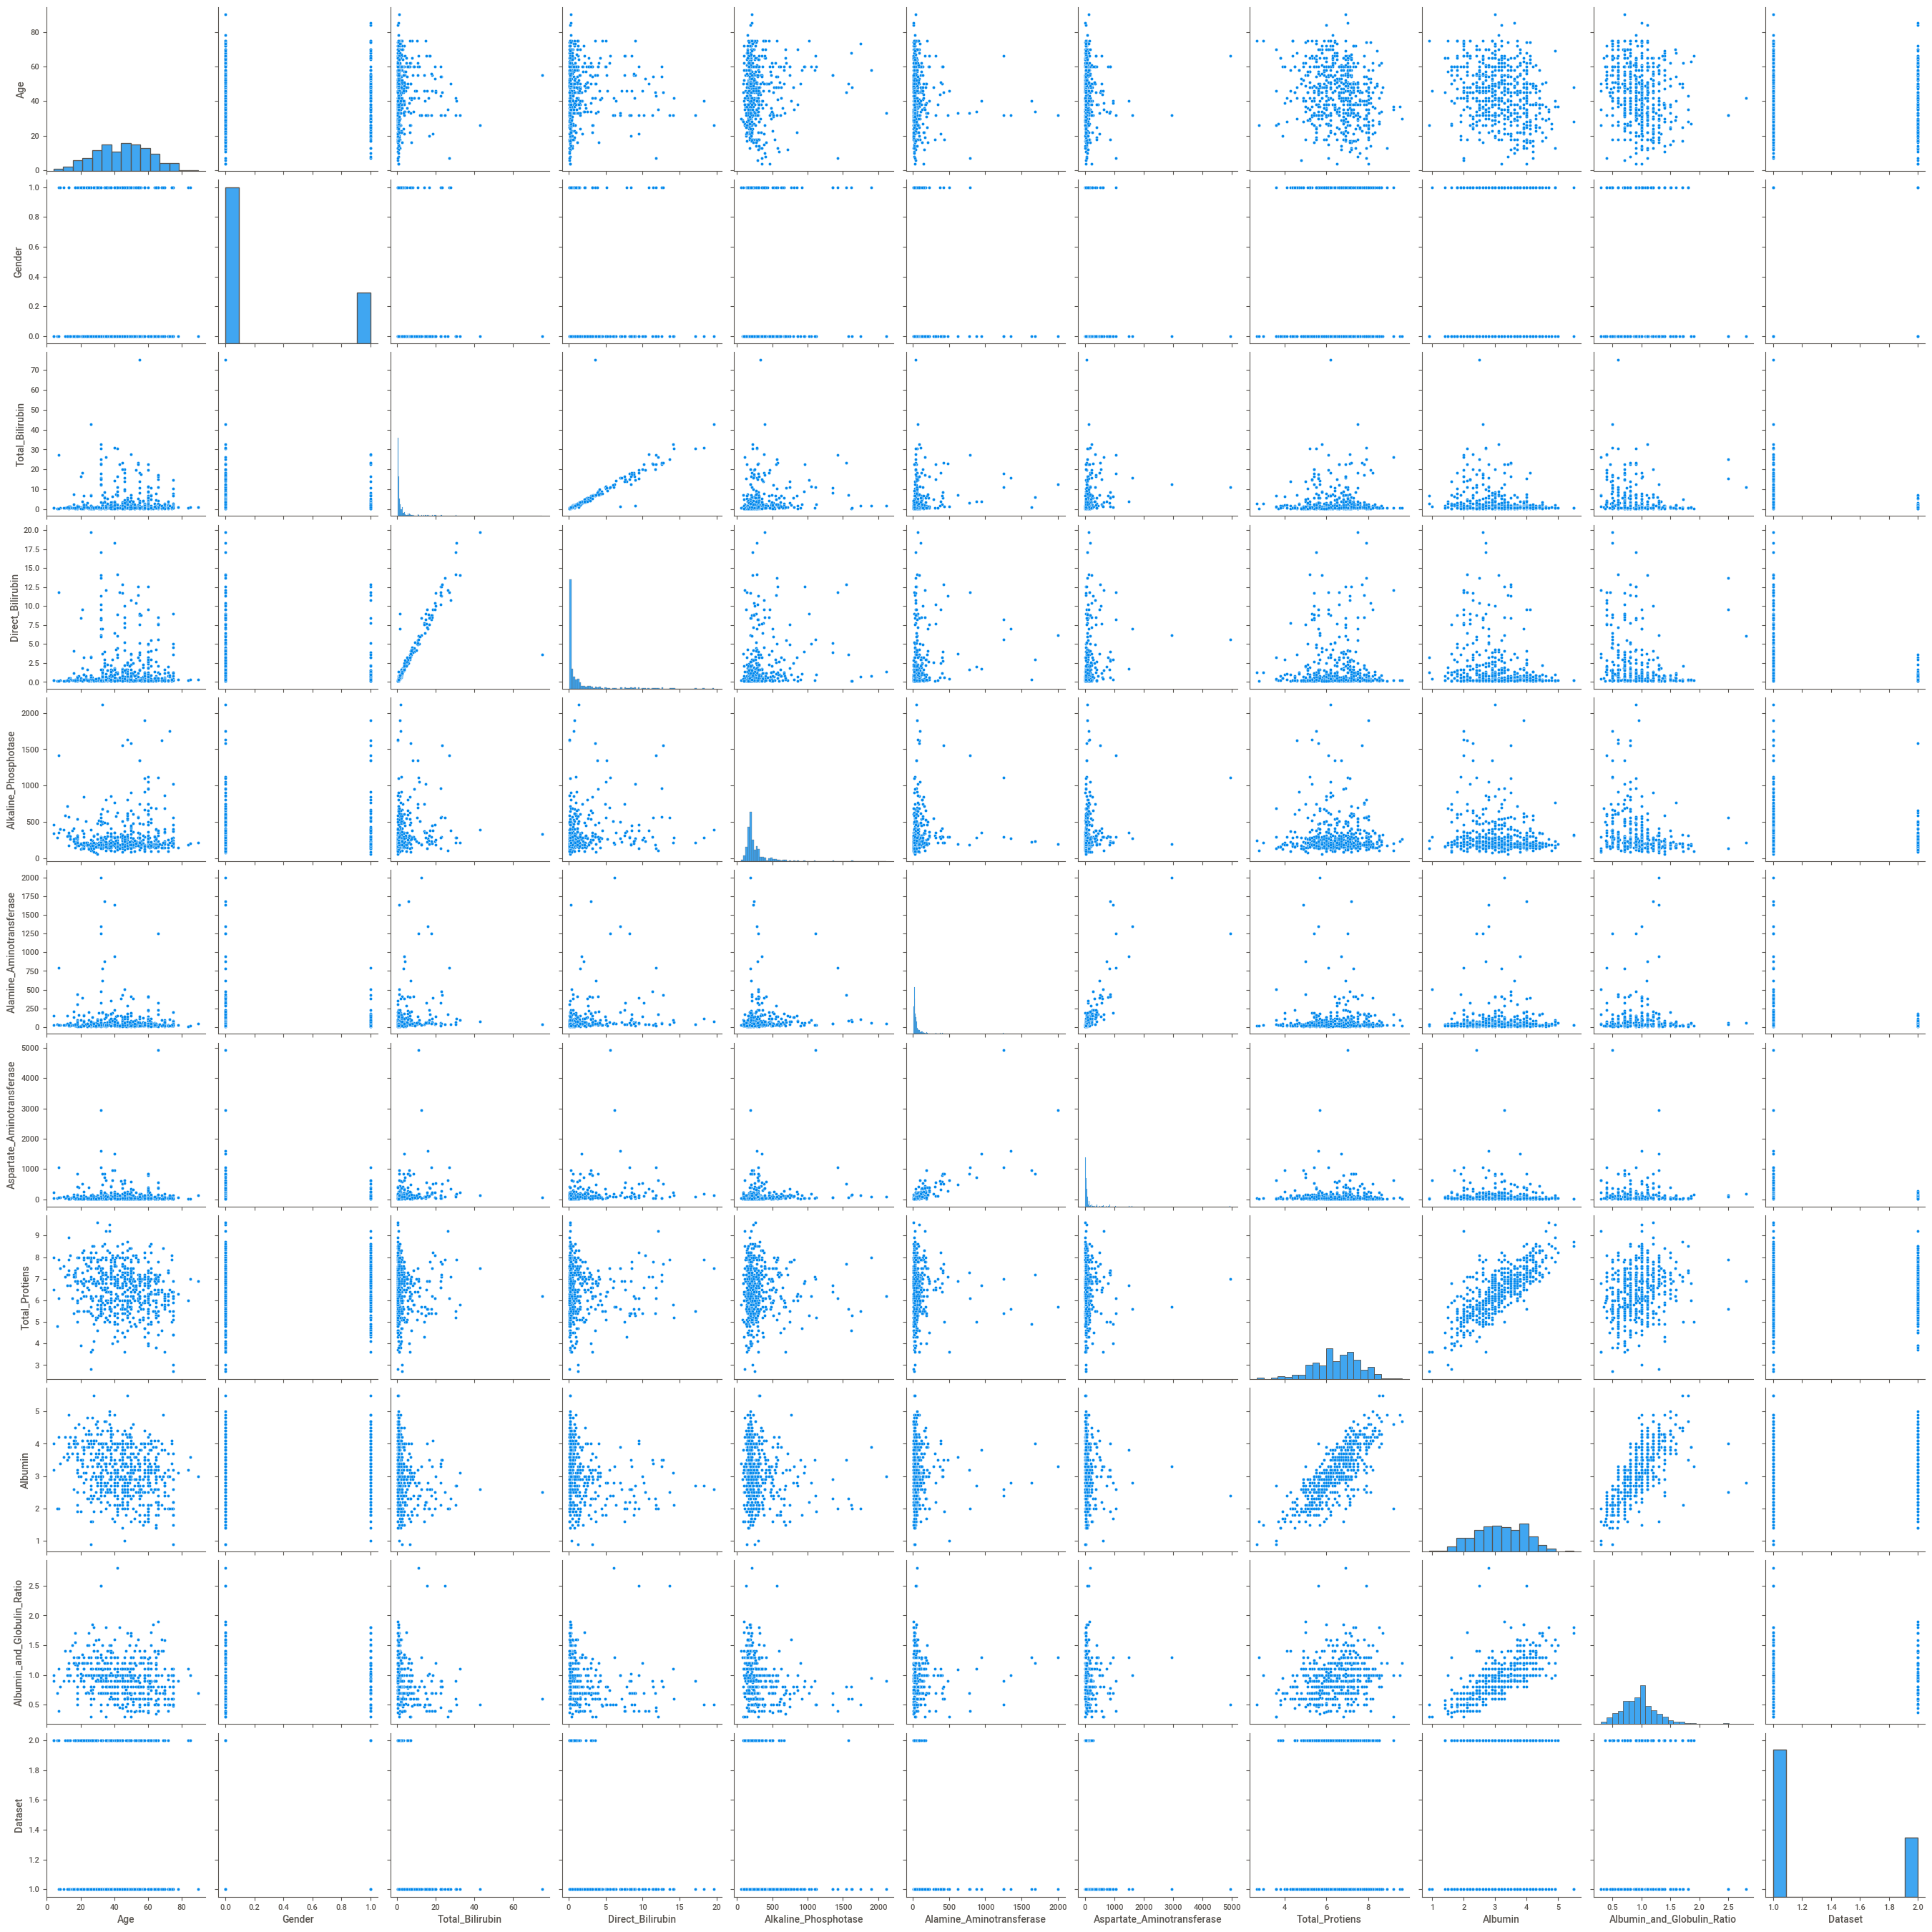

In [21]:
sns.pairplot(df)
plt.show()

In [22]:
num_cols=df.drop('Dataset',axis=1).select_dtypes(exclude='object')
cat_cols=df.select_dtypes(exclude='object')
print(num_cols.columns)
print(cat_cols.columns)

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [23]:
from scipy import stats
attributes_with_outliers = ['Age', 'Gender','Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens',
       'Albumin_and_Globulin_Ratio']
def remove_outliers_zscore(df, attributes):
    for attr in attributes:
        z_scores = stats.zscore(df[attr])
        df = df[(z_scores < 3) & (z_scores > -3)]
    return df

data= remove_outliers_zscore(df, attributes_with_outliers)

In [24]:
df.shape,data.shape

((570, 11), (496, 11))

In [25]:
correlation_matrix =data.corr()
correlation_matrix

Age    Gender  Total_Bilirubin  \
Age                         1.000000 -0.063376         0.120356   
Gender                     -0.063376  1.000000        -0.174467   
Total_Bilirubin             0.120356 -0.174467         1.000000   
Direct_Bilirubin            0.115562 -0.178576         0.948825   
Alkaline_Phosphotase        0.013648 -0.065860         0.337643   
Alamine_Aminotransferase   -0.066961 -0.125357         0.245064   
Aspartate_Aminotransferase -0.025955 -0.127567         0.330939   
Total_Protiens             -0.209868  0.082814        -0.100238   
Albumin                    -0.273250  0.083630        -0.264788   
Albumin_and_Globulin_Ratio -0.212954  0.022558        -0.294891   
Dataset                    -0.149688  0.074074        -0.236109   

                            Direct_Bilirubin  Alkaline_Phosphotase  \
Age                                 0.115562              0.013648   
Gender                             -0.178576             -0.065860   
Total_Bilirubin                     0.948825              0.337643   
Direct_Bilirubin                    1.000000              0.342079   
Alkaline_Phosphotase                0.342079              1.000000   
Alamine_Aminotransferase            0.292051              0.305767   
Aspartate_Aminotransferase          0.341458              0.253471   
Total_Protiens                     -0.069033             -0.017490   
Albumin                            -0.237816             -0.150650   
Albumin_and_Globulin_Ratio         -0.286567             -0.251163   
Dataset                            -0.246140             -0.206624   

                            Alamine_Aminotransferase  \
Age                                        -0.066961   
Gender                                     -0.125357   
Total_Bilirubin                             0.245064   
Direct_Bilirubin                            0.292051   
Alkaline_Phosphotase                        0.305767   
Alamine_Aminotransferase                    1.000000   
Aspartate_Aminotransferase                  0.709476   
Total_Protiens                              0.029430   
Albumin                                     0.037628   
Albumin_and_Globulin_Ratio                 -0.002322   
Dataset                                    -0.216537   

                            Aspartate_Aminotransferase  Total_Protiens  \
Age                                          -0.025955       -0.209868   
Gender                                       -0.127567        0.082814   
Total_Bilirubin                               0.330939       -0.100238   
Direct_Bilirubin                              0.341458       -0.069033   
Alkaline_Phosphotase                          0.253471       -0.017490   
Alamine_Aminotransferase                      0.709476        0.029430   
Aspartate_Aminotransferase                    1.000000       -0.034154   
Total_Protiens                               -0.034154        1.000000   
Albumin                                      -0.072413        0.820415   
Albumin_and_Globulin_Ratio                   -0.075850        0.294250   
Dataset                                      -0.216051        0.024082   

                             Albumin  Albumin_and_Globulin_Ratio   Dataset  
Age                        -0.273250                   -0.212954 -0.149688  
Gender                      0.083630                    0.022558  0.074074  
Total_Bilirubin            -0.264788                   -0.294891 -0.236109  
Direct_Bilirubin           -0.237816                   -0.286567 -0.246140  
Alkaline_Phosphotase       -0.150650                   -0.251163 -0.206624  
Alamine_Aminotransferase    0.037628                   -0.002322 -0.216537  
Aspartate_Aminotransferase -0.072413                   -0.075850 -0.216051  
Total_Protiens              0.820415                    0.294250  0.024082  
Albumin                     1.000000                    0.747861  0.129632  
Albumin_and_Globulin_Ratio  0.747861                   

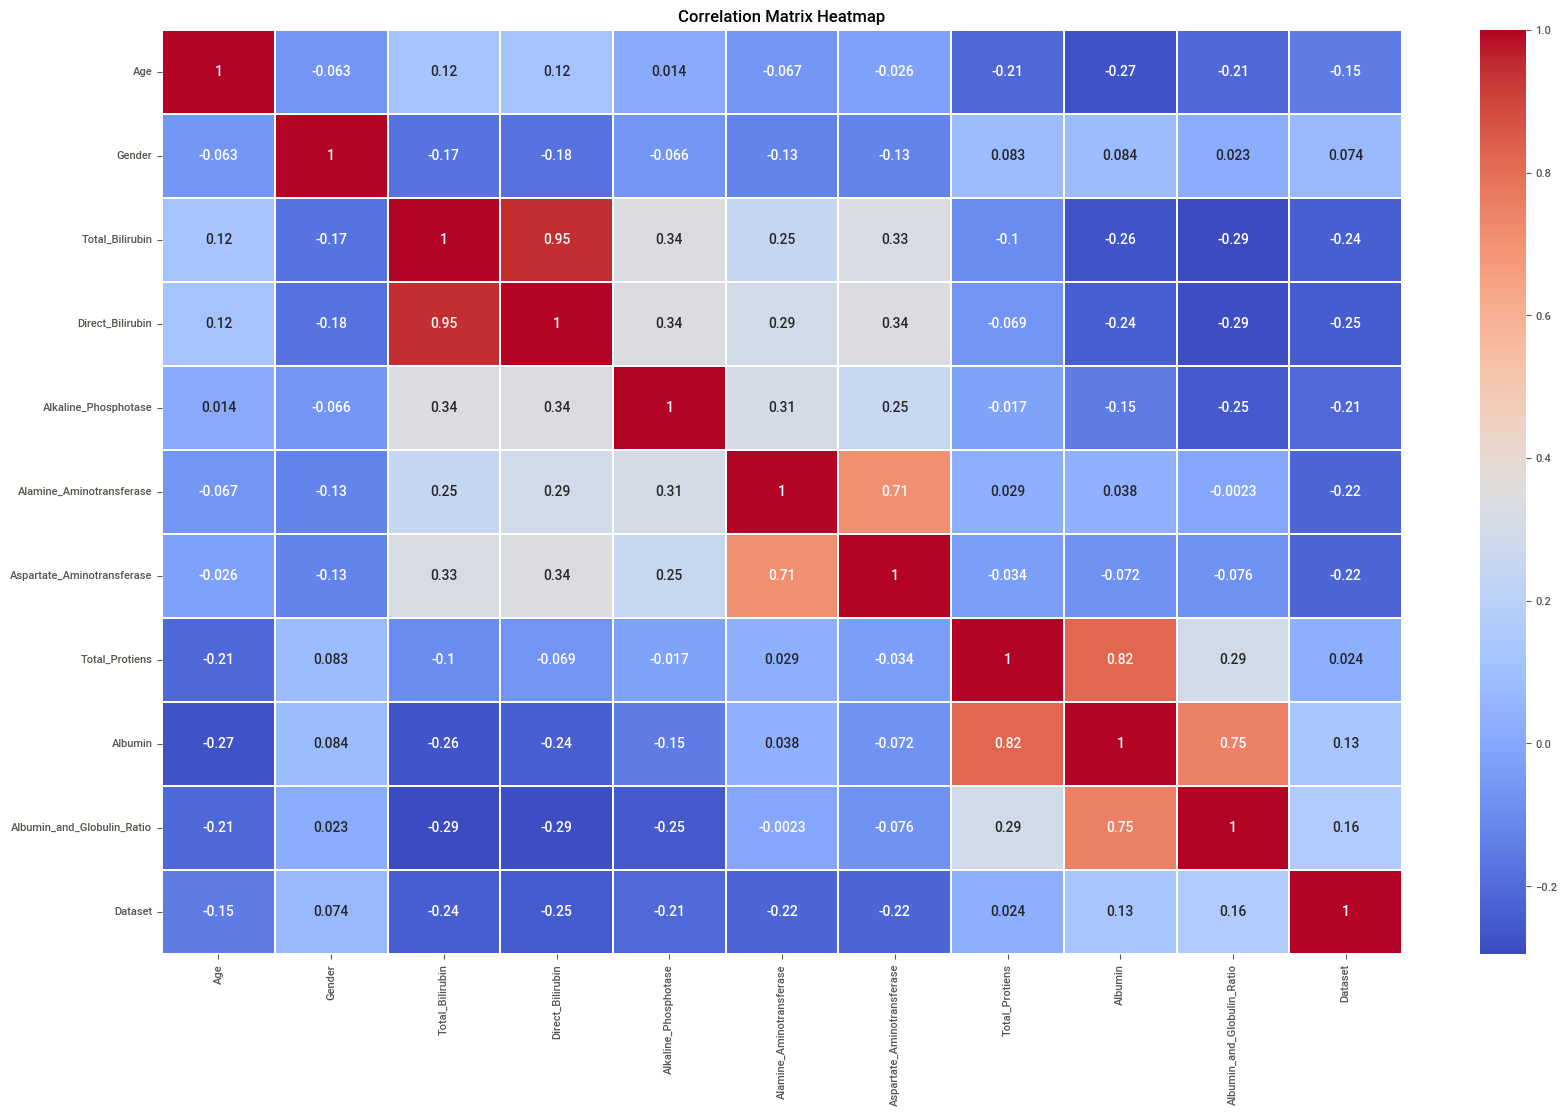

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', linewidths=.05)
plt.title('Correlation Matrix Heatmap')
plt.show()

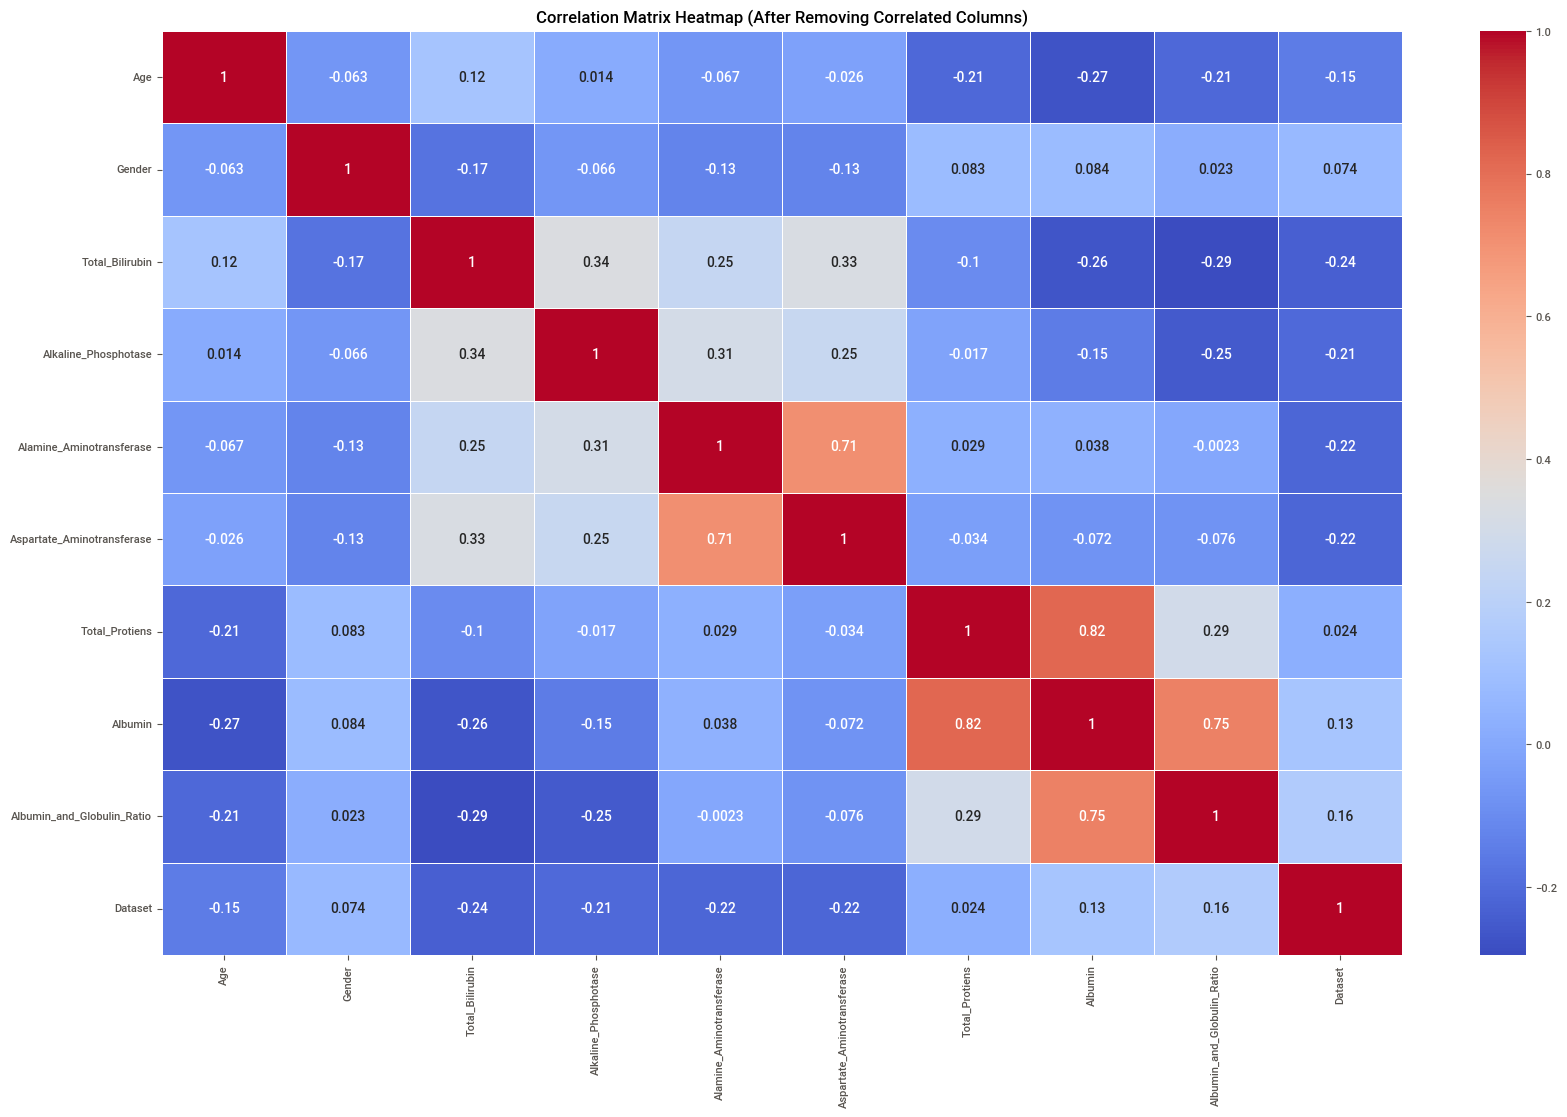

In [27]:
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.85:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_filtered = data.drop(columns=correlated_features)
correlation_matrix_filtered = df_filtered.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap (After Removing Correlated Columns)')
plt.show()

In [28]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [29]:
df_filtered.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [30]:
correlated_features

{'Direct_Bilirubin'}

In [31]:
df_target=data['Dataset']
df_feature=data.drop('Dataset',axis=1)

In [32]:
num_cols=df_feature.select_dtypes(exclude='object')
dummy=pd.get_dummies(df_feature['Gender'],drop_first=True)

In [33]:
X=pd.concat([num_cols,dummy],axis=1)
X.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       1              0.7               0.1                   187   
1   62       0             10.9               5.5                   699   
2   62       0              7.3               4.1                   490   
3   58       0              1.0               0.4                   182   
4   72       0              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio      1  
0      3.3                        0.90   True  
1      3.2                        0.74  False  
2      3.3                        0.89  False  
3      3.4                        1.00  False  
4      2.4                        0.40  False

In [34]:
df_filtered.shape,data.shape

((496, 10), (496, 11))

In [35]:
df_filtered['Dataset'] = df_filtered['Dataset'].map({2:0,1:1})

In [36]:
df_filtered.head(60)

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0    65       1              0.7                   187   
1    62       0             10.9                   699   
2    62       0              7.3                   490   
3    58       0              1.0                   182   
4    72       0              3.9                   195   
5    46       0              1.8                   208   
6    26       1              0.9                   154   
7    29       1              0.9                   202   
8    17       0              0.9                   202   
9    55       0              0.7                   290   
10   57       0              0.6                   210   
11   72       0              2.7                   260   
12   64       0              0.9                   310   
13   74       1              1.1                   214   
14   61       0              0.7                   145   
15   25       0              0.6                   183   
17   33       0              1.6                   165   
18   40       1              0.9                   293   
20   51       0              2.2                   610   
21   51       0              2.9                   482   
22   62       0              6.8                   542   
23   40       0              1.9                   231   
24   63       0              0.9                   194   
28   20       0              1.1                   128   
29   84       1              0.7                   188   
30   57       0              4.0                   190   
31   52       0              0.9                   156   
32   57       0              1.0                   187   
33   38       1              2.6                   410   
35   30       0              1.3                   482   
36   17       1              0.7                   145   
38   48       0              1.4                   263   
39   47       0              2.7                   275   
40   45       0              2.4                   168   
41   62       0              0.6                   160   
42   42       0              6.8                   630   
44   85       1              1.0                   208   
45   35       0              1.8                   275   
46   21       0              3.9                   150   
48   32       1              0.6                   176   
50   45       1              0.7                   170   
51   34       1              0.6                   161   
52   38       0              3.1                   253   
53   38       0              1.1                   198   
54   42       0              8.9                   272   
56   33       0              0.8                   198   
57   48       1              0.9                   175   
58   51       0              0.8                   367   
59   64       0              1.1                   145   
60   31       1              0.8                   158   
61   58       0              1.0                   158   
63   57       0              0.7                   208   
64   57       0              1.3                   259   
65   57       0              1.4                   470   
66   54       0              2.2                   195   
67   37       0              1.8                   215   
68   66       0              0.7                   239   
69   60       0              0.8                   215   
70   19       1              0.7                   186   
71   75       1              0.8                   188   

    Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                         16                          18             6.8   
1                         64                         100             7.5   
2                         60                          68             7.0   
3                         14                          20             6.8   
4                         27                          59             7.3   
5        

In [37]:
X =df_filtered.drop('Dataset',axis=1)
y =df_filtered['Dataset']

In [38]:
X

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0     65       1              0.7                   187   
1     62       0             10.9                   699   
2     62       0              7.3                   490   
3     58       0              1.0                   182   
4     72       0              3.9                   195   
..   ...     ...              ...                   ...   
578   60       0              0.5                   500   
579   40       0              0.6                    98   
580   52       0              0.8                   245   
581   31       0              1.3                   184   
582   38       0              1.0                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  
0        3.3                        0.90  
1        3.2                        0.74  
2        3.3                        0.89  
3        3.4                        1.00  
4        2.4                        0.40  
..       ...                         ...  
578      1.6                        0.37  
579      3.2                        1.10  
580      3.2                        1.00  
581      3.4                        1.00  
582      4.4                        1.50  

[496 rows x 9 columns]

In [39]:
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Dataset, Length: 496, dtype: int64

In [40]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()

# Scale only the predictors
X_scl = std_scl.fit_transform(X)
X_scl = pd.DataFrame(X_scl, columns = ['Age', 'Total_Bilirubin',  'Alkaline_Phosphotase',
                                       'Alanine_Aminotransferase', 'Aspartate_Aminotransferase',
                                       'Total_Protiens', 'Albumin', 'Albumin_Globulin_Ratio', 'Gender'])

In [41]:
data_scl = pd.concat([X_scl.reset_index(drop=True), y.reset_index(drop=True)], axis=1)
data_scl

Age  Total_Bilirubin  Alkaline_Phosphotase  \
0    1.238441         1.704556             -0.534805   
1    1.055877        -0.586663              4.786111   
2    1.055877        -0.586663              2.908141   
3    0.812459        -0.586663             -0.378308   
4    1.664424        -0.586663              1.134502   
..        ...              ...                   ...   
491  0.934168        -0.586663             -0.639137   
492 -0.282925        -0.586663             -0.586971   
493  0.447331        -0.586663             -0.482639   
494 -0.830617        -0.586663             -0.221810   
495 -0.404634        -0.586663             -0.378308   

     Alanine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                   -0.464002                   -0.677701       -0.642882   
1                    2.995095                    0.339812        0.627330   
2                    1.583081                    0.255019        0.131637   
3                   -0.497782                   -0.720097       -0.611902   
4                   -0.409953                   -0.444521       -0.007776   
..                        ...                         ...             ...   
491                  1.650641                   -0.592908       -0.395036   
492                 -1.065290                   -0.274935       -0.441507   
493                 -0.072151                    0.000641       -0.162680   
494                 -0.484270                   -0.402124       -0.426017   
495                 -0.268076                   -0.571710       -0.549940   

      Albumin  Albumin_Globulin_Ratio    Gender  Dataset  
0    0.247903                0.103311 -0.222409        1  
1    0.916165               -0.024475 -0.780965        1  
2    0.438835                0.103311 -0.257319        1  
3    0.247903                0.231097  0.126689        1  
4    0.725233               -1.046765 -1.967897        1  
..        ...                     ...       ...      ...  
491 -0.611290               -2.069055 -2.072627        0  
492 -0.515824               -0.024475  0.475786        1  
493 -0.133960               -0.024475  0.126689        1  
494  0.247903                0.231097  0.126689        1  
495  0.725233                1.508960  1.872177        0  

[496 rows x 10 columns]

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X,y)
print("Before SMOTE: ", Counter(y))
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE:  Counter({1: 334, 0: 162})
After SMOTE:  Counter({1: 334, 0: 334})


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.3, random_state=33)
print("X_train_smote: ",  X_train_smote.shape)
print("X_test       : ",         X_test.shape)
print("y_train_smote: ",  y_train_smote.shape)
print("y_test       : ",         y_test.shape)

X_train_smote:  (668, 9)
X_test       :  (201, 9)
y_train_smote:  (668,)
y_test       :  (201,)


In [44]:
X_train_smote.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'],
      dtype='object')

Classification Report (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       104
           1       0.81      0.69      0.74        97

    accuracy                           0.77       201
   macro avg       0.78      0.77      0.77       201
weighted avg       0.78      0.77      0.77       201

Accuracy   : 0.7711442786069652
Precision  : 0.8072289156626506
Recall     : 0.6907216494845361
F1-score   : 0.7444444444444445

K-fold Cross-validation Results (K-Nearest Neighbors with SMOTE):
Mean Accuracy   : 0.5809166666666667
Mean Precision  : 0.7400266277839809
Mean Recall     : 0.571875
Mean F1-score   : 0.6378432530059356
[[88 16]
 [30 67]]

Additional Metrics for K-Nearest Neighbors:
Sensitivity (True Positive Rate): 0.6907
Specificity (True Negative Rate): 0.8462
Negative Predicted Value: 0.7458
False Positive Rate: 0.1538
False Discovery Rate: 0.1928
False Omission Rate: 0.2542


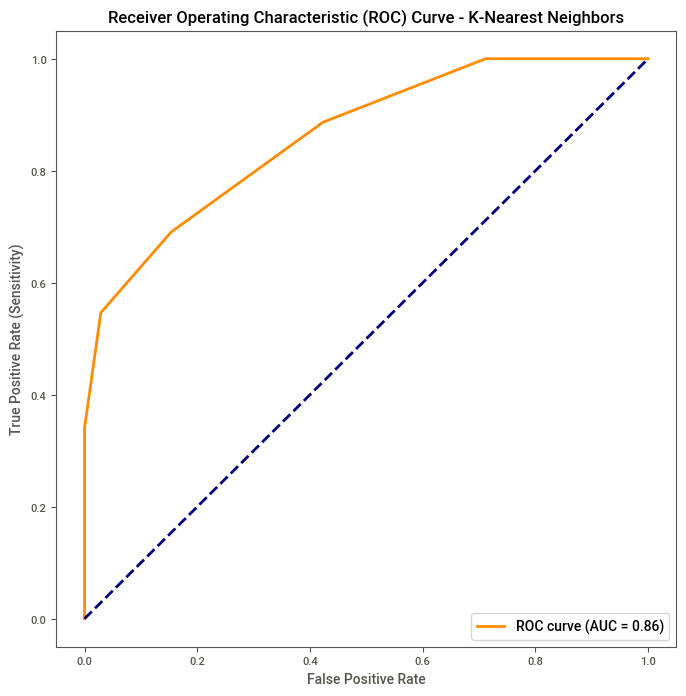

In [45]:
from sklearn.neighbors import KNeighborsClassifier
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_smote, y_train_smote)

y_pred_knn = knn_classifier.predict(X_test)

cla_rep_knn = classification_report(y_test, y_pred_knn)
acc_sco_knn = accuracy_score(y_test, y_pred_knn)
f1_sco_knn = f1_score(y_test, y_pred_knn)
pre_sco_knn = precision_score(y_test, y_pred_knn)
rec_sco_knn = recall_score(y_test, y_pred_knn)

print("Classification Report (K-Nearest Neighbors):")
print(cla_rep_knn)
print("Accuracy   :", acc_sco_knn)
print("Precision  :", pre_sco_knn)
print("Recall     :", rec_sco_knn)
print("F1-score   :", f1_sco_knn)

k = 20
kf = StratifiedKFold(n_splits=k)


cv_accuracy_knn = []
cv_precision_knn = []
cv_recall_knn = []
cv_f1_knn = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]


    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    knn_classifier_fold = KNeighborsClassifier()
    knn_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)

    y_pred_fold = knn_classifier_fold.predict(X_test_fold)

    cv_accuracy_knn.append(accuracy_score(y_test_fold, y_pred_fold))
    cv_precision_knn.append(precision_score(y_test_fold, y_pred_fold))
    cv_recall_knn.append(recall_score(y_test_fold, y_pred_fold))
    cv_f1_knn.append(f1_score(y_test_fold, y_pred_fold))

knn_mean_accuracy = np.mean(cv_accuracy_knn)
knn_mean_precision = np.mean(cv_precision_knn)
knn_mean_recall = np.mean(cv_recall_knn)
knn_mean_f1 = np.mean(cv_f1_knn)

print("\nK-fold Cross-validation Results (K-Nearest Neighbors with SMOTE):")
print("Mean Accuracy   :", knn_mean_accuracy)
print("Mean Precision  :", knn_mean_precision)
print("Mean Recall     :", knn_mean_recall)
print("Mean F1-score   :", knn_mean_f1)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
TN_knn, FP_knn, FN_knn, TP_knn = conf_matrix_knn.ravel()

sensitivity_knn = TP_knn / (TP_knn + FN_knn)
specificity_knn = TN_knn / (TN_knn + FP_knn)
npv_knn = TN_knn / (TN_knn + FN_knn)
fpr_knn = FP_knn / (FP_knn + TN_knn)
fdr_knn = FP_knn / (FP_knn + TP_knn)
for_knn = FN_knn / (FN_knn + TN_knn)


print(conf_matrix_knn)
print("\nAdditional Metrics for K-Nearest Neighbors:")
print(f"Sensitivity (True Positive Rate): {sensitivity_knn:.4f}")
print(f"Specificity (True Negative Rate): {specificity_knn:.4f}")
print(f"Negative Predicted Value: {npv_knn:.4f}")
print(f"False Positive Rate: {fpr_knn:.4f}")
print(f"False Discovery Rate: {fdr_knn:.4f}")
print(f"False Omission Rate: {for_knn:.4f}")

y_prob_knn = knn_classifier.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - K-Nearest Neighbors')
plt.legend(loc="lower right")
plt.show()



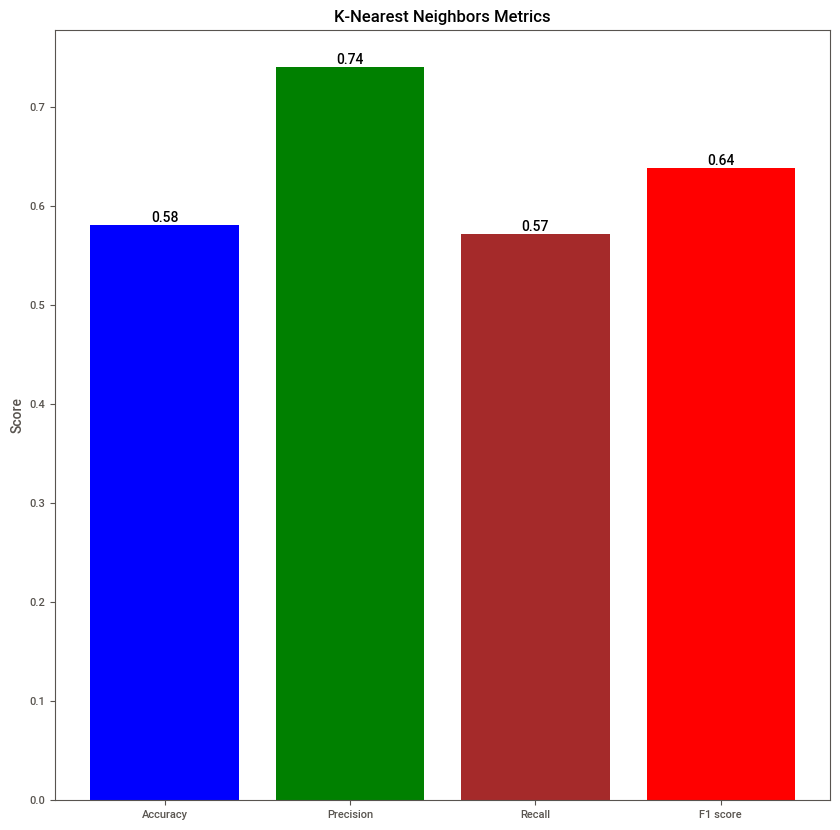

In [46]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = 'K-Nearest Neighbors'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [knn_mean_accuracy, knn_mean_precision,  knn_mean_recall, knn_mean_f1]
plot_metrics(model_name, metrics, values)


Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       0.60      0.92      0.73       104
           1       0.81      0.35      0.49        97

    accuracy                           0.65       201
   macro avg       0.71      0.64      0.61       201
weighted avg       0.70      0.65      0.61       201

Accuracy   : 0.6467661691542289
Precision  : 0.8095238095238095
Recall     : 0.35051546391752575
F1-score   : 0.4892086330935252

K-fold Cross-validation Results (Naive Bayes with SMOTE):
Mean Accuracy   : 0.5711666666666667
Mean Precision  : 0.8954599567099567
Mean Recall     : 0.4235294117647059
Mean F1-score   : 0.5546606554511625
[[96  8]
 [63 34]]

Additional Metrics for Naive Bayes:
Sensitivity (True Positive Rate): 0.3505
Specificity (True Negative Rate): 0.9231
Negative Predicted Value: 0.6038
False Positive Rate: 0.0769
False Discovery Rate: 0.1905
False Omission Rate: 0.3962


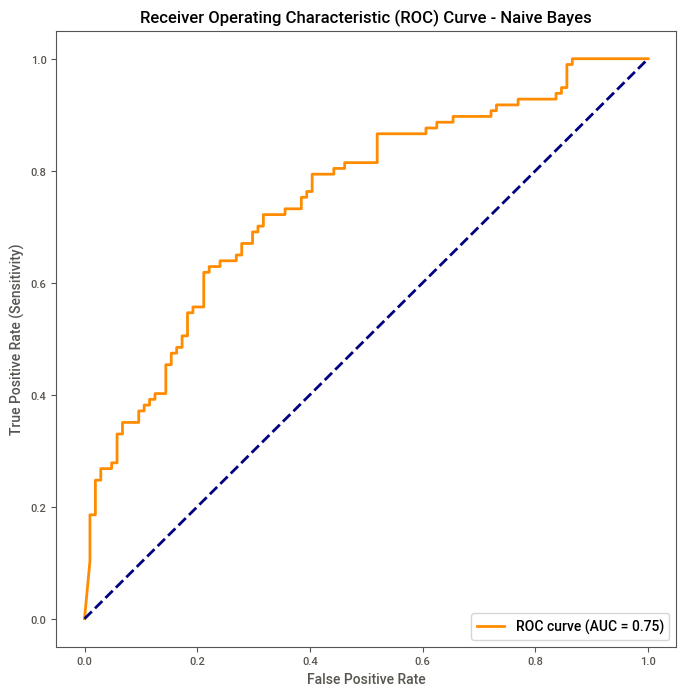

In [47]:
from sklearn.naive_bayes import GaussianNB
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)
nb_classifier = GaussianNB()

nb_classifier.fit(X_train_smote, y_train_smote)

y_pred_nb = nb_classifier.predict(X_test)

cla_rep_nb = classification_report(y_test, y_pred_nb)
acc_sco_nb = accuracy_score(y_test, y_pred_nb)
f1_sco_nb = f1_score(y_test, y_pred_nb)
pre_sco_nb = precision_score(y_test, y_pred_nb)
rec_sco_nb = recall_score(y_test, y_pred_nb)

print("Classification Report (Naive Bayes):")
print(cla_rep_nb)
print("Accuracy   :", acc_sco_nb)
print("Precision  :", pre_sco_nb)
print("Recall     :", rec_sco_nb)
print("F1-score   :", f1_sco_nb)

k = 20
kf = StratifiedKFold(n_splits=k)
cv_accuracy_nb = []
cv_precision_nb = []
cv_recall_nb = []
cv_f1_nb = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    nb_classifier_fold = GaussianNB()
    nb_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)

    y_pred_fold = nb_classifier_fold.predict(X_test_fold)

    cv_accuracy_nb.append(accuracy_score(y_test_fold, y_pred_fold))
    cv_precision_nb.append(precision_score(y_test_fold, y_pred_fold))
    cv_recall_nb.append(recall_score(y_test_fold, y_pred_fold))
    cv_f1_nb.append(f1_score(y_test_fold, y_pred_fold))
    
nb_mean_accuracy = np.mean(cv_accuracy_nb)
nb_mean_precision = np.mean(cv_precision_nb)
nb_mean_recall = np.mean(cv_recall_nb)
nb_mean_f1 = np.mean(cv_f1_nb)

print("\nK-fold Cross-validation Results (Naive Bayes with SMOTE):")
print("Mean Accuracy   :", nb_mean_accuracy)
print("Mean Precision  :", nb_mean_precision)
print("Mean Recall     :", nb_mean_recall)
print("Mean F1-score   :", nb_mean_f1)

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
TN_nb, FP_nb, FN_nb, TP_nb = conf_matrix_nb.ravel()

sensitivity_nb = TP_nb / (TP_nb + FN_nb)
specificity_nb = TN_nb / (TN_nb + FP_nb)
npv_nb = TN_nb / (TN_nb + FN_nb)
fpr_nb = FP_nb / (FP_nb + TN_nb)
fdr_nb = FP_nb / (FP_nb + TP_nb)
for_nb = FN_nb / (FN_nb + TN_nb)


print(conf_matrix_nb )
print("\nAdditional Metrics for Naive Bayes:")
print(f"Sensitivity (True Positive Rate): {sensitivity_nb:.4f}")
print(f"Specificity (True Negative Rate): {specificity_nb:.4f}")
print(f"Negative Predicted Value: {npv_nb:.4f}")
print(f"False Positive Rate: {fpr_nb:.4f}")
print(f"False Discovery Rate: {fdr_nb:.4f}")
print(f"False Omission Rate: {for_nb:.4f}")

y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


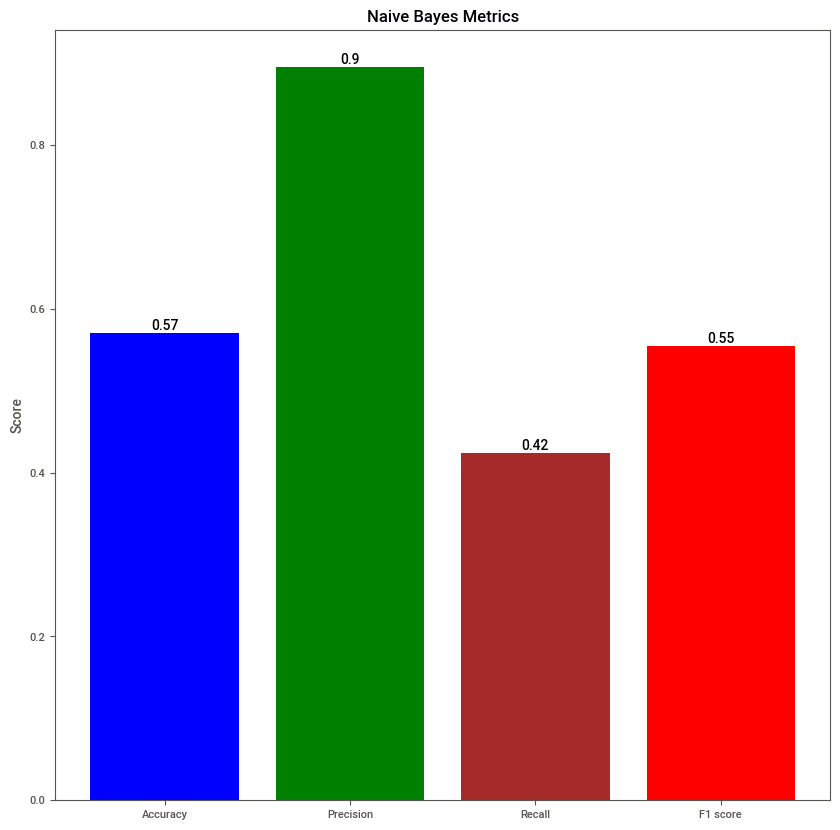

In [48]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
    
model_name = 'Naive Bayes'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [nb_mean_accuracy, nb_mean_precision,  nb_mean_recall, nb_mean_f1]

plot_metrics(model_name, metrics, values)


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       104
           1       0.92      1.00      0.96        97

    accuracy                           0.96       201
   macro avg       0.96      0.96      0.96       201
weighted avg       0.96      0.96      0.96       201

Accuracy   : 0.9552238805970149
Precision  : 0.9150943396226415
Recall     : 1.0
F1-score   : 0.9556650246305419

K-fold Cross-validation Results (Decision Tree with SMOTE):
Mean Accuracy   : 0.6088282828282828
Mean Precision  : 0.7267651703135574
Mean Recall     : 0.6707824513794662
Mean F1-score   : 0.6963329540116925

Confusion Matrix:
[[95  9]
 [ 0 97]]

Additional Metrics for Decision Tree:
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 0.9135
Negative Predicted Value: 1.0000
False Positive Rate: 0.0865
False Discovery Rate: 0.0849
False Omission Rate: 0.0000


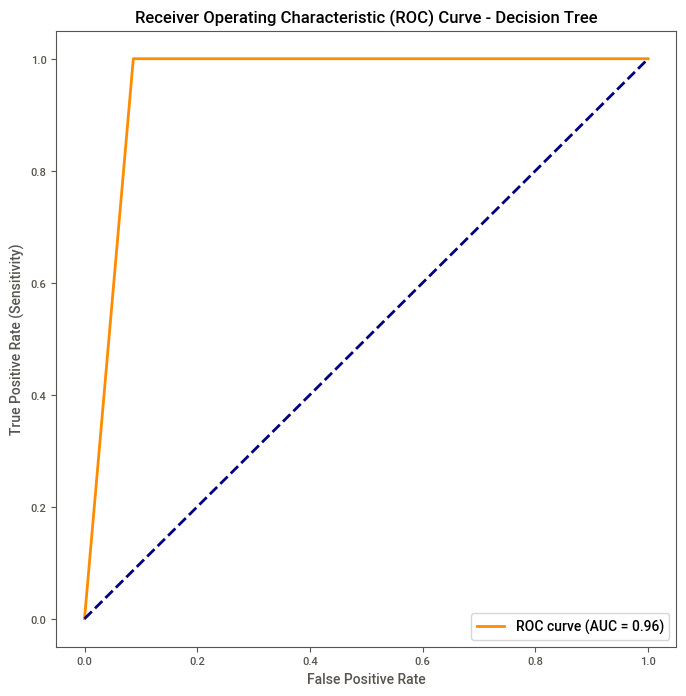

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Assuming X and y are defined
# Replace 'your_dataset.csv' with the actual file path or URL of your dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_classifier.predict(X_test)

# Metrics for Decision Tree
cla_rep_dt = classification_report(y_test, y_pred_dt)
acc_sco_dt = accuracy_score(y_test, y_pred_dt)
f1_sco_dt = f1_score(y_test, y_pred_dt)
pre_sco_dt = precision_score(y_test, y_pred_dt)
rec_sco_dt = recall_score(y_test, y_pred_dt)

print("Classification Report (Decision Tree):")
print(cla_rep_dt)
print("Accuracy   :", acc_sco_dt)
print("Precision  :", pre_sco_dt)
print("Recall     :", rec_sco_dt)
print("F1-score   :", f1_sco_dt)

# K-fold Cross-validation
k = 5
kf = StratifiedKFold(n_splits=k)
cv_accuracy_dt = []
cv_precision_dt = []
cv_recall_dt = []
cv_f1_dt = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)
    dt_classifier_fold = DecisionTreeClassifier(random_state=42)
    dt_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)
    y_pred_fold = dt_classifier_fold.predict(X_test_fold)

    cv_accuracy_dt.append(accuracy_score(y_test_fold, y_pred_fold))
    cv_precision_dt.append(precision_score(y_test_fold, y_pred_fold))
    cv_recall_dt.append(recall_score(y_test_fold, y_pred_fold))
    cv_f1_dt.append(f1_score(y_test_fold, y_pred_fold))

dt_mean_accuracy = np.mean(cv_accuracy_dt)
dt_mean_precision = np.mean(cv_precision_dt)
dt_mean_recall = np.mean(cv_recall_dt)
dt_mean_f1 = np.mean(cv_f1_dt)

print("\nK-fold Cross-validation Results (Decision Tree with SMOTE):")
print("Mean Accuracy   :", dt_mean_accuracy)
print("Mean Precision  :", dt_mean_precision)
print("Mean Recall     :", dt_mean_recall)
print("Mean F1-score   :", dt_mean_f1)

# Confusion Matrix and Additional Metrics for Decision Tree
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
TN_dt, FP_dt, FN_dt, TP_dt = conf_matrix_dt.ravel()

sensitivity_dt = TP_dt / (TP_dt + FN_dt)
specificity_dt = TN_dt / (TN_dt + FP_dt)
npv_dt = TN_dt / (TN_dt + FN_dt)
fpr_dt = FP_dt / (FP_dt + TN_dt)
fdr_dt = FP_dt / (FP_dt + TP_dt)
for_dt = FN_dt / (FN_dt + TN_dt)

print("\nConfusion Matrix:")
print(conf_matrix_dt)

print("\nAdditional Metrics for Decision Tree:")
print(f"Sensitivity (True Positive Rate): {sensitivity_dt:.4f}")
print(f"Specificity (True Negative Rate): {specificity_dt:.4f}")
print(f"Negative Predicted Value: {npv_dt:.4f}")
print(f"False Positive Rate: {fpr_dt:.4f}")
print(f"False Discovery Rate: {fdr_dt:.4f}")
print(f"False Omission Rate: {for_dt:.4f}")

# ROC Curve for Decision Tree
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


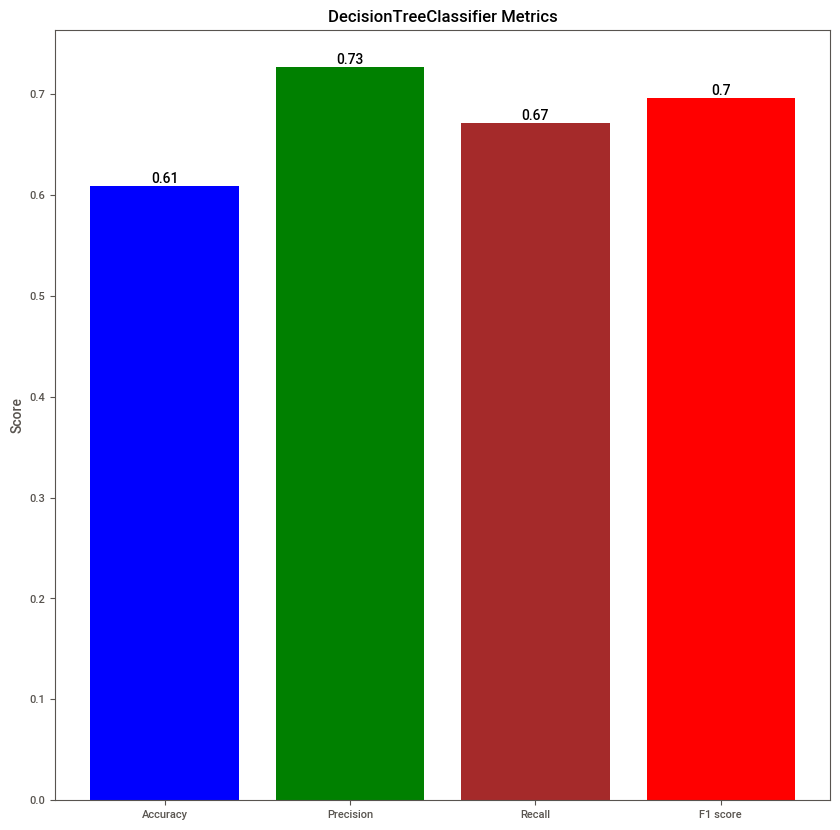

In [50]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()

model_name = 'DecisionTreeClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [dt_mean_accuracy, dt_mean_precision,  dt_mean_recall, dt_mean_f1]

plot_metrics(model_name, metrics, values)


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       0.97      1.00      0.98        97

    accuracy                           0.99       201
   macro avg       0.98      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201

Accuracy   : 0.9850746268656716
Precision  : 0.97
Recall     : 1.0
F1-score   : 0.9847715736040609

K-fold Cross-validation Results (Random Forest with SMOTE):
Mean Accuracy   : 0.6411111111111112
Mean Precision  : 0.7487142857142857
Mean Recall     : 0.7114285714285715
Mean F1-score   : 0.7213233433233434
[[101   3]
 [  0  97]]

Additional Metrics for Random Forest:
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 0.9712
Negative Predicted Value: 1.0000
False Positive Rate: 0.0288
False Discovery Rate: 0.0300
False Omission Rate: 0.0000


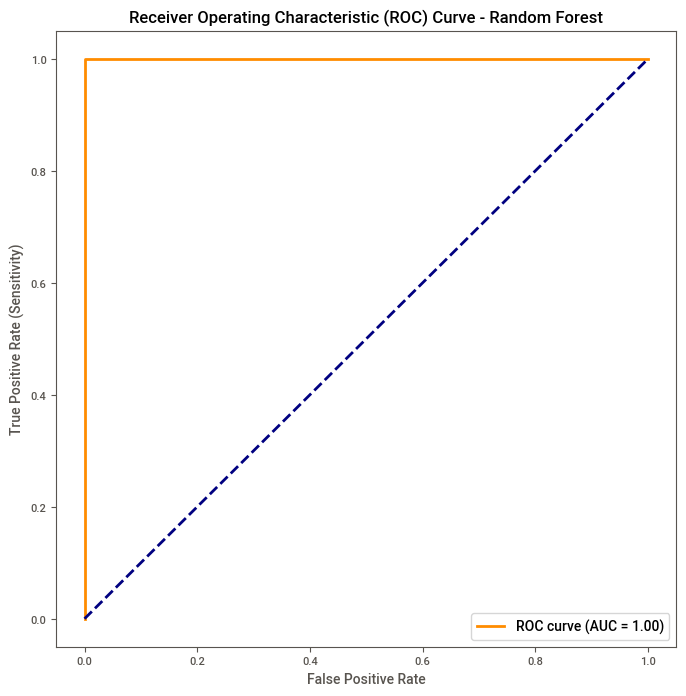

In [51]:
from sklearn.ensemble import RandomForestClassifier
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_classifier.predict(X_test)

cla_rep_rf = classification_report(y_test, y_pred_rf)
acc_sco_rf = accuracy_score(y_test, y_pred_rf)
f1_sco_rf = f1_score(y_test, y_pred_rf)
pre_sco_rf = precision_score(y_test, y_pred_rf)
rec_sco_rf = recall_score(y_test, y_pred_rf)

print("Classification Report (Random Forest):")
print(cla_rep_rf)
print("Accuracy   :", acc_sco_rf)
print("Precision  :", pre_sco_rf)
print("Recall     :", rec_sco_rf)
print("F1-score   :", f1_sco_rf)

k = 50
kf = StratifiedKFold(n_splits=k)
cv_accuracy_rf = []
cv_precision_rf = []
cv_recall_rf = []
cv_f1_rf = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)
    rf_classifier_fold = RandomForestClassifier(random_state=42)
    rf_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)
    y_pred_fold = rf_classifier_fold.predict(X_test_fold)

    cv_accuracy_rf.append(accuracy_score(y_test_fold, y_pred_fold))
    cv_precision_rf.append(precision_score(y_test_fold, y_pred_fold))
    cv_recall_rf.append(recall_score(y_test_fold, y_pred_fold))
    cv_f1_rf.append(f1_score(y_test_fold, y_pred_fold))
    
rf_mean_accuracy = np.mean(cv_accuracy_rf)
rf_mean_precision = np.mean(cv_precision_rf)
rf_mean_recall = np.mean(cv_recall_rf)
rf_mean_f1 = np.mean(cv_f1_rf)

print("\nK-fold Cross-validation Results (Random Forest with SMOTE):")
print("Mean Accuracy   :", rf_mean_accuracy)
print("Mean Precision  :", rf_mean_precision)
print("Mean Recall     :", rf_mean_recall)
print("Mean F1-score   :", rf_mean_f1)


conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
TN_rf, FP_rf, FN_rf, TP_rf = conf_matrix_rf.ravel()

sensitivity_rf = TP_rf / (TP_rf + FN_rf)
specificity_rf = TN_rf / (TN_rf + FP_rf)
npv_rf = TN_rf / (TN_rf + FN_rf)
fpr_rf = FP_rf / (FP_rf + TN_rf)
fdr_rf = FP_rf / (FP_rf + TP_rf)
for_rf = FN_rf / (FN_rf + TN_rf)


print(conf_matrix_rf)
print("\nAdditional Metrics for Random Forest:")
print(f"Sensitivity (True Positive Rate): {sensitivity_rf:.4f}")
print(f"Specificity (True Negative Rate): {specificity_rf:.4f}")
print(f"Negative Predicted Value: {npv_rf:.4f}")
print(f"False Positive Rate: {fpr_rf:.4f}")
print(f"False Discovery Rate: {fdr_rf:.4f}")
print(f"False Omission Rate: {for_rf:.4f}")

y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


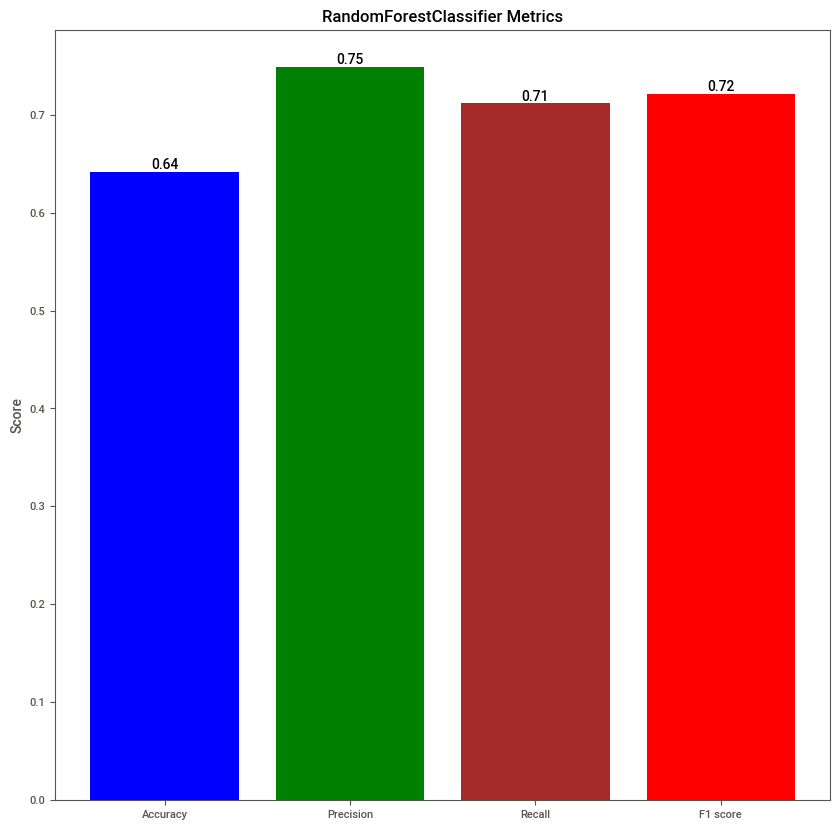

In [52]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = 'RandomForestClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [rf_mean_accuracy, rf_mean_precision,  rf_mean_recall, rf_mean_f1]
plot_metrics(model_name, metrics, values)


Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       104
           1       0.85      0.74      0.79        97

    accuracy                           0.81       201
   macro avg       0.82      0.81      0.81       201
weighted avg       0.81      0.81      0.81       201

Accuracy   : 0.8109452736318408
Precision  : 0.8470588235294118
Recall     : 0.7422680412371134
F1-score   : 0.7912087912087912

K-fold Cross-validation Results (AdaBoost with SMOTE):
Mean Accuracy   : 0.6391666666666668
Mean Precision  : 0.7875193998897559
Mean Recall     : 0.65
Mean F1-score   : 0.7055937744200274
[[91 13]
 [25 72]]

Additional Metrics for AdaBoost:
Sensitivity (True Positive Rate): 0.7423
Specificity (True Negative Rate): 0.8750
Negative Predicted Value: 0.7845
False Positive Rate: 0.1250
False Discovery Rate: 0.1529
False Omission Rate: 0.2155


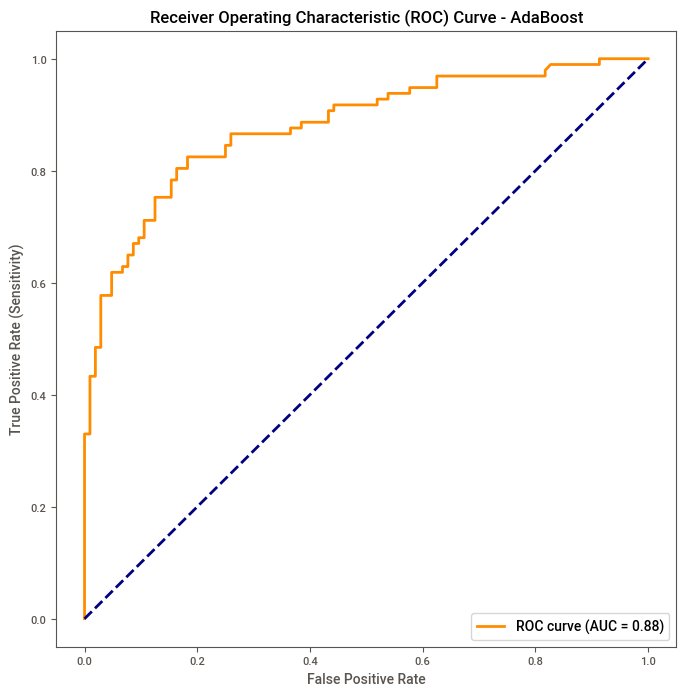

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train_smote, y_train_smote)

y_pred_adaboost = adaboost_classifier.predict(X_test)

cla_rep_adaboost = classification_report(y_test, y_pred_adaboost)
acc_sco_adaboost = accuracy_score(y_test, y_pred_adaboost)
f1_sco_adaboost = f1_score(y_test, y_pred_adaboost)
pre_sco_adaboost = precision_score(y_test, y_pred_adaboost)
rec_sco_adaboost = recall_score(y_test, y_pred_adaboost)

print("Classification Report (AdaBoost):")
print(cla_rep_adaboost)
print("Accuracy   :", acc_sco_adaboost)
print("Precision  :", pre_sco_adaboost)
print("Recall     :", rec_sco_adaboost)
print("F1-score   :", f1_sco_adaboost)

k = 20
kf = StratifiedKFold(n_splits=k)
cv_accuracy_adaboost = []
cv_precision_adaboost = []
cv_recall_adaboost = []
cv_f1_adaboost = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)
    adaboost_classifier_fold = AdaBoostClassifier(random_state=42)
    adaboost_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)
    y_pred_fold_adaboost = adaboost_classifier_fold.predict(X_test_fold)

    cv_accuracy_adaboost.append(accuracy_score(y_test_fold, y_pred_fold_adaboost))
    cv_precision_adaboost.append(precision_score(y_test_fold, y_pred_fold_adaboost))
    cv_recall_adaboost.append(recall_score(y_test_fold, y_pred_fold_adaboost))
    cv_f1_adaboost.append(f1_score(y_test_fold, y_pred_fold_adaboost))

ada_mean_accuracy = np.mean(cv_accuracy_adaboost)
ada_mean_precision = np.mean(cv_precision_adaboost)
ada_mean_recall = np.mean(cv_recall_adaboost)
ada_mean_f1 = np.mean(cv_f1_adaboost)

print("\nK-fold Cross-validation Results (AdaBoost with SMOTE):")
print("Mean Accuracy   :", ada_mean_accuracy)
print("Mean Precision  :", ada_mean_precision)
print("Mean Recall     :", ada_mean_recall)
print("Mean F1-score   :", ada_mean_f1)

conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
TN_adaboost, FP_adaboost, FN_adaboost, TP_adaboost = conf_matrix_adaboost.ravel()

sensitivity_adaboost = TP_adaboost / (TP_adaboost + FN_adaboost)
specificity_adaboost = TN_adaboost / (TN_adaboost + FP_adaboost)
npv_adaboost = TN_adaboost / (TN_adaboost + FN_adaboost)
fpr_adaboost = FP_adaboost / (FP_adaboost + TN_adaboost)
fdr_adaboost = FP_adaboost / (FP_adaboost + TP_adaboost)
for_adaboost = FN_adaboost / (FN_adaboost + TN_adaboost)


print(conf_matrix_adaboost)
print("\nAdditional Metrics for AdaBoost:")
print(f"Sensitivity (True Positive Rate): {sensitivity_adaboost:.4f}")
print(f"Specificity (True Negative Rate): {specificity_adaboost:.4f}")
print(f"Negative Predicted Value: {npv_adaboost:.4f}")
print(f"False Positive Rate: {fpr_adaboost:.4f}")
print(f"False Discovery Rate: {fdr_adaboost:.4f}")
print(f"False Omission Rate: {for_adaboost:.4f}")

y_prob_adaboost = adaboost_classifier.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_prob_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

plt.figure(figsize=(8, 8))
plt.plot(fpr_adaboost, tpr_adaboost, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_adaboost))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - AdaBoost')
plt.legend(loc="lower right")
plt.show()


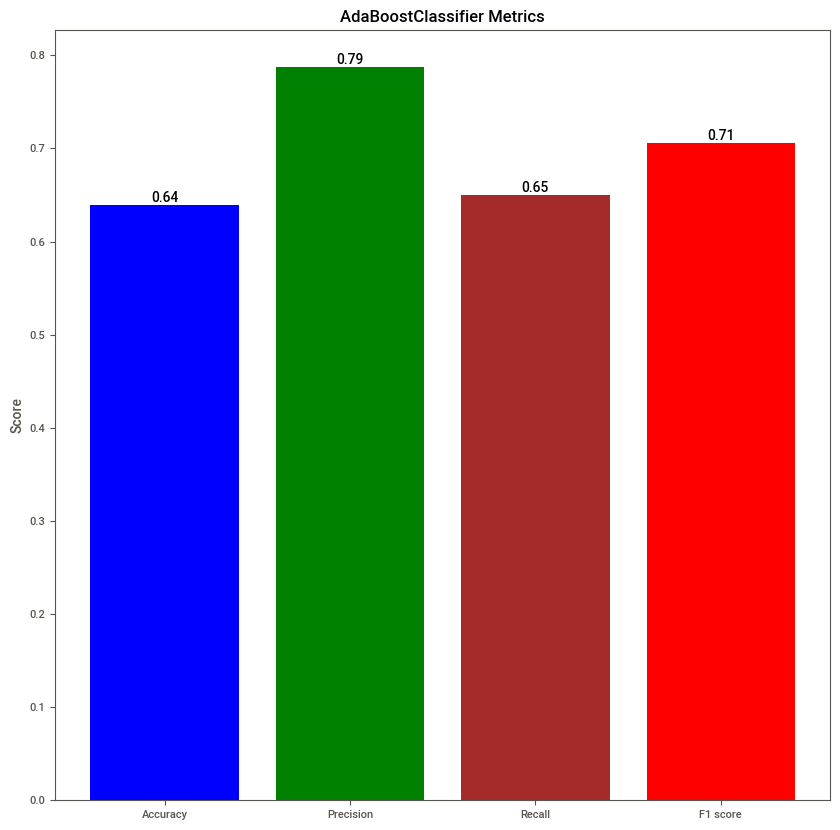

In [54]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()

model_name = 'AdaBoostClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [ada_mean_accuracy, ada_mean_precision,  ada_mean_recall, ada_mean_f1]

plot_metrics(model_name, metrics, values)


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       104
           1       0.90      0.86      0.88        97

    accuracy                           0.89       201
   macro avg       0.89      0.88      0.89       201
weighted avg       0.89      0.89      0.89       201

Accuracy   : 0.8855721393034826
Precision  : 0.9021739130434783
Recall     : 0.8556701030927835
F1-score   : 0.8783068783068783

K-fold Cross-validation Results (Gradient Boosting with SMOTE):
Mean Accuracy   : 0.6331666666666667
Mean Precision  : 0.7635281099619335
Mean Recall     : 0.6748161764705882
Mean F1-score   : 0.7083803296854972
[[95  9]
 [14 83]]

Additional Metrics for Gradient Boosting:
Sensitivity (True Positive Rate): 0.8557
Specificity (True Negative Rate): 0.9135
Negative Predicted Value: 0.8716
False Positive Rate: 0.0865
False Discovery Rate: 0.0978
False Omission Rate: 0.1284


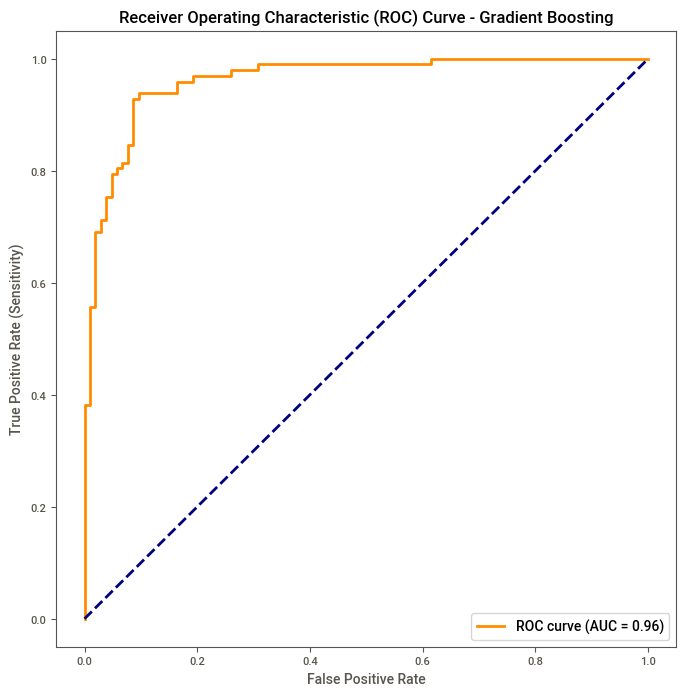

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)
gradient_boosting_classifier.fit(X_train_smote, y_train_smote)

y_pred_gradient_boosting = gradient_boosting_classifier.predict(X_test)

cla_rep_gradient_boosting = classification_report(y_test, y_pred_gradient_boosting)
acc_sco_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)
f1_sco_gradient_boosting = f1_score(y_test, y_pred_gradient_boosting)
pre_sco_gradient_boosting = precision_score(y_test, y_pred_gradient_boosting)
rec_sco_gradient_boosting = recall_score(y_test, y_pred_gradient_boosting)

print("Classification Report (Gradient Boosting):")
print(cla_rep_gradient_boosting)
print("Accuracy   :", acc_sco_gradient_boosting)
print("Precision  :", pre_sco_gradient_boosting)
print("Recall     :", rec_sco_gradient_boosting)
print("F1-score   :", f1_sco_gradient_boosting)

k = 20
kf = StratifiedKFold(n_splits=k)
cv_accuracy_gradient_boosting = []
cv_precision_gradient_boosting = []
cv_recall_gradient_boosting = []
cv_f1_gradient_boosting = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    gradient_boosting_classifier_fold = GradientBoostingClassifier(random_state=42)
    gradient_boosting_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)
    y_pred_fold_gradient_boosting = gradient_boosting_classifier_fold.predict(X_test_fold)

    cv_accuracy_gradient_boosting.append(accuracy_score(y_test_fold, y_pred_fold_gradient_boosting))
    cv_precision_gradient_boosting.append(precision_score(y_test_fold, y_pred_fold_gradient_boosting))
    cv_recall_gradient_boosting.append(recall_score(y_test_fold, y_pred_fold_gradient_boosting))
    cv_f1_gradient_boosting.append(f1_score(y_test_fold, y_pred_fold_gradient_boosting))
    
gb_mean_accuracy = np.mean(cv_accuracy_gradient_boosting)
gb_mean_precision = np.mean(cv_precision_gradient_boosting)
gb_mean_recall = np.mean(cv_recall_gradient_boosting)
gb_mean_f1 = np.mean(cv_f1_gradient_boosting)

print("\nK-fold Cross-validation Results (Gradient Boosting with SMOTE):")
print("Mean Accuracy   :", gb_mean_accuracy)
print("Mean Precision  :", gb_mean_precision)
print("Mean Recall     :", gb_mean_recall)
print("Mean F1-score   :", gb_mean_f1)

conf_matrix_gradient_boosting = confusion_matrix(y_test, y_pred_gradient_boosting)
TN_gradient_boosting, FP_gradient_boosting, FN_gradient_boosting, TP_gradient_boosting = conf_matrix_gradient_boosting.ravel()

sensitivity_gradient_boosting = TP_gradient_boosting / (TP_gradient_boosting + FN_gradient_boosting)
specificity_gradient_boosting = TN_gradient_boosting / (TN_gradient_boosting + FP_gradient_boosting)
npv_gradient_boosting = TN_gradient_boosting / (TN_gradient_boosting + FN_gradient_boosting)
fpr_gradient_boosting = FP_gradient_boosting / (FP_gradient_boosting + TN_gradient_boosting)
fdr_gradient_boosting = FP_gradient_boosting / (FP_gradient_boosting + TP_gradient_boosting)
for_gradient_boosting = FN_gradient_boosting / (FN_gradient_boosting + TN_gradient_boosting)


print(conf_matrix_gradient_boosting)
print("\nAdditional Metrics for Gradient Boosting:")
print(f"Sensitivity (True Positive Rate): {sensitivity_gradient_boosting:.4f}")
print(f"Specificity (True Negative Rate): {specificity_gradient_boosting:.4f}")
print(f"Negative Predicted Value: {npv_gradient_boosting:.4f}")
print(f"False Positive Rate: {fpr_gradient_boosting:.4f}")
print(f"False Discovery Rate: {fdr_gradient_boosting:.4f}")
print(f"False Omission Rate: {for_gradient_boosting:.4f}")

y_prob_gradient_boosting = gradient_boosting_classifier.predict_proba(X_test)[:, 1]
fpr_gradient_boosting, tpr_gradient_boosting, thresholds_gradient_boosting = roc_curve(y_test, y_prob_gradient_boosting)
roc_auc_gradient_boosting = auc(fpr_gradient_boosting, tpr_gradient_boosting)

plt.figure(figsize=(8, 8))
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_gradient_boosting))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()


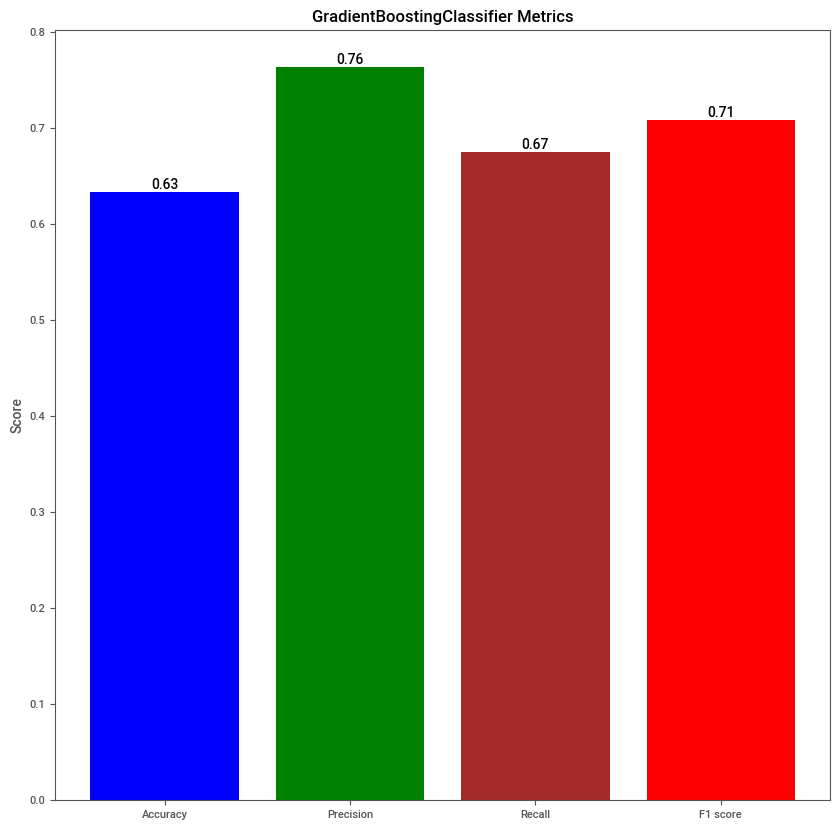

In [56]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = 'GradientBoostingClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [gb_mean_accuracy, gb_mean_precision,  gb_mean_recall, gb_mean_f1]

plot_metrics(model_name, metrics, values)


[LightGBM] [Info] Number of positive: 334, number of negative: 334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

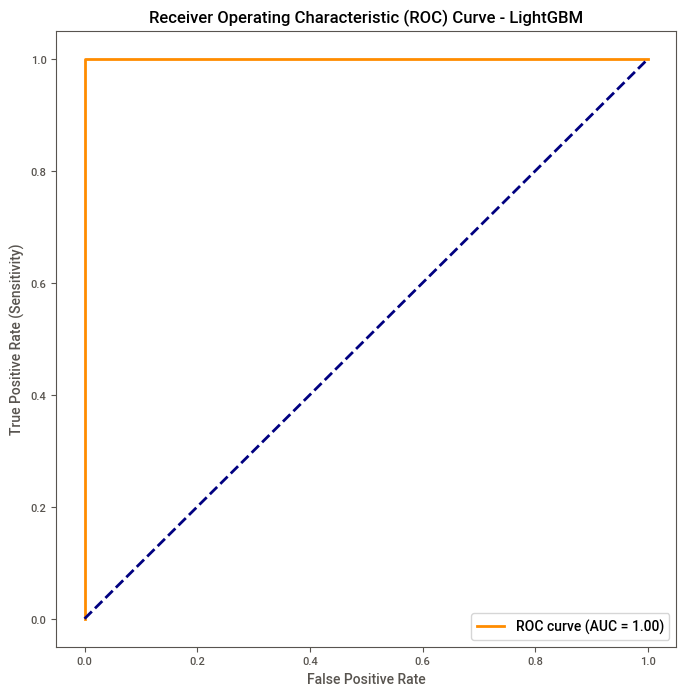

In [57]:
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Create a LightGBM classifier
lgbm_classifier = LGBMClassifier(random_state=42)

# Fit the model on the resampled training data
lgbm_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Evaluate the model on the test set
cla_rep_lgbm = classification_report(y_test, y_pred_lgbm)
acc_sco_lgbm = accuracy_score(y_test, y_pred_lgbm)
f1_sco_lgbm = f1_score(y_test, y_pred_lgbm)
pre_sco_lgbm = precision_score(y_test, y_pred_lgbm)
rec_sco_lgbm = recall_score(y_test, y_pred_lgbm)

print("Classification Report (LightGBM):")
print(cla_rep_lgbm)
print("Accuracy   :", acc_sco_lgbm)
print("Precision  :", pre_sco_lgbm)
print("Recall     :", rec_sco_lgbm)
print("F1-score   :", f1_sco_lgbm)

# k-fold cross-validation
k = 20
kf = StratifiedKFold(n_splits=k)

# Lists to store results for each fold
cv_accuracy_lgbm = []
cv_precision_lgbm = []
cv_recall_lgbm = []
cv_f1_lgbm = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to handle class imbalance only on the training set
    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Create and fit the LightGBM classifier
    lgbm_classifier_fold = LGBMClassifier(random_state=42)
    lgbm_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)

    # Make predictions on the test set
    y_pred_fold_lgbm = lgbm_classifier_fold.predict(X_test_fold)

    # Evaluate the model and store results
    cv_accuracy_lgbm.append(accuracy_score(y_test_fold, y_pred_fold_lgbm))
    cv_precision_lgbm.append(precision_score(y_test_fold, y_pred_fold_lgbm))
    cv_recall_lgbm.append(recall_score(y_test_fold, y_pred_fold_lgbm))
    cv_f1_lgbm.append(f1_score(y_test_fold, y_pred_fold_lgbm))

# Calculate mean results across folds
lgb_mean_accuracy = np.mean(cv_accuracy_lgbm)
lgb_mean_precision = np.mean(cv_precision_lgbm)
lgb_mean_recall = np.mean(cv_recall_lgbm)
lgb_mean_f1 = np.mean(cv_f1_lgbm)

print("\nK-fold Cross-validation Results (LightGBM with SMOTE):")
print("Mean Accuracy   :", lgb_mean_accuracy)
print("Mean Precision  :", lgb_mean_precision)
print("Mean Recall     :", lgb_mean_recall)
print("Mean F1-score   :", lgb_mean_f1)

# Confusion Matrix
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
TN_lgbm, FP_lgbm, FN_lgbm, TP_lgbm = conf_matrix_lgbm.ravel()

# Sensitivity, Specificity, Negative Predicted Rate, False Positive Rate, False Discovery Rate, False Omission Rate
sensitivity_lgbm = TP_lgbm / (TP_lgbm + FN_lgbm)
specificity_lgbm = TN_lgbm / (TN_lgbm + FP_lgbm)
npv_lgbm = TN_lgbm / (TN_lgbm + FN_lgbm)
fpr_lgbm = FP_lgbm / (FP_lgbm + TN_lgbm)
fdr_lgbm = FP_lgbm / (FP_lgbm + TP_lgbm)
for_lgbm = FN_lgbm / (FN_lgbm + TN_lgbm)


print(conf_matrix_lgbm)
print("\nAdditional Metrics for LightGBM:")
print(f"Sensitivity (True Positive Rate): {sensitivity_lgbm:.4f}")
print(f"Specificity (True Negative Rate): {specificity_lgbm:.4f}")
print(f"Negative Predicted Value: {npv_lgbm:.4f}")
print(f"False Positive Rate: {fpr_lgbm:.4f}")
print(f"False Discovery Rate: {fdr_lgbm:.4f}")
print(f"False Omission Rate: {for_lgbm:.4f}")

# ROC Curve and AUC
y_prob_lgbm = lgbm_classifier.predict_proba(X_test)[:, 1]
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_prob_lgbm)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lgbm, tpr_lgbm, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lgbm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - LightGBM')
plt.legend(loc="lower right")
plt.show()


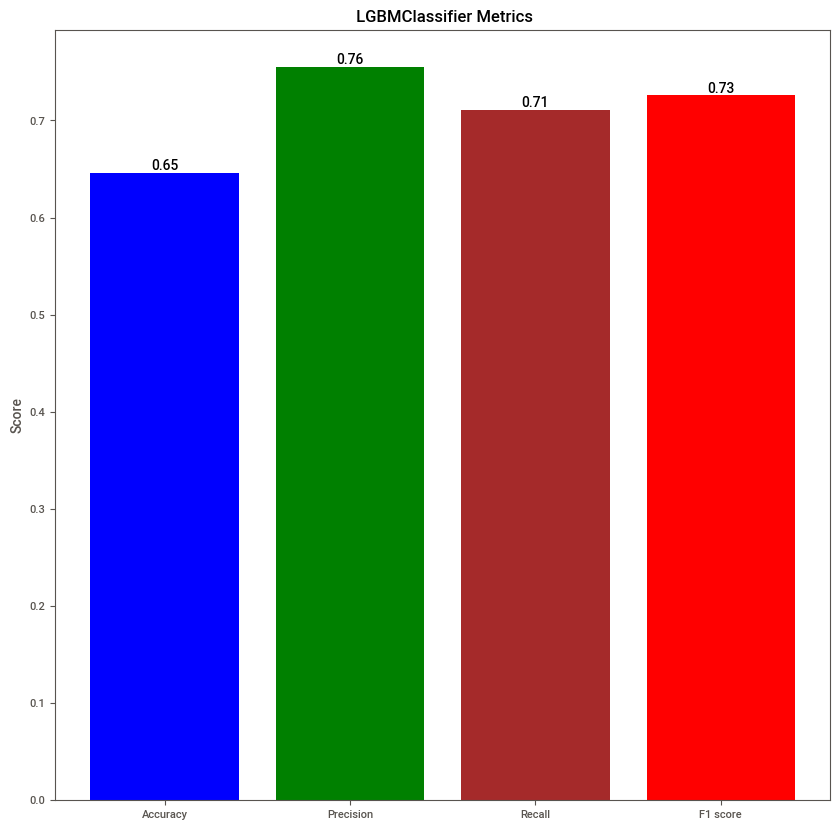

In [58]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = ' LGBMClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [lgb_mean_accuracy, lgb_mean_precision,  lgb_mean_recall, lgb_mean_f1]

plot_metrics(model_name, metrics, values)


[LightGBM] [Info] Number of positive: 237, number of negative: 237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

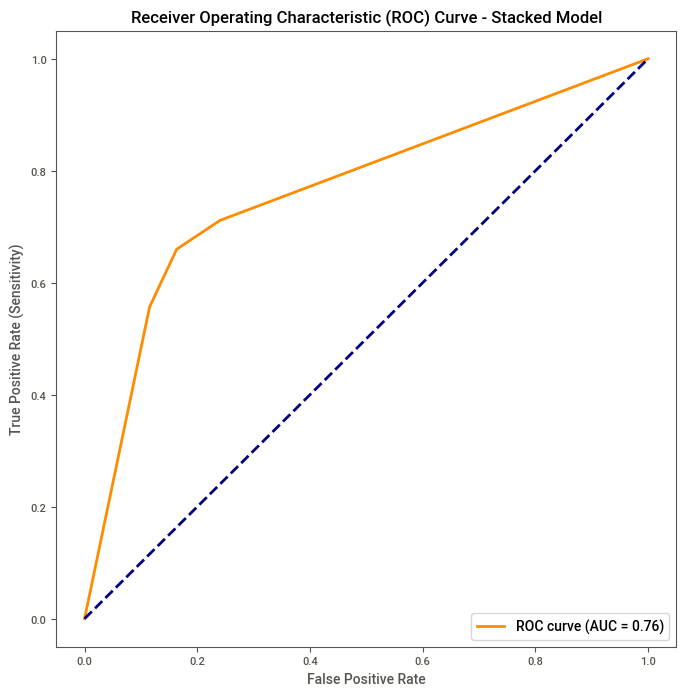

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
base_classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42)),
]


lgb_final_estimator = LGBMClassifier(random_state=42)
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=lgb_final_estimator,
    stack_method='predict',
)

# Fit the model on the resampled training data
stacking_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model on the test set
cla_rep_stacking = classification_report(y_test, y_pred_stacking)
acc_sco_stacking = accuracy_score(y_test, y_pred_stacking)
f1_sco_stacking = f1_score(y_test, y_pred_stacking)
pre_sco_stacking = precision_score(y_test, y_pred_stacking)
rec_sco_stacking = recall_score(y_test, y_pred_stacking)

print("Classification Report (Stacking with LightGBM Final Estimator):")
print(cla_rep_stacking)
print("Accuracy   :", acc_sco_stacking)
print("Precision  :", pre_sco_stacking)
print("Recall     :", rec_sco_stacking)
print("F1-score   :", f1_sco_stacking)

# k-fold cross-validation
k = 15
kf = StratifiedKFold(n_splits=k)

# Lists to store results for each fold
cv_accuracy_stacking = []
cv_precision_stacking = []
cv_recall_stacking = []
cv_f1_stacking = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to handle class imbalance only on the training set
    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Create and fit the stacking classifier
    stacking_classifier_fold = StackingClassifier(
        estimators=base_classifiers,
        final_estimator=LGBMClassifier(random_state=42),
        stack_method='predict',
    )
    stacking_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)

    # Make predictions on the test set
    y_pred_fold = stacking_classifier_fold.predict(X_test_fold)

    # Evaluate the model and store results
    cv_accuracy_stacking.append(accuracy_score(y_test_fold, y_pred_fold))
    cv_precision_stacking.append(precision_score(y_test_fold, y_pred_fold))
    cv_recall_stacking.append(recall_score(y_test_fold, y_pred_fold))
    cv_f1_stacking.append(f1_score(y_test_fold, y_pred_fold))

# Calculate mean results across folds
st_mean_accuracy = np.mean(cv_accuracy_stacking)
st_mean_precision = np.mean(cv_precision_stacking)
st_mean_recall = np.mean(cv_recall_stacking)
st_mean_f1 = np.mean(cv_f1_stacking)

print("\nK-fold Cross-validation Results (Stacking with LightGBM Final Estimator):")
print("Mean Accuracy   :", st_mean_accuracy)
print("Mean Precision  :", st_mean_precision)
print("Mean Recall     :", st_mean_recall)
print("Mean F1-score   :", st_mean_f1)
# Confusion Matrix
conf_matrix_stacked = confusion_matrix(y_test, y_pred_stacking)
TN_stacked, FP_stacked, FN_stacked, TP_stacked = conf_matrix_stacked.ravel()

sensitivity_stacked = TP_stacked / (TP_stacked + FN_stacked)
specificity_stacked = TN_stacked / (TN_stacked + FP_stacked)
npv_stacked = TN_stacked / (TN_stacked + FN_stacked)
fpr_stacked = FP_stacked / (FP_stacked + TN_stacked)
fdr_stacked = FP_stacked / (FP_stacked + TP_stacked)
for_stacked = FN_stacked / (FN_stacked + TN_stacked)


print(conf_matrix_stacked)
print("\nAdditional Metrics for Stacked Model:")
print(f"Sensitivity (True Positive Rate): {sensitivity_stacked:.4f}")
print(f"Specificity (True Negative Rate): {specificity_stacked:.4f}")
print(f"Negative Predicted Value: {npv_stacked:.4f}")
print(f"False Positive Rate: {fpr_stacked:.4f}")
print(f"False Discovery Rate: {fdr_stacked:.4f}")
print(f"False Omission Rate: {for_stacked:.4f}")

# ROC Curve and AUC
y_prob_stacked = stacking_classifier.predict_proba(X_test)[:, 1]
fpr_stacked, tpr_stacked, thresholds_stacked = roc_curve(y_test, y_prob_stacked)
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)

plt.figure(figsize=(8, 8))
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_stacked))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Stacked Model')
plt.legend(loc="lower right")
plt.show()



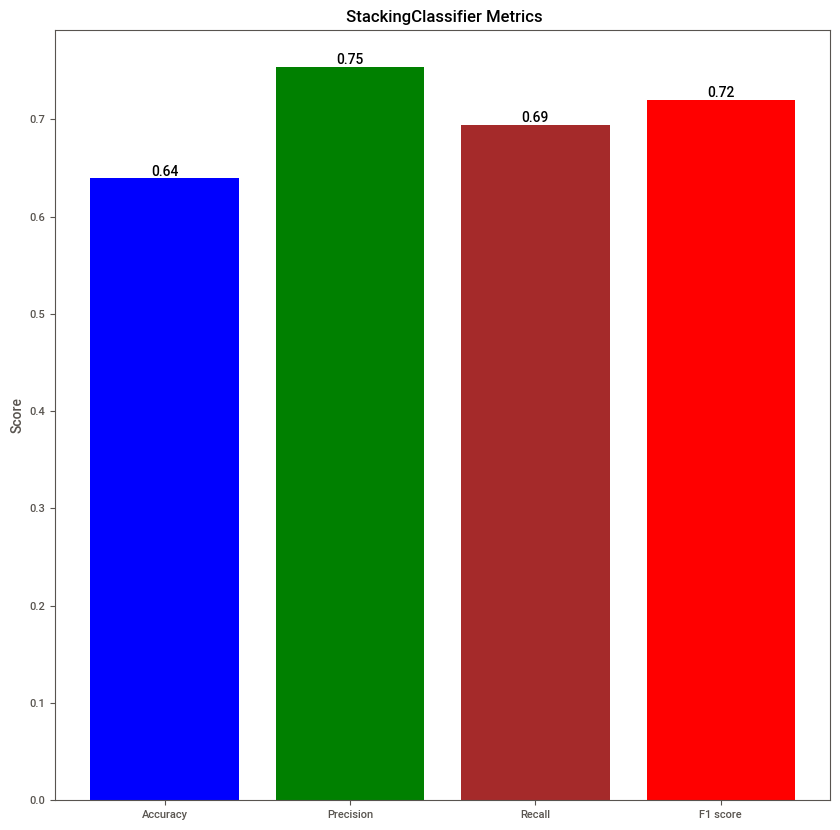

In [60]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = ' StackingClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [st_mean_accuracy, st_mean_precision,  st_mean_recall, st_mean_f1]

plot_metrics(model_name, metrics, values)


Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       0.97      1.00      0.98        97

    accuracy                           0.99       201
   macro avg       0.98      0.99      0.99       201
weighted avg       0.99      0.99      0.99       201

Accuracy   : 0.9850746268656716
Precision  : 0.97
Recall     : 1.0
F1-score   : 0.9847715736040609

K-fold Cross-validation Results (XGBoost with SMOTE):
Mean Accuracy   : 0.6292500000000001
Mean Precision  : 0.7311038531471967
Mean Recall     : 0.7191176470588235
Mean F1-score   : 0.7209664085069764
[[101   3]
 [  0  97]]

Additional Metrics for XGBoost:
Sensitivity (True Positive Rate): 1.0000
Specificity (True Negative Rate): 0.9712
Negative Predicted Value: 1.0000
False Positive Rate: 0.0288
False Discovery Rate: 0.0300
False Omission Rate: 0.0000


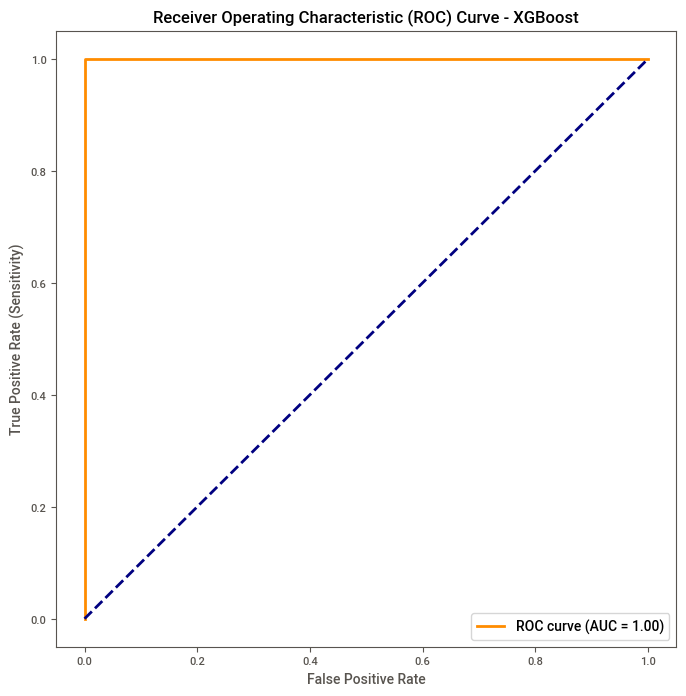

In [61]:
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# Fit the model on the resampled training data
xgb_classifier.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the model on the test set
cla_rep_xgb = classification_report(y_test, y_pred_xgb)
acc_sco_xgb = accuracy_score(y_test, y_pred_xgb)
f1_sco_xgb = f1_score(y_test, y_pred_xgb)
pre_sco_xgb = precision_score(y_test, y_pred_xgb)
rec_sco_xgb = recall_score(y_test, y_pred_xgb)

print("Classification Report (XGBoost):")
print(cla_rep_xgb)
print("Accuracy   :", acc_sco_xgb)
print("Precision  :", pre_sco_xgb)
print("Recall     :", rec_sco_xgb)
print("F1-score   :", f1_sco_xgb)

# k-fold cross-validation
k = 20
kf = StratifiedKFold(n_splits=k)

# Lists to store results for each fold
cv_accuracy_xgb = []
cv_precision_xgb = []
cv_recall_xgb = []
cv_f1_xgb = []

for train_index, test_index in kf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE to handle class imbalance only on the training set
    X_train_smote_fold, y_train_smote_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Create and fit the XGBoost classifier
    xgb_classifier_fold = XGBClassifier(random_state=42)
    xgb_classifier_fold.fit(X_train_smote_fold, y_train_smote_fold)

    # Make predictions on the test set
    y_pred_fold_xgb = xgb_classifier_fold.predict(X_test_fold)

    # Evaluate the model and store results
    cv_accuracy_xgb.append(accuracy_score(y_test_fold, y_pred_fold_xgb))
    cv_precision_xgb.append(precision_score(y_test_fold, y_pred_fold_xgb))
    cv_recall_xgb.append(recall_score(y_test_fold, y_pred_fold_xgb))
    cv_f1_xgb.append(f1_score(y_test_fold, y_pred_fold_xgb))

# Calculate mean results across folds
xgb_mean_accuracy = np.mean(cv_accuracy_xgb)
xgb_mean_precision = np.mean(cv_precision_xgb)
xgb_mean_recall = np.mean(cv_recall_xgb)
xgb_mean_f1 = np.mean(cv_f1_xgb)

print("\nK-fold Cross-validation Results (XGBoost with SMOTE):")
print("Mean Accuracy   :", xgb_mean_accuracy)
print("Mean Precision  :", xgb_mean_precision)
print("Mean Recall     :", xgb_mean_recall)
print("Mean F1-score   :", xgb_mean_f1)

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
TN_xgb, FP_xgb, FN_xgb, TP_xgb = conf_matrix_xgb.ravel()

# Sensitivity, Specificity, Negative Predicted Rate, False Positive Rate, False Discovery Rate, False Omission Rate
sensitivity_xgb = TP_xgb / (TP_xgb + FN_xgb)
specificity_xgb = TN_xgb / (TN_xgb + FP_xgb)
npv_xgb = TN_xgb / (TN_xgb + FN_xgb)
fpr_xgb = FP_xgb / (FP_xgb + TN_xgb)
fdr_xgb = FP_xgb / (FP_xgb + TP_xgb)
for_xgb = FN_xgb / (FN_xgb + TN_xgb)


print(conf_matrix_xgb)
print("\nAdditional Metrics for XGBoost:")
print(f"Sensitivity (True Positive Rate): {sensitivity_xgb:.4f}")
print(f"Specificity (True Negative Rate): {specificity_xgb:.4f}")
print(f"Negative Predicted Value: {npv_xgb:.4f}")
print(f"False Positive Rate: {fpr_xgb:.4f}")
print(f"False Discovery Rate: {fdr_xgb:.4f}")
print(f"False Omission Rate: {for_xgb:.4f}")

# ROC Curve and AUC
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 8))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

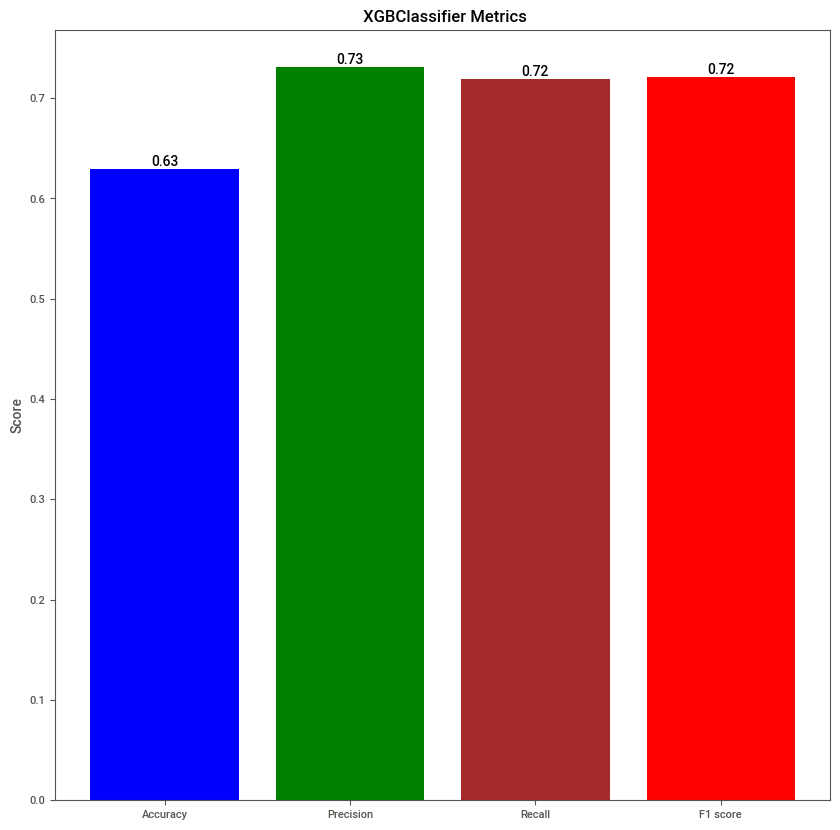

In [62]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = ' XGBClassifier'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [xgb_mean_accuracy, xgb_mean_precision, xgb_mean_recall, xgb_mean_f1]

plot_metrics(model_name, metrics, values)


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.66      0.81      0.73       104
           1       0.73      0.56      0.63        97

    accuracy                           0.69       201
   macro avg       0.70      0.68      0.68       201
weighted avg       0.69      0.69      0.68       201

Accuracy   : 0.6865671641791045
Precision  : 0.7297297297297297
Recall     : 0.5567010309278351
F1-score   : 0.631578947368421

K-fold Cross-validation Results (Logistic Regression with SMOTE):
 Accuracy   : 0.6048333333333333
 Precision  : 0.7878257159507159
 Recall     : 0.571875
 F1-score   : 0.6579504428336463

Confusion Matrix:
[[84 20]
 [43 54]]

Additional Metrics for Logistic Regression:
Sensitivity (True Positive Rate): 0.5567
Specificity (True Negative Rate): 0.8077
Negative Predicted Value: 0.6614
False Positive Rate: 0.1923
False Discovery Rate: 0.2703
False Omission Rate: 0.3386


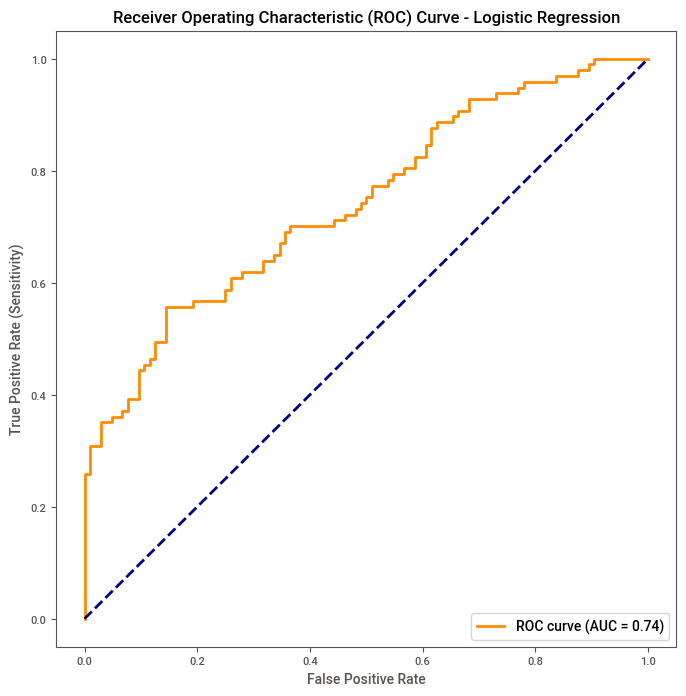

In [63]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X, y)
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

lr_classifier = LogisticRegression(random_state=42)

lr_classifier.fit(X_train_resampled_scaled, y_train_smote)
y_pred_lr = lr_classifier.predict(X_test_scaled)

cla_rep_lr = classification_report(y_test, y_pred_lr)
acc_sco_lr = accuracy_score(y_test, y_pred_lr)
f1_sco_lr = f1_score(y_test, y_pred_lr)
pre_sco_lr = precision_score(y_test, y_pred_lr)
rec_sco_lr = recall_score(y_test, y_pred_lr)

print("Classification Report (Logistic Regression):")
print(cla_rep_lr)
print("Accuracy   :", acc_sco_lr)
print("Precision  :", pre_sco_lr)
print("Recall     :", rec_sco_lr)
print("F1-score   :", f1_sco_lr)


num_folds = 20
stratkf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in stratkf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    smote_fold = SMOTE(random_state=42)
    X_train_smote_fold, y_train_smote_fold = smote_fold.fit_resample(X_train_fold, y_train_fold)

    # Standardize the features
    X_train_resampled_scaled_fold = scaler.fit_transform(X_train_smote_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # Train the Logistic Regression model
    lr_classifier_fold = LogisticRegression(random_state=42)
    lr_classifier_fold.fit(X_train_resampled_scaled_fold, y_train_smote_fold)

    # Make predictions on the test fold
    y_pred_fold = lr_classifier_fold.predict(X_test_scaled_fold)
    
    y_prob_lr_safe = lr_classifier.predict_proba(X_test_scaled)[:, 1]


    # Evaluate the model on the test fold
    accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
    precision_fold = precision_score(y_test_fold, y_pred_fold)
    recall_fold = recall_score(y_test_fold, y_pred_fold)
    f1_fold = f1_score(y_test_fold, y_pred_fold)

    # Append the scores to the lists
    accuracy_scores.append(accuracy_fold)
    precision_scores.append(precision_fold)
    recall_scores.append(recall_fold)
    f1_scores.append(f1_fold)

# Calculate the average scores across all folds
log_mean_accuracy = np.mean(accuracy_scores)
log_mean_precision = np.mean(precision_scores)
log_mean_recall = np.mean(recall_scores)
log_mean_f1 = np.mean(f1_scores)
print("\nK-fold Cross-validation Results (Logistic Regression with SMOTE):")
print(f" Accuracy   : {log_mean_accuracy}")
print(f" Precision  : {log_mean_precision}")
print(f" Recall     : {log_mean_recall}")
print(f" F1-score   : {log_mean_f1}")

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
TN_lr, FP_lr, FN_lr, TP_lr = conf_matrix_lr.ravel()

# Additional Metrics
sensitivity_lr = TP_lr / (TP_lr + FN_lr)
specificity_lr = TN_lr / (TN_lr + FP_lr)
npv_lr = TN_lr / (TN_lr + FN_lr)
fpr_lr = FP_lr / (FP_lr + TN_lr)
fdr_lr = FP_lr / (FP_lr + TP_lr)
for_lr = FN_lr / (FN_lr + TN_lr)

print("\nConfusion Matrix:")
print(conf_matrix_lr)

print("\nAdditional Metrics for Logistic Regression:")
print(f"Sensitivity (True Positive Rate): {sensitivity_lr:.4f}")
print(f"Specificity (True Negative Rate): {specificity_lr:.4f}")
print(f"Negative Predicted Value: {npv_lr:.4f}")
print(f"False Positive Rate: {fpr_lr:.4f}")
print(f"False Discovery Rate: {fdr_lr:.4f}")
print(f"False Omission Rate: {for_lr:.4f}")

# ROC Curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr_safe)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()



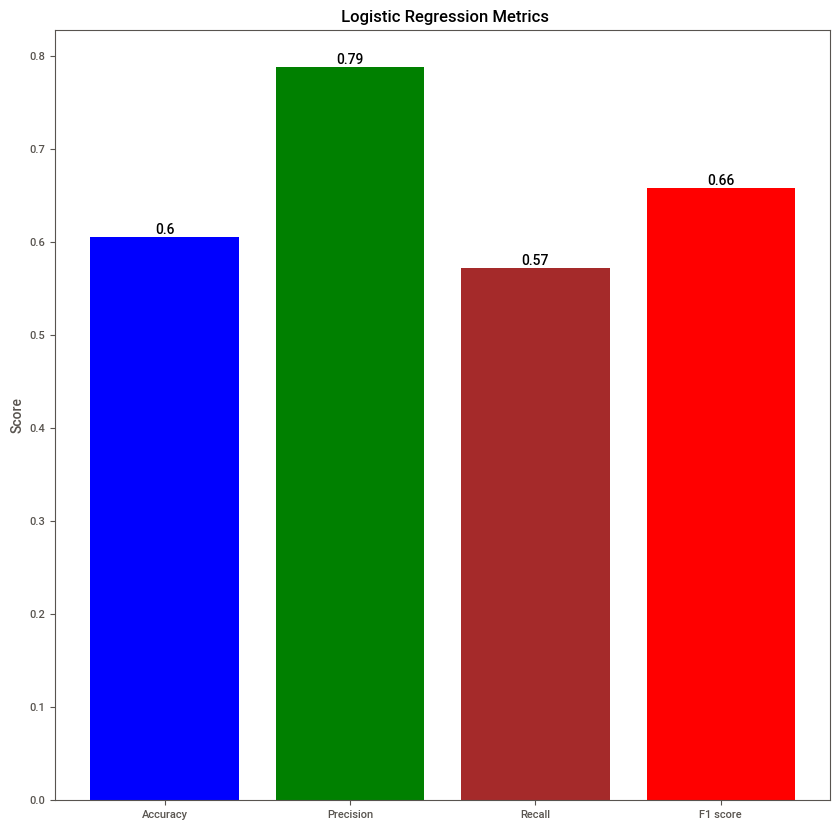

In [64]:
import matplotlib.pyplot as plt

def plot_metrics(model_name, metrics, values):
    fig, ax = plt.subplots(figsize=(10, 10))
    bars = ax.bar(metrics, values, color=['blue', 'green', 'brown', 'red'])
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    plt.title(f'{model_name} Metrics')
    plt.ylabel('Score')
    plt.show()
model_name = ' Logistic Regression'
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score']
values = [log_mean_accuracy, log_mean_precision,  log_mean_recall, log_mean_f1]

plot_metrics(model_name, metrics, values)


In [65]:
data = {
    'Model':['Logistic Regression','Gaussian Naïve Bayes','Decision Forest','RandomForest Tree','Ada Boosting ','Gradient Boosting','Light GB','KNN','XGBClassifier','Stacking '],
    'Accuracy':  [ log_mean_accuracy, nb_mean_accuracy,  dt_mean_accuracy, rf_mean_accuracy, ada_mean_accuracy, gb_mean_accuracy, lgb_mean_accuracy, knn_mean_accuracy,  xgb_mean_accuracy,  st_mean_accuracy],
    'Precision': [ log_mean_precision,nb_mean_precision, dt_mean_precision,rf_mean_precision,ada_mean_precision,gb_mean_precision,lgb_mean_precision,knn_mean_precision, xgb_mean_precision, st_mean_precision],
    'Recall':    [ log_mean_recall,   nb_mean_recall,    dt_mean_recall,   rf_mean_recall,   ada_mean_recall,   gb_mean_recall,   lgb_mean_recall,   knn_mean_recall,    xgb_mean_recall,    st_mean_recall],
    'F1_Score':  [ log_mean_f1,       nb_mean_f1,        dt_mean_f1,       rf_mean_f1,       ada_mean_f1,       gb_mean_f1,       lgb_mean_f1,       knn_mean_f1,        xgb_mean_f1,        st_mean_f1]
}
dtfm= pd.DataFrame(data)
print(dtfm)

                  Model  Accuracy  Precision    Recall  F1_Score
0   Logistic Regression  0.604833   0.787826  0.571875  0.657950
1  Gaussian Naïve Bayes  0.571167   0.895460  0.423529  0.554661
2       Decision Forest  0.608828   0.726765  0.670782  0.696333
3     RandomForest Tree  0.641111   0.748714  0.711429  0.721323
4         Ada Boosting   0.639167   0.787519  0.650000  0.705594
5     Gradient Boosting  0.633167   0.763528  0.674816  0.708380
6              Light GB  0.645583   0.755145  0.710478  0.725765
7                   KNN  0.580917   0.740027  0.571875  0.637843
8         XGBClassifier  0.629250   0.731104  0.719118  0.720966
9             Stacking   0.639156   0.753800  0.694335  0.719629


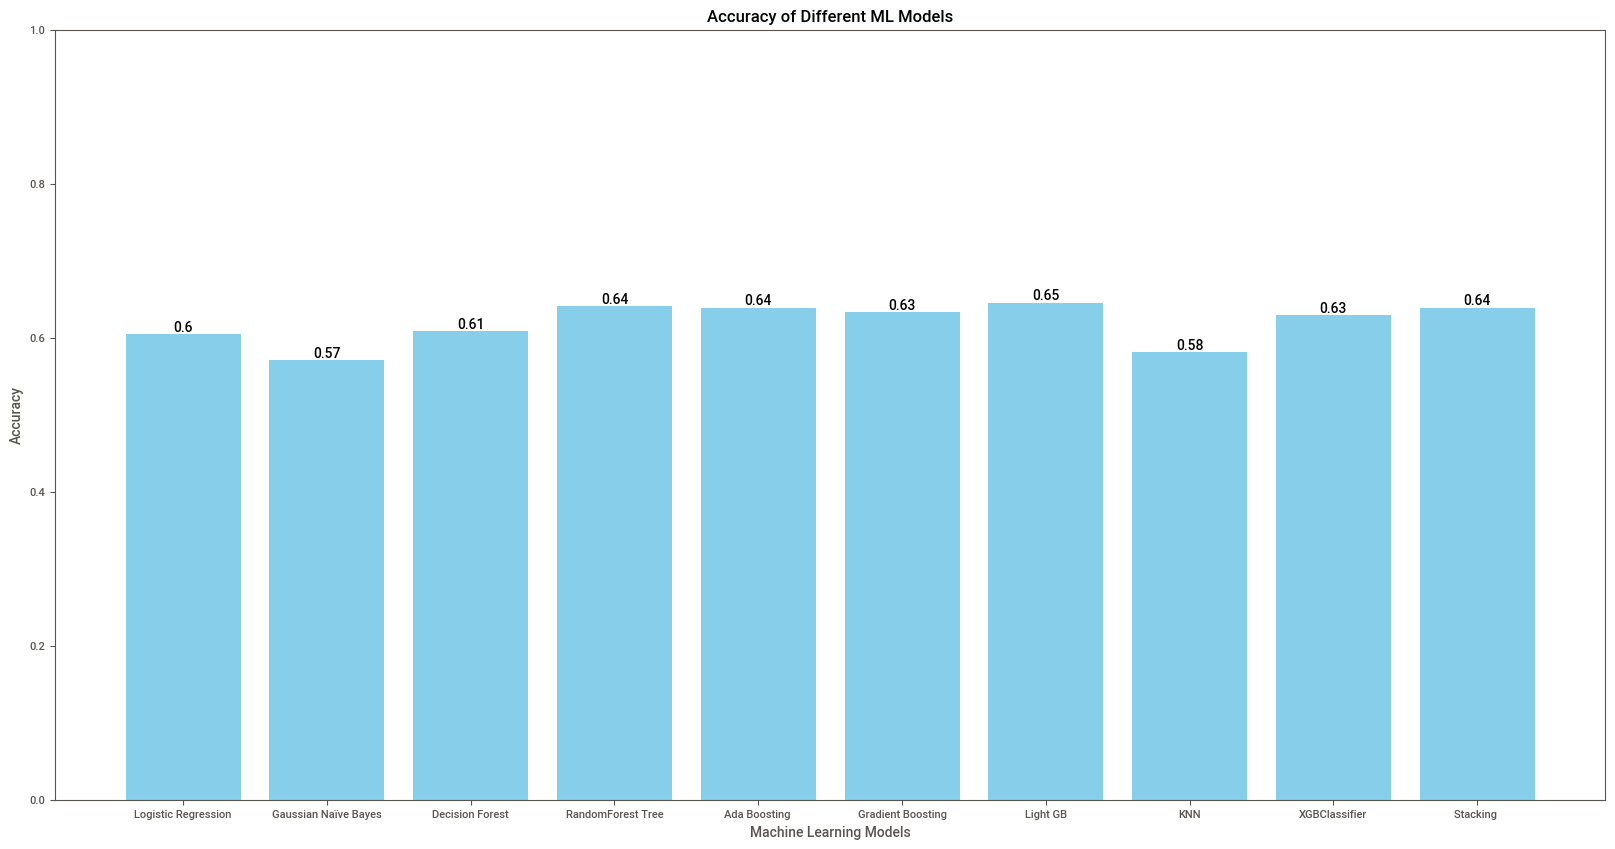

In [66]:
import matplotlib.pyplot as plt
import numpy as np

model_names = ['Logistic Regression','Gaussian Naïve Bayes','Decision Forest','RandomForest Tree','Ada Boosting ','Gradient Boosting','Light GB','KNN','XGBClassifier','Stacking ']
accuracies = [log_mean_accuracy,nb_mean_accuracy, dt_mean_accuracy, rf_mean_accuracy, ada_mean_accuracy, gb_mean_accuracy, lgb_mean_accuracy, knn_mean_accuracy, xgb_mean_accuracy,st_mean_accuracy]

fig, ax = plt.subplots(figsize=(20, 10))
bars = plt.bar(model_names, accuracies, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.ylim(0, 1) 
plt.show()


In [67]:
!pip install joblib
import joblib

rf_model =lgbm_classifier

joblib.dump(rf_model,"a_model.pkl")
model=joblib.load("a_model.pkl")

In [68]:
model.predict([[60,0,0.5,500,20,34,5.9,1.6,0.37]])[0]

0

In [69]:
model.predict([[65,1,0.7,187,16,18,6.8,3.3,0.90]])[0]

1

In [70]:
model.predict([[38,0,1.0,216,21,24,7.3,4.4,1.50]])[0]

0

In [71]:
model.predict([[25,0,0.6,183,91,53,5.5,2.3,0.70]])[0]

0

In [72]:
model.predict([[29,1,0.9,202,14,11,6.7,3.6,1.10]])[0]

1

In [73]:
model.predict([[51,0,2.9,482,22,34,7.0,2.4,0.50]])[0]

1

In [74]:
model.predict([[62,0,0.6,160,42,110,4.9,2.6,1.10]])[0]

0

In [75]:
model.predict([[40,0,1.9,231,16,55,4.3,1.6,0.60]])[0]

1

In [76]:
model.predict([[33,0,1.6,165,15,23,7.3,3.5,0.92]])[0]

0

In [77]:
model.predict([[60,0,0.8,215,24,17,6.3,3.0,0.90]])[0]

0

In [78]:
model.predict([[17,0,0.9,202,22,19,7.4,4.1,1.20]])[0]

0

In [79]:
model.predict([[25,0,0.6,183,91,53,5.5,2.3,0.70]])[0]

0

In [80]:
model.predict([[62,0,10.9,699,64,100,7.5,3.2,0.74]])[0]

1